## <font color = Red > Telecome Churn Case Analysis </font>

### <font color = Green>  </font>

## Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


## <font color = Green> Business Goal </font>

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify :
- customers at high risk of churn and 
- identify the main indicators of churn.

## <font color = Green> Steps Taken </font>

- Step 1: Importing and Reading Dataset
- Step 2: Routine structure check / Inspecting the Dataframe 
- Step 3: Remove the date variables and Id variables as they are not needed for analysis 
- Step 3.1: Remove the date variables 
- Step 3.2: Remove the mobile_number as it is id variable 
- Step 4: Missing Values treatment 
- Step 5: Data Preparation 
    - Step 5.1: Derive new features
    - Step 5.2: Filter high-value customers 
    - Step 5.3: Outlier treatment 
    - Step 5.4: Tag churners and remove attributes of the churn phase 
    - Step 5.5:  Removing all the attributes corresponding to the churn phase 
- Step 6: Exploratory Data Analysis 
- Step 7: Perform Train and Test split 
- Step 8: Feature Scaling & Class Imbalance 
    - Step 8.1: Feature Scaling 
    - Step 8.2: Class imbalance 
- Step 9: Perform PCA on the data 
    - Step 9.1: Making a scree plot for the explained variance  
    - Step 9.2: Scree plot for PCAs created  
    - Step 9.3: Perform PCA with selected components based on Scree plot 
    - Step 9.3: Plotting the heatmap of the corr matrix of PCAs selected 
    - Step 9.4: Applying the transformation on the test set 
- Step 10: Applying logistic regression on the data on our Principal components 
    - Step 10.1: Making predictions on the test set 
    - Step 10.2: Making PCA unsupervised  
    - Step 10.3: Choosing a cut off value that provides Good accuracy and sensitivity  
    - Step 10.5: Conclusion for Log reg model using the PCA 
- Step 11: Build multiple models without PCA  
    - Step 11.1: Build logistic Regression with Cross Validation  
    - Step 11.2: Build Decision Trees  
    - Step 11.3: Build Random forest 
    - Step 11.4: Build logistic regression 
- Step 12: Conclusion 
    - Step 12.a: Recommendation of strategies to manage customer churn 


## <font color = Green> Import Libraries </font>

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# do an inline so that plt.show() is not required everytime
%matplotlib inline
# import for pre-processing
# scale (this is same as standard scalar)
from sklearn.preprocessing import scale

# import for model selection:
# splitting data into training, test data and validation data
from sklearn.model_selection import train_test_split
# Import for scaling dataframe
from sklearn.preprocessing import StandardScaler
# import for creating K-folds
from sklearn.model_selection import KFold
# import for CV using folds created
from sklearn.model_selection import cross_val_score
# import for grid search cv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# import for report of model performance (useful for classification models)
from sklearn import metrics
# import for Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
# import  Feature Selection (RFE method)
from sklearn.feature_selection import RFE
# Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import precision recall 
from sklearn.metrics import precision_recall_curve
# import for Stratified K fold
from sklearn.model_selection  import StratifiedKFold
# import for Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
#import for SVM
from sklearn import svm
# import for Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# for Class imbalance
from imblearn.over_sampling import SMOTE

In [3]:
# Making miscellaneous setting 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

## <font color = Red> Step 1: Importing  and Reading Dataset </font>

In [4]:
# Importing the 'telecom_churn_data.csv' dataset
inp_data = pd.read_csv('telecom_churn_data.csv')
inp_data.head()

mobile_number  circle_id       loc_og_t2o_mou       std_og_t2o_mou  \
0  7000842753     109                       0.00                 0.00   
1  7001865778     109                       0.00                 0.00   
2  7001625959     109                       0.00                 0.00   
3  7001204172     109                       0.00                 0.00   
4  7000142493     109                       0.00                 0.00   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.00  6/30/2014            7/31/2014             
1                 0.00  6/30/2014            7/31/2014             
2                 0.00  6/30/2014            7/31/2014             
3                 0.00  6/30/2014            7/31/2014             
4                 0.00  6/30/2014            7/31/2014             

  last_date_of_month_8 last_date_of_month_9               arpu_6  \
0  8/31/2014            9/30/2014                         197.38   
1  8/31/2014            9/30/2014                          34.05   
2  8/31/2014            9/30/2014                         167.69   
3  8/31/2014            9/30/2014                         221.34   
4  8/31/2014            9/30/2014                         261.64   

                arpu_7               arpu_8               arpu_9  \
0               214.82               213.80                21.10   
1               355.07               268.32                86.28   
2               189.06               210.23               290.71   
3               251.10               508.05               389.50   
4               309.88               238.17               163.43   

           onnet_mou_6          onnet_mou_7          onnet_mou_8  \
0                  nan                  nan                 0.00   
1                24.11                78.68                 7.68   
2                11.54                55.24                37.26   
3                99.91                54.39               310.98   
4                50.31               149.44                83.89   

           onnet_mou_9         offnet_mou_6         offnet_mou_7  \
0                  nan                  nan                  nan   
1                18.34                15.74                99.84   
2                74.81               143.33               220.59   
3               241.71               123.31               109.01   
4                58.78                76.96                91.88   

          offnet_mou_8         offnet_mou_9        roam_ic_mou_6  \
0                 0.00                  nan                  nan   
1               304.76                53.76                 0.00   
2               208.36               118.91                 0.00   
3                71.68               113.54                 0.00   
4               124.26                45.81                 0.00   

         roam_ic_mou_7        roam_ic_mou_8        roam_ic_mou_9  \
0                  nan                 0.00                  nan   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                38.49   
3                54.86                44.38                 0.00   
4                 0.00                 0.00                 0.00   

         roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
0                  nan                  nan                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                28.09                39.04   
4                 0.00                 0.00                 0.00   

         roam_og_mou_9     loc_og_t2t_mou_6     loc_og_t2t_mou_7  \
0                  nan                  nan                  nan   
1                 0.00                23.88                74.56   
2                70.94                 7.19                28.74   
3                 0.

## <font color = Red> Step 2: Routine structure check / Inspecting the Dataframe </font>

In [5]:
# Checking the number of rows and columns in the dataframe
inp_data.shape

(99999, 226)

In [6]:
# Check the column-wise info of the dataframe
inp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## <font color = Red> Step 3: Remove the date variables and Id variables as they are not needed for analysis </font>

### <font color = Red> Step 3.1: Remove the date variables </font>

In [7]:
# Store date varieables in a list
date_cols =  inp_data.columns[inp_data.columns.str.contains('date')]
print(date_cols)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [8]:
inp_date_data = inp_data.loc[:,date_cols]
inp_date_data.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0  9/30/2014            6/21/2014           7/16/2014            
1  9/30/2014            6/29/2014           7/31/2014            
2  9/30/2014            6/17/2014           7/24/2014            
3  9/30/2014            6/28/2014           7/31/2014            
4  9/30/2014            6/26/2014           7/28/2014            

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0  8/8/2014            9/28/2014           6/21/2014                 
1  8/28/2014           9/30/2014           NaN                       
2  8/14/2014           9/29/2014           NaN                       
3  8/31/2014           9/30/2014           NaN                       
4  8/9/2014            9/28/2014           6/4/2014                  

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0  7/16/2014                8/8/2014                 NaN                      
1  7/25/2014                8/10/2014                NaN                      
2  NaN                      NaN                      9/17/2014                
3  NaN                      NaN                      NaN                      
4  NaN                      NaN                      NaN

In [9]:
inp_data.shape

(99999, 226)

In [10]:
# drop the date variables
for i in date_cols:
    inp_data = inp_data.drop([i], axis=1)

In [11]:
inp_data.shape

(99999, 214)

In [12]:
inp_data.shape

(99999, 214)

In [13]:
inp_data.head()

mobile_number  circle_id       loc_og_t2o_mou       std_og_t2o_mou  \
0  7000842753     109                       0.00                 0.00   
1  7001865778     109                       0.00                 0.00   
2  7001625959     109                       0.00                 0.00   
3  7001204172     109                       0.00                 0.00   
4  7000142493     109                       0.00                 0.00   

        loc_ic_t2o_mou               arpu_6               arpu_7  \
0                 0.00               197.38               214.82   
1                 0.00                34.05               355.07   
2                 0.00               167.69               189.06   
3                 0.00               221.34               251.10   
4                 0.00               261.64               309.88   

                arpu_8               arpu_9          onnet_mou_6  \
0               213.80                21.10                  nan   
1               268.32                86.28                24.11   
2               210.23               290.71                11.54   
3               508.05               389.50                99.91   
4               238.17               163.43                50.31   

           onnet_mou_7          onnet_mou_8          onnet_mou_9  \
0                  nan                 0.00                  nan   
1                78.68                 7.68                18.34   
2                55.24                37.26                74.81   
3                54.39               310.98               241.71   
4               149.44                83.89                58.78   

          offnet_mou_6         offnet_mou_7         offnet_mou_8  \
0                  nan                  nan                 0.00   
1                15.74                99.84               304.76   
2               143.33               220.59               208.36   
3               123.31               109.01                71.68   
4                76.96                91.88               124.26   

          offnet_mou_9        roam_ic_mou_6        roam_ic_mou_7  \
0                  nan                  nan                  nan   
1                53.76                 0.00                 0.00   
2               118.91                 0.00                 0.00   
3               113.54                 0.00                54.86   
4                45.81                 0.00                 0.00   

         roam_ic_mou_8        roam_ic_mou_9        roam_og_mou_6  \
0                 0.00                  nan                  nan   
1                 0.00                 0.00                 0.00   
2                 0.00                38.49                 0.00   
3                44.38                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

         roam_og_mou_7        roam_og_mou_8        roam_og_mou_9  \
0                  nan                 0.00                  nan   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                70.94   
3                28.09                39.04                 0.00   
4                 0.00                 0.00                 0.00   

      loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
0                  nan                  nan                 0.00   
1                23.88                74.56                 7.68   
2                 7.19                28.74                13.58   
3                73.68                34.81                10.61   
4                50.31               149.44                83.89   

      loc_og_t2t_mou_9     loc_og_t2m_mou_6     loc_og_t2m_mou_7  \
0                  nan                  nan                  nan   
1                18.34                11.51                75.94   
2                14.39                29.34                16.86   
3                15.

In [14]:
def prelimStats(data):
    datatypes = data.dtypes
    unique_count = data.nunique(dropna=False)
    misscnt=round(100*(data.isnull().sum()/len(data.index)), 2)
    result = pd.concat([datatypes, misscnt, unique_count], axis=1, join="inner")
    result.rename(columns={0:'datatype', 1:'percentMissing', 2:'Unique'}, inplace=True)
    result.index.rename('Variable', inplace=True)
    result.sort_values('percentMissing', ascending =False, inplace=True)
    return result

In [15]:
prelimStats(inp_data)

datatype       percentMissing  Unique
Variable                                                
arpu_3g_6           float64                74.85  7419  
fb_user_6           float64                74.85  3     
arpu_2g_6           float64                74.85  6991  
night_pck_user_6    float64                74.85  3     
total_rech_data_6   float64                74.85  38    
max_rech_data_6     float64                74.85  49    
count_rech_2g_6     float64                74.85  32    
av_rech_amt_data_6  float64                74.85  888   
count_rech_3g_6     float64                74.85  26    
count_rech_3g_7     float64                74.43  29    
fb_user_7           float64                74.43  3     
night_pck_user_7    float64                74.43  3     
max_rech_data_7     float64                74.43  49    
count_rech_2g_7     float64                74.43  37    
total_rech_data_7   float64                74.43  43    
av_rech_amt_data_7  float64                74.43  962   
arpu_3g_7           float64                74.43  7247  
arpu_2g_7           float64                74.43  6587  
arpu_2g_9           float64                74.08  6796  
arpu_3g_9           float64                74.08  8064  
count_rech_3g_9     float64                74.08  28    
max_rech_data_9     float64                74.08  51    
av_rech_amt_data_9  float64                74.08  946   
total_rech_data_9   float64                74.08  38    
fb_user_9           float64                74.08  3     
count_rech_2g_9     float64                74.08  33    
night_pck_user_9    float64                74.08  3     
arpu_3g_8           float64                73.66  7788  
fb_user_8           float64                73.66  3     
night_pck_user_8    float64                73.66  3     
count_rech_3g_8     float64                73.66  30    
arpu_2g_8           float64                73.66  6653  
total_rech_data_8   float64                73.66  47    
av_rech_amt_data_8  float64                73.66  974   
max_rech_data_8     float64                73.66  51    
count_rech_2g_8     float64                73.66  35    
loc_ic_t2f_mou_9    float64                 7.75  7092  
isd_og_mou_9        float64                 7.75  1256  
std_og_mou_9        float64                 7.75  26554 
spl_og_mou_9        float64                 7.75  4096  
og_others_9         float64                 7.75  236   
loc_ic_t2t_mou_9    float64                 7.75  12994 
isd_ic_mou_9        float64                 7.75  5558  
loc_ic_mou_9        float64                 7.75  27698 
std_ic_t2t_mou_9    float64                 7.75  6158  
std_ic_t2m_mou_9    float64                 7.75  8934  
std_ic_t2f_mou_9    float64                 7.75  3091  
std_ic_t2o_mou_9    float64                 7.75  2     
std_ic_mou_9        float64                 7.75  11267 
spl_ic_mou_9        float64                 7.75  385   
ic_others_9         float64                 7.75  1924  
std_og_t2f_mou_9    float64                 7.75  2296  
std_og_t2c_mou_9    float64                 7.75  2     
loc_ic_t2m_mou_9    float64                 7.75  21485 
loc_og_t2c_mou_9    float64                 7.75  2333  
onnet_mou_9         float64                 7.75  23566 
std_og_t2t_mou_9    float64                 7.75  17935 
offnet_mou_9        float64                 7.75  30078 
std_og_t2m_mou_9    float64                 7.75  19053 
loc_og_mou_9        float64                 7.75  25377 
roam_ic_mou_9       float64                 7.75  4828  
loc_og_t2f_mou_9    float64                 7.75  3759  
roam_og_mou_9       float64                 7.75  5883  
loc_og_t2m_mou_9    float64                 7.75  20142 
loc_og_t2t_mou_9    float64                 7.75  12950 
loc_og_t2c_mou_8    float64                 5.38  2517  
std_ic_t2o_mou_8    float64                 5.38  2     
std_ic_mou_8        float64                 5.38  11663 
std_ic_t2m_mou_8    float64  

### <font color = Red> Step 3.2: Remove the mobile_number as it is id variable </font>

In [16]:
inp_data = inp_data.drop('mobile_number', axis=1)

## <font color = Red> Step 4: Missing Values treatment </font>

In [17]:
# total_og_mou_i =  loc_og_mou_i + std_og_mou_i + isd_og_mou_i + spl_og_mou_i + og_others_i

# If the total_og_mou_i is zero then 
# 'loc_og_mou_i' , 'std_og_mou_i' , 'sd_og_mou_i' , 'spl_og_mou_i' , 'og_others_i' are zero

# If the loc_og_mou_i is zero then 
# 'loc_og_t2t_mou_i' ,'loc_og_t2m_mou_i' ,'loc_og_t2f_mou_i'  are zero

# If the std_og_mou_i is zero then 
# 'std_og_t2t_mou_i', 'std_og_t2m_mou_i', 'std_og_t2f_mou_i' , 'std_og_t2c_mou_i' are zero

# Hence, total_og_mou_i is zero then 
# 'loc_og_mou_i' , 'std_og_mou_i' , 'sd_og_mou_i' , 'spl_og_mou_i' , 'og_others_i', 
# 'loc_og_t2t_mou_i' ,'loc_og_t2m_mou_i' ,'loc_og_t2f_mou_i', 
# 'std_og_t2t_mou_i', 'std_og_t2m_mou_i', 'std_og_t2f_mou_i' , 'std_og_t2c_mou_i' should be zero
# where 1 = 6 ,7, 8



inp_data.loc[inp_data['total_og_mou_6'] == 0  , 
                        [ 'loc_og_mou_6' , 'std_og_mou_6' , 'spl_og_mou_6' , 'og_others_6', 
                         'loc_og_t2t_mou_6' , 'loc_og_t2m_mou_6' ,'loc_og_t2f_mou_6', 
                         'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6' , 'std_og_t2c_mou_6'] ] = 0
inp_data.loc[inp_data['total_og_mou_7'] == 0 , 
                        [ 'loc_og_mou_7' , 'std_og_mou_7' , 'spl_og_mou_7' , 'og_others_7', 
                         'loc_og_t2t_mou_7' , 'loc_og_t2m_mou_7' ,'loc_og_t2f_mou_7', 
                         'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7' , 'std_og_t2c_mou_7'] ] = 0
inp_data.loc[inp_data['total_og_mou_8'] == 0 , 
                        [ 'loc_og_mou_8' , 'std_og_mou_8' , 'spl_og_mou_8' , 'og_others_8', 
                         'loc_og_t2t_mou_8' , 'loc_og_t2m_mou_8' ,'loc_og_t2f_mou_8', 
                         'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8' , 'std_og_t2c_mou_8'] ] = 0
inp_data.head()

circle_id       loc_og_t2o_mou       std_og_t2o_mou       loc_ic_t2o_mou  \
0  109                       0.00                 0.00                 0.00   
1  109                       0.00                 0.00                 0.00   
2  109                       0.00                 0.00                 0.00   
3  109                       0.00                 0.00                 0.00   
4  109                       0.00                 0.00                 0.00   

                arpu_6               arpu_7               arpu_8  \
0               197.38               214.82               213.80   
1                34.05               355.07               268.32   
2               167.69               189.06               210.23   
3               221.34               251.10               508.05   
4               261.64               309.88               238.17   

                arpu_9          onnet_mou_6          onnet_mou_7  \
0                21.10                  nan                  nan   
1                86.28                24.11                78.68   
2               290.71                11.54                55.24   
3               389.50                99.91                54.39   
4               163.43                50.31               149.44   

           onnet_mou_8          onnet_mou_9         offnet_mou_6  \
0                 0.00                  nan                  nan   
1                 7.68                18.34                15.74   
2                37.26                74.81               143.33   
3               310.98               241.71               123.31   
4                83.89                58.78                76.96   

          offnet_mou_7         offnet_mou_8         offnet_mou_9  \
0                  nan                 0.00                  nan   
1                99.84               304.76                53.76   
2               220.59               208.36               118.91   
3               109.01                71.68               113.54   
4                91.88               124.26                45.81   

         roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
0                  nan                  nan                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                54.86                44.38   
4                 0.00                 0.00                 0.00   

         roam_ic_mou_9        roam_og_mou_6        roam_og_mou_7  \
0                  nan                  nan                  nan   
1                 0.00                 0.00                 0.00   
2                38.49                 0.00                 0.00   
3                 0.00                 0.00                28.09   
4                 0.00                 0.00                 0.00   

         roam_og_mou_8        roam_og_mou_9     loc_og_t2t_mou_6  \
0                 0.00                  nan                 0.00   
1                 0.00                 0.00                23.88   
2                 0.00                70.94                 7.19   
3                39.04                 0.00                73.68   
4                 0.00                 0.00                50.31   

      loc_og_t2t_mou_7     loc_og_t2t_mou_8     loc_og_t2t_mou_9  \
0                 0.00                 0.00                  nan   
1                74.56                 7.68                18.34   
2                28.74                13.58                14.39   
3                34.81                10.61                15.49   
4               149.44                83.89                58.78   

      loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
0                 0.00                 0.00                 0.00   
1                11.51                75.94               291.86   
2                29.34                16.86         

In [18]:
# the same logic applied to incomimg calls as well ,...
# if total_ic_mou_i is zero then 
# 'loc_ic_mou_i' , 'std_ic_mou_i' , 'sd_ic_mou_i' , 'spl_ic_mou_i' , 'ic_others_i', 
# 'loc_ic_t2t_mou_i' ,'loc_ic_t2m_mou_i' ,'loc_ic_t2f_mou_i', 
# 'std_ic_t2t_mou_i', 'std_ic_t2m_mou_i', 'std_ic_t2f_mou_i'  should be zero
# where 1 = 6 ,7, 8


inp_data.loc[inp_data['total_ic_mou_6'] == 0  , 
                        [ 'loc_ic_mou_6' , 'std_ic_mou_6' , 'spl_ic_mou_6' , 'ic_others_6', 
                         'loc_ic_t2t_mou_6' , 'loc_ic_t2m_mou_6' ,'loc_ic_t2f_mou_6', 
                         'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6' ] ] = 0
inp_data.loc[inp_data['total_ic_mou_7'] == 0 , 
                        [ 'loc_ic_mou_7' , 'std_ic_mou_7' , 'spl_ic_mou_7' , 'ic_others_7', 
                         'loc_ic_t2t_mou_7' , 'loc_ic_t2m_mou_7' ,'loc_ic_t2f_mou_7', 
                         'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7' ] ] = 0
inp_data.loc[inp_data['total_ic_mou_8'] == 0 , 
                        [ 'loc_ic_mou_8' , 'std_ic_mou_8' , 'spl_ic_mou_8' , 'ic_others_8', 
                         'loc_ic_t2t_mou_8' , 'loc_ic_t2m_mou_8' ,'loc_ic_t2f_mou_8', 
                         'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8' ] ] = 0
inp_data.head()

circle_id       loc_og_t2o_mou       std_og_t2o_mou       loc_ic_t2o_mou  \
0  109                       0.00                 0.00                 0.00   
1  109                       0.00                 0.00                 0.00   
2  109                       0.00                 0.00                 0.00   
3  109                       0.00                 0.00                 0.00   
4  109                       0.00                 0.00                 0.00   

                arpu_6               arpu_7               arpu_8  \
0               197.38               214.82               213.80   
1                34.05               355.07               268.32   
2               167.69               189.06               210.23   
3               221.34               251.10               508.05   
4               261.64               309.88               238.17   

                arpu_9          onnet_mou_6          onnet_mou_7  \
0                21.10                  nan                  nan   
1                86.28                24.11                78.68   
2               290.71                11.54                55.24   
3               389.50                99.91                54.39   
4               163.43                50.31               149.44   

           onnet_mou_8          onnet_mou_9         offnet_mou_6  \
0                 0.00                  nan                  nan   
1                 7.68                18.34                15.74   
2                37.26                74.81               143.33   
3               310.98               241.71               123.31   
4                83.89                58.78                76.96   

          offnet_mou_7         offnet_mou_8         offnet_mou_9  \
0                  nan                 0.00                  nan   
1                99.84               304.76                53.76   
2               220.59               208.36               118.91   
3               109.01                71.68               113.54   
4                91.88               124.26                45.81   

         roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
0                  nan                  nan                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                54.86                44.38   
4                 0.00                 0.00                 0.00   

         roam_ic_mou_9        roam_og_mou_6        roam_og_mou_7  \
0                  nan                  nan                  nan   
1                 0.00                 0.00                 0.00   
2                38.49                 0.00                 0.00   
3                 0.00                 0.00                28.09   
4                 0.00                 0.00                 0.00   

         roam_og_mou_8        roam_og_mou_9     loc_og_t2t_mou_6  \
0                 0.00                  nan                 0.00   
1                 0.00                 0.00                23.88   
2                 0.00                70.94                 7.19   
3                39.04                 0.00                73.68   
4                 0.00                 0.00                50.31   

      loc_og_t2t_mou_7     loc_og_t2t_mou_8     loc_og_t2t_mou_9  \
0                 0.00                 0.00                  nan   
1                74.56                 7.68                18.34   
2                28.74                13.58                14.39   
3                34.81                10.61                15.49   
4               149.44                83.89                58.78   

      loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
0                 0.00                 0.00                 0.00   
1                11.51                75.94               291.86   
2                29.34                16.86         

In [19]:
prelimStats(inp_data)

datatype       percentMissing  Unique
Variable                                                
av_rech_amt_data_6  float64                74.85  888   
count_rech_3g_6     float64                74.85  26    
fb_user_6           float64                74.85  3     
arpu_2g_6           float64                74.85  6991  
max_rech_data_6     float64                74.85  49    
night_pck_user_6    float64                74.85  3     
arpu_3g_6           float64                74.85  7419  
total_rech_data_6   float64                74.85  38    
count_rech_2g_6     float64                74.85  32    
max_rech_data_7     float64                74.43  49    
count_rech_2g_7     float64                74.43  37    
count_rech_3g_7     float64                74.43  29    
night_pck_user_7    float64                74.43  3     
arpu_3g_7           float64                74.43  7247  
fb_user_7           float64                74.43  3     
av_rech_amt_data_7  float64                74.43  962   
arpu_2g_7           float64                74.43  6587  
total_rech_data_7   float64                74.43  43    
total_rech_data_9   float64                74.08  38    
arpu_3g_9           float64                74.08  8064  
max_rech_data_9     float64                74.08  51    
fb_user_9           float64                74.08  3     
night_pck_user_9    float64                74.08  3     
arpu_2g_9           float64                74.08  6796  
count_rech_3g_9     float64                74.08  28    
count_rech_2g_9     float64                74.08  33    
av_rech_amt_data_9  float64                74.08  946   
total_rech_data_8   float64                73.66  47    
night_pck_user_8    float64                73.66  3     
arpu_2g_8           float64                73.66  6653  
arpu_3g_8           float64                73.66  7788  
fb_user_8           float64                73.66  3     
count_rech_3g_8     float64                73.66  30    
max_rech_data_8     float64                73.66  51    
count_rech_2g_8     float64                73.66  35    
av_rech_amt_data_8  float64                73.66  974   
spl_og_mou_9        float64                 7.75  4096  
std_ic_t2t_mou_9    float64                 7.75  6158  
std_og_t2f_mou_9    float64                 7.75  2296  
loc_ic_mou_9        float64                 7.75  27698 
loc_ic_t2f_mou_9    float64                 7.75  7092  
std_og_t2c_mou_9    float64                 7.75  2     
std_ic_t2o_mou_9    float64                 7.75  2     
loc_ic_t2m_mou_9    float64                 7.75  21485 
loc_ic_t2t_mou_9    float64                 7.75  12994 
std_og_mou_9        float64                 7.75  26554 
std_ic_t2f_mou_9    float64                 7.75  3091  
std_ic_mou_9        float64                 7.75  11267 
og_others_9         float64                 7.75  236   
std_ic_t2m_mou_9    float64                 7.75  8934  
isd_og_mou_9        float64                 7.75  1256  
std_og_t2m_mou_9    float64                 7.75  19053 
spl_ic_mou_9        float64                 7.75  385   
isd_ic_mou_9        float64                 7.75  5558  
loc_og_t2m_mou_9    float64                 7.75  20142 
loc_og_t2f_mou_9    float64                 7.75  3759  
roam_ic_mou_9       float64                 7.75  4828  
loc_og_t2t_mou_9    float64                 7.75  12950 
loc_og_t2c_mou_9    float64                 7.75  2333  
roam_og_mou_9       float64                 7.75  5883  
onnet_mou_9         float64                 7.75  23566 
loc_og_mou_9        float64                 7.75  25377 
ic_others_9         float64                 7.75  1924  
std_og_t2t_mou_9    float64                 7.75  17935 
offnet_mou_9        float64                 7.75  30078 
onnet_mou_8         float64                 5.38  24090 
loc_og_t2c_mou_8    float64                 5.38  2517  
isd_og_mou_8        float64                 5.38  1277  
roam_og_mou_8       float64  

In [20]:
# total_rech_data_i is the sum of monthly_2g_i, monthly_3g_i, sachet_2g_i , sachet_3g_i and hence for the missing values ,
# the below treatment was done.
# where i = 6,7,8

inp_data.loc[inp_data['total_rech_data_6'].isnull() , ['total_rech_data_6' ] ] = inp_data['monthly_2g_6'] + inp_data['monthly_3g_6'] + inp_data['sachet_2g_6'] + inp_data['sachet_3g_6']
inp_data.loc[inp_data['total_rech_data_7'].isnull() , ['total_rech_data_7' ] ] = inp_data['monthly_2g_7'] + inp_data['monthly_3g_7'] + inp_data['sachet_2g_7'] + inp_data['sachet_3g_7']
inp_data.loc[inp_data['total_rech_data_8'].isnull() , ['total_rech_data_8' ] ] = inp_data['monthly_2g_8'] + inp_data['monthly_3g_8'] + inp_data['sachet_2g_8'] + inp_data['sachet_3g_8']



In [21]:
# count_rech_2g_i is the sum of monthly_2g_i, sachet_2g_i
# count_rech_3g_i is the sum of monthly_3g_i, sachet_3g_i
# hence for the missing values ,the below treatment has been carried out. where i = 6,7,8

inp_data.loc[inp_data['count_rech_2g_6'].isnull() , ['count_rech_2g_6' ] ] = inp_data['monthly_2g_6'] +  inp_data['sachet_2g_6'] 
inp_data.loc[inp_data['count_rech_3g_6'].isnull() , ['count_rech_3g_6' ] ] = inp_data['monthly_3g_6'] +  inp_data['sachet_3g_6'] 

inp_data.loc[inp_data['count_rech_2g_7'].isnull() , ['count_rech_2g_7' ] ] = inp_data['monthly_2g_7'] +  inp_data['sachet_2g_7'] 
inp_data.loc[inp_data['count_rech_3g_7'].isnull() , ['count_rech_3g_7' ] ] = inp_data['monthly_3g_7'] +  inp_data['sachet_3g_7']

inp_data.loc[inp_data['count_rech_2g_8'].isnull() , ['count_rech_2g_8' ] ] = inp_data['monthly_2g_8'] +  inp_data['sachet_2g_8'] 
inp_data.loc[inp_data['count_rech_3g_8'].isnull() , ['count_rech_3g_8' ] ] = inp_data['monthly_3g_8'] +  inp_data['sachet_3g_8']

In [22]:
# fb_user_i and night_pck_user_i have only 2 categories and skewed towards one value and hence dropped where i=6,7,8

inp_data = inp_data.drop(['fb_user_6','fb_user_7','fb_user_8'], axis=1)
inp_data = inp_data.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'], axis=1)

In [23]:
# when the total_rech_data_i is 0 then 'arpu_2g_i'and 'arpu_3g_i' is null, hence impute to zero where i=6,7,8
inp_data.loc[inp_data['total_rech_data_6'] == 0 , ['arpu_2g_6','arpu_3g_6'] ] = 0
inp_data.loc[inp_data['total_rech_data_7'] == 0 , ['arpu_2g_7','arpu_3g_7'] ] = 0
inp_data.loc[inp_data['total_rech_data_8'] == 0 , ['arpu_2g_8','arpu_3g_8'] ] = 0


In [24]:
selection = inp_data.loc[ :,['av_rech_amt_data_6']]
selection.head()


av_rech_amt_data_6
0               252.00
1                  nan
2                  nan
3                  nan
4                56.00

### Missing Values with mean

In [25]:
inp_data['av_rech_amt_data_6'].fillna(round(inp_data['av_rech_amt_data_6'].mean(),2), inplace=True)
inp_data['av_rech_amt_data_7'].fillna(round(inp_data['av_rech_amt_data_7'].mean(),2), inplace=True)
inp_data['av_rech_amt_data_8'].fillna(round(inp_data['av_rech_amt_data_8'].mean(),2), inplace=True)
selection = inp_data.loc[ :,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]
selection.head()

av_rech_amt_data_6   av_rech_amt_data_7   av_rech_amt_data_8
0               252.00               252.00               252.00
1               192.60               154.00                50.00
2               192.60               200.98               197.53
3               192.60               200.98               197.53
4                56.00               200.98               197.53

In [26]:
inp_data['max_rech_data_6'].fillna(round(inp_data['max_rech_data_6'].mean(),2), inplace=True)
inp_data['max_rech_data_7'].fillna(round(inp_data['max_rech_data_7'].mean(),2), inplace=True)
inp_data['max_rech_data_8'].fillna(round(inp_data['max_rech_data_8'].mean(),2), inplace=True)
selection = inp_data.loc[ :,['max_rech_data_6','max_rech_data_7','max_rech_data_8']]
selection.head()

max_rech_data_6      max_rech_data_7      max_rech_data_8
0               252.00               252.00               252.00
1               126.39               154.00                25.00
2               126.39               126.73               125.72
3               126.39               126.73               125.72
4                56.00               126.73               125.72

### Remove variables with just 2 categories

In [27]:
inp_data.shape

(99999, 207)

In [28]:
df=prelimStats(inp_data)
catVar=list(df[df['Unique']<=2].index)
catVar

['std_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'loc_og_t2o_mou',
 'circle_id',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_8']

In [29]:
# import Graph libraries
import seaborn as sns
import matplotlib.pyplot as plt


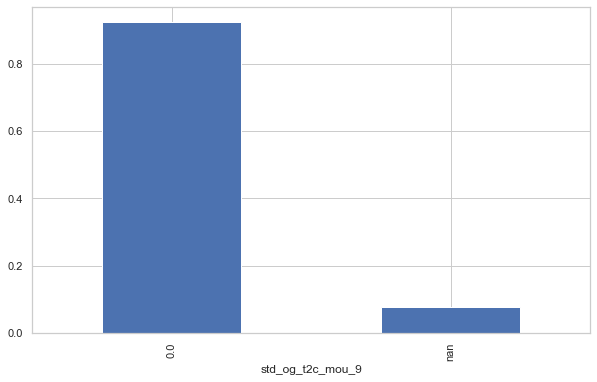

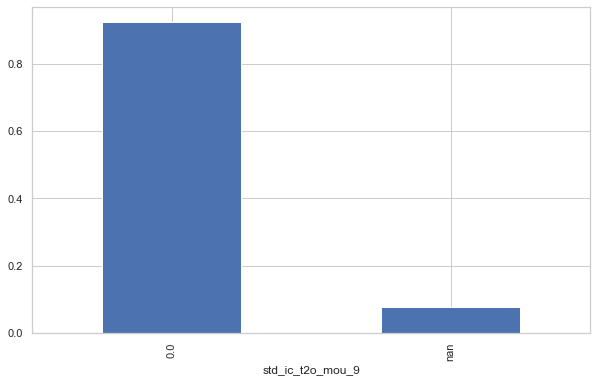

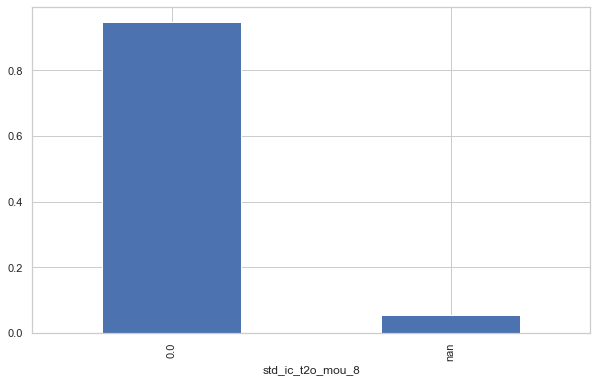

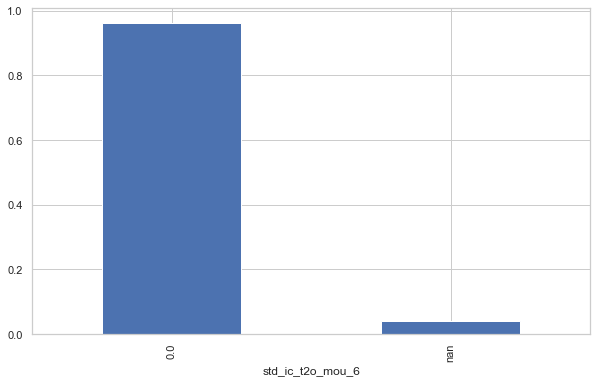

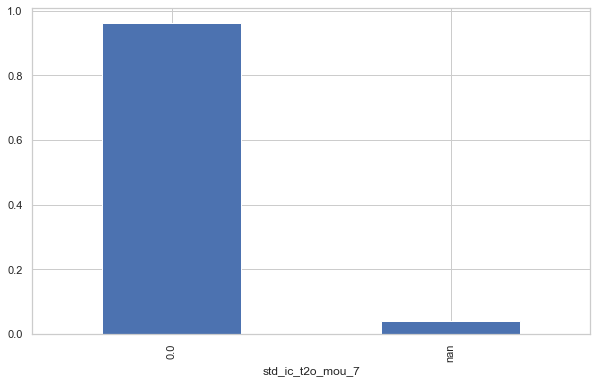

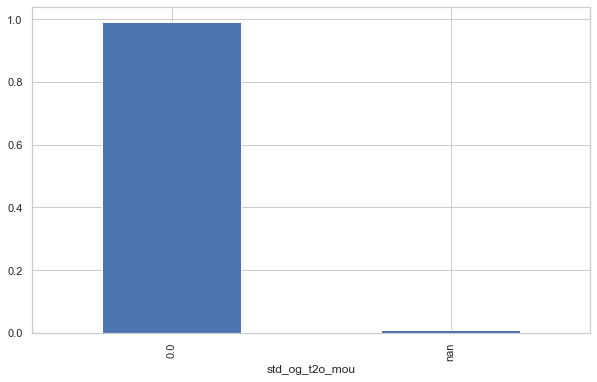

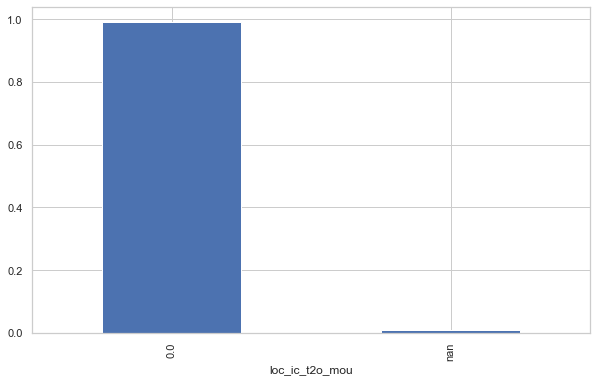

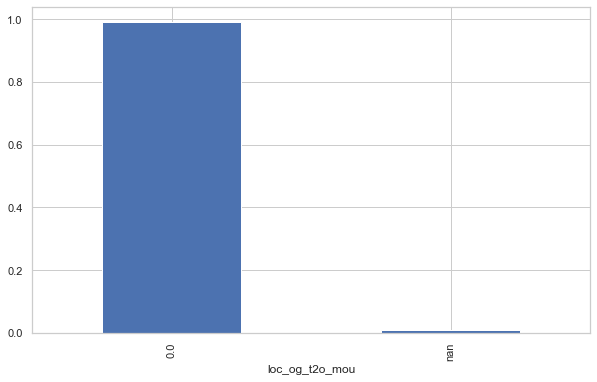

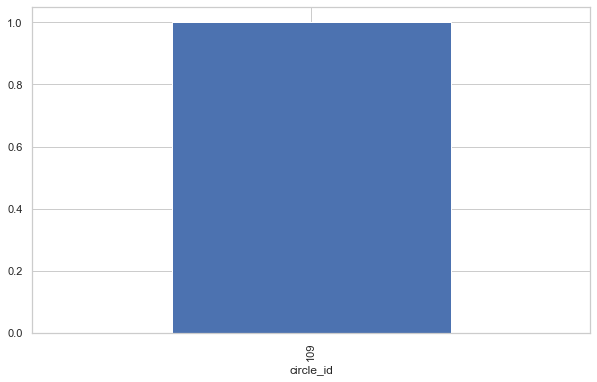

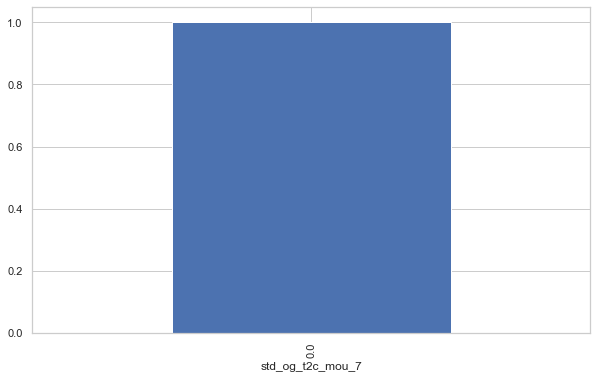

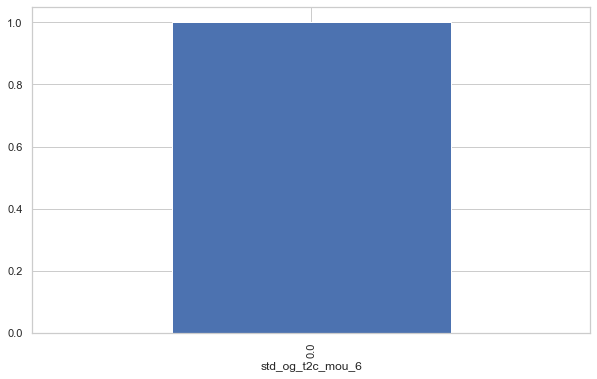

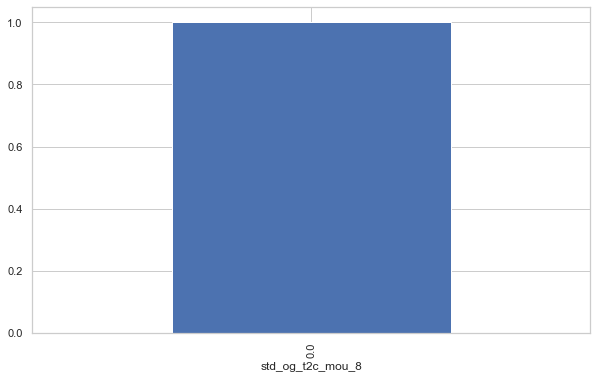

In [30]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
def letscount(df, varlist):
    for var in varlist:
        fig = plt.figure(figsize=(10,6))
        df[var].value_counts(dropna=False , normalize=True).sort_values(ascending = False ).plot.bar( xlabel = var)
        plt.show()
    return

letscount(inp_data,catVar)

In [31]:
def dropVar(data, dropvar):
    data.drop( dropvar , axis=1, inplace=True)
    return data

In [32]:
inp_data=dropVar(inp_data,catVar)
inp_data.shape

(99999, 195)

### Seperate the categorical variables

In [33]:
df=prelimStats(inp_data)
catVar=list(df[df['Unique']<=30].index)
catVar

['fb_user_9',
 'night_pck_user_9',
 'count_rech_3g_9',
 'count_rech_3g_7',
 'count_rech_3g_6',
 'count_rech_3g_8',
 'monthly_3g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'monthly_2g_8',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'monthly_2g_9',
 'monthly_2g_7',
 'monthly_2g_6']

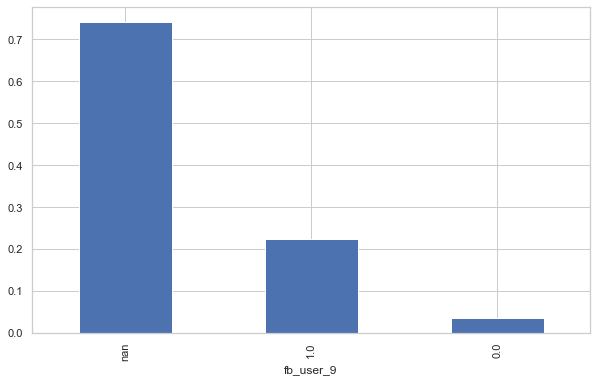

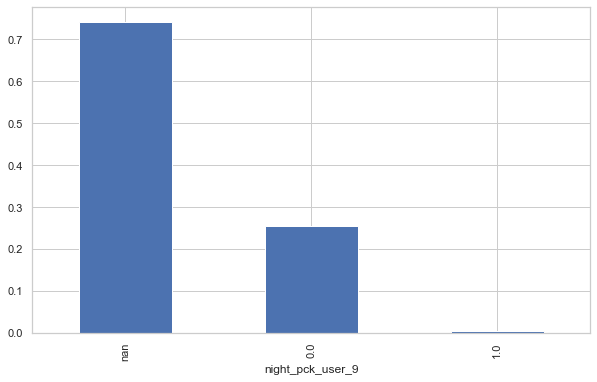

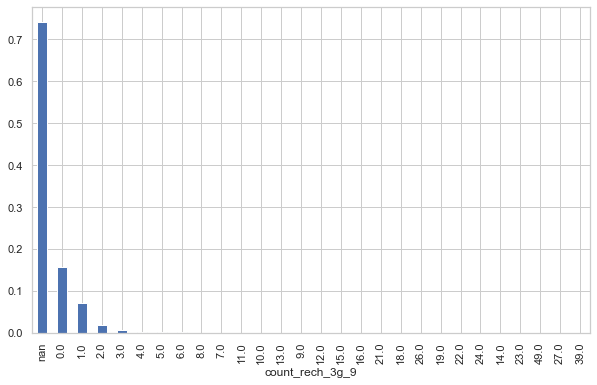

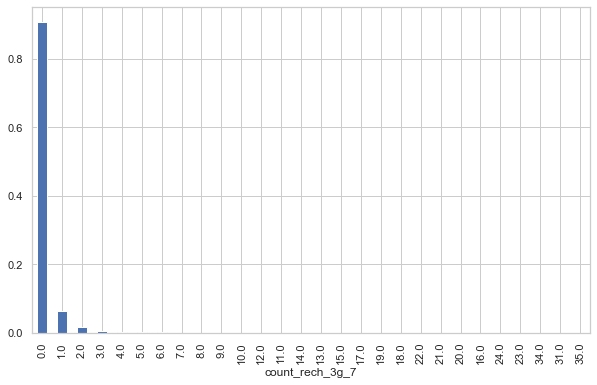

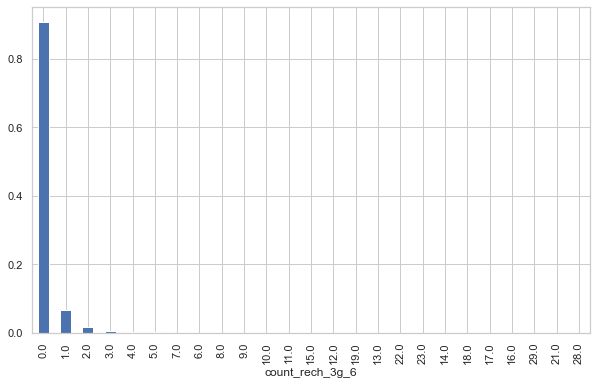

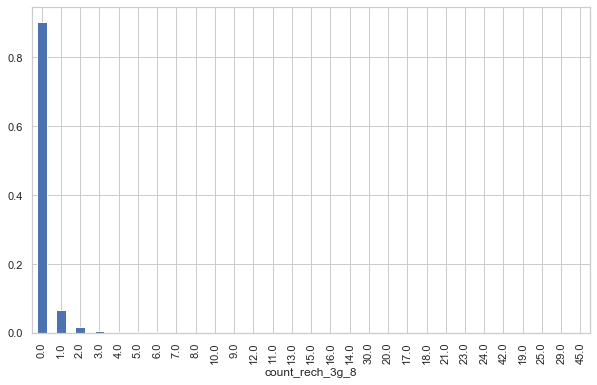

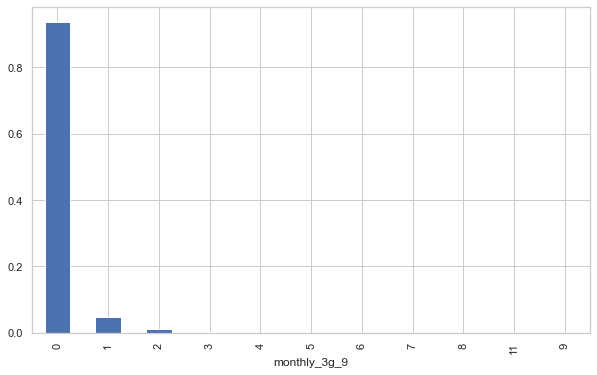

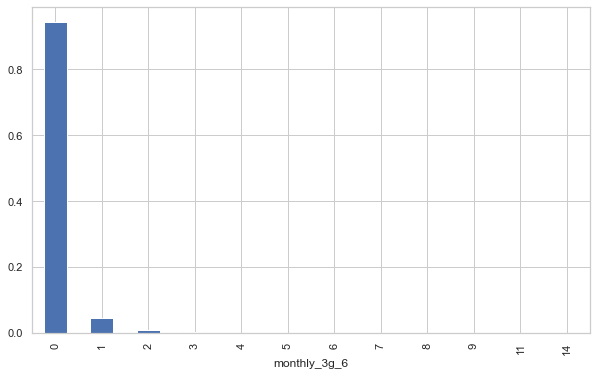

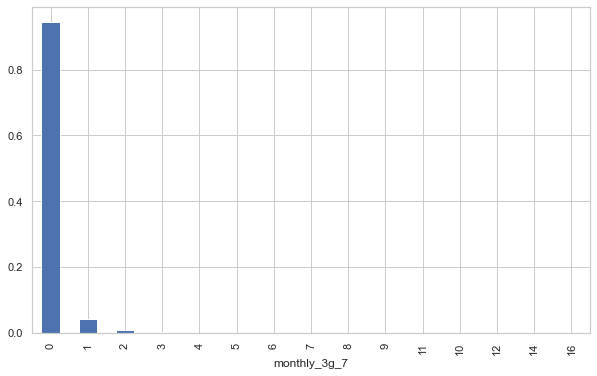

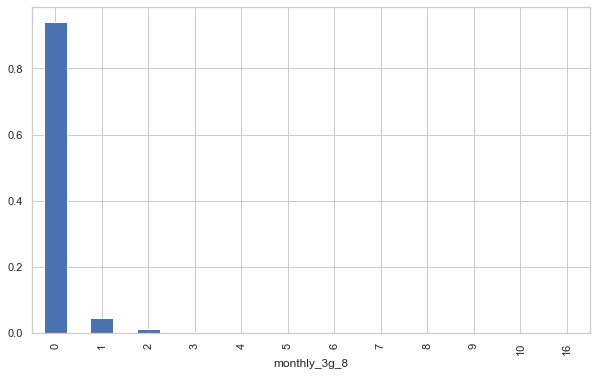

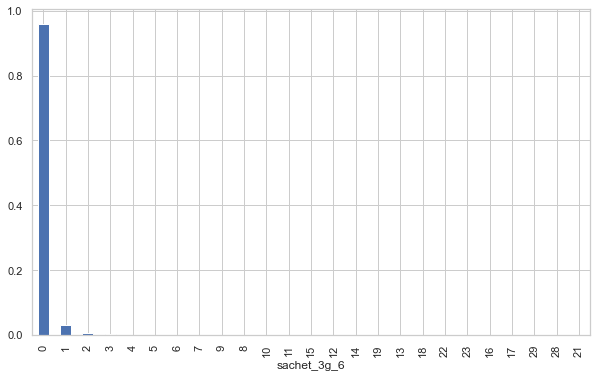

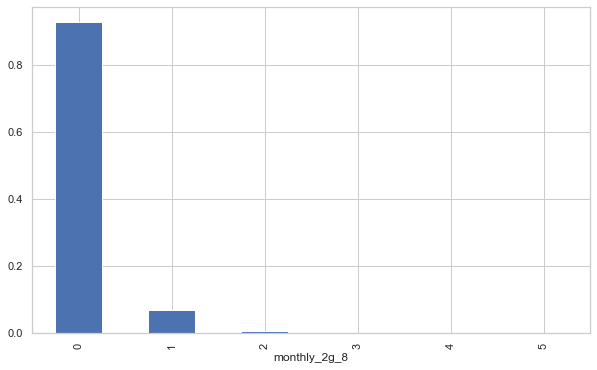

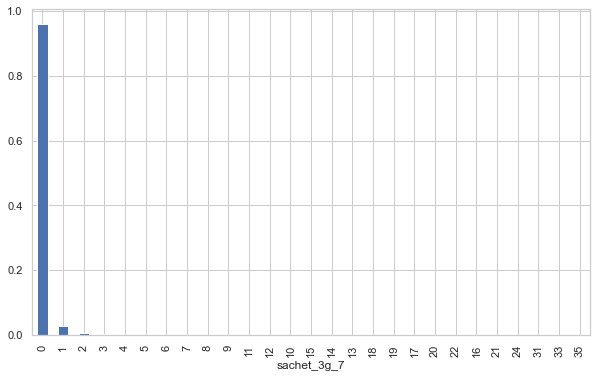

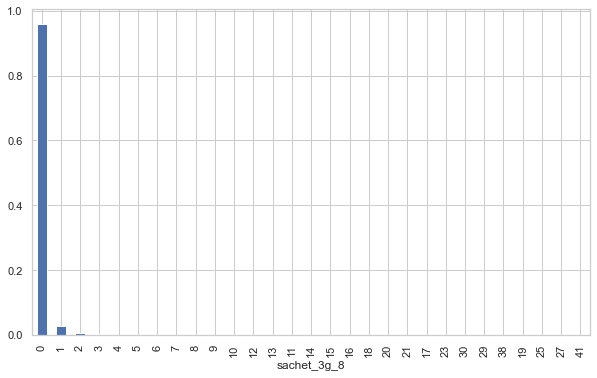

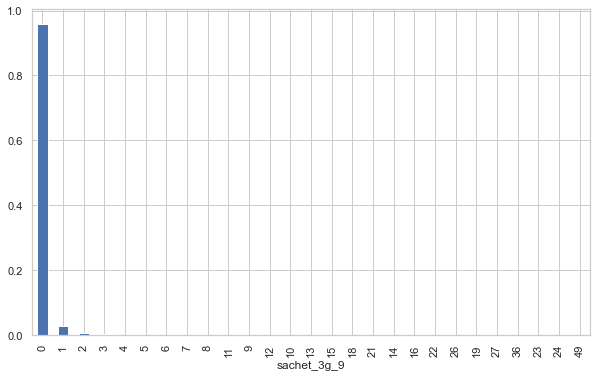

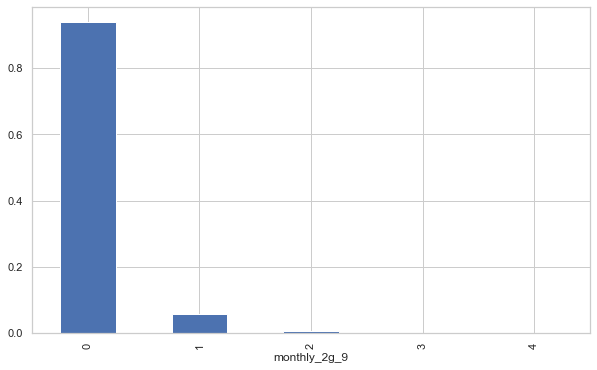

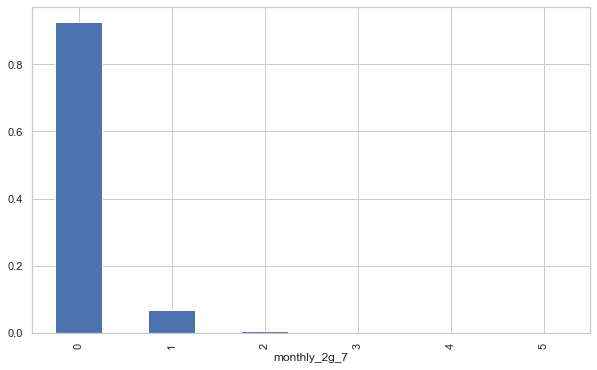

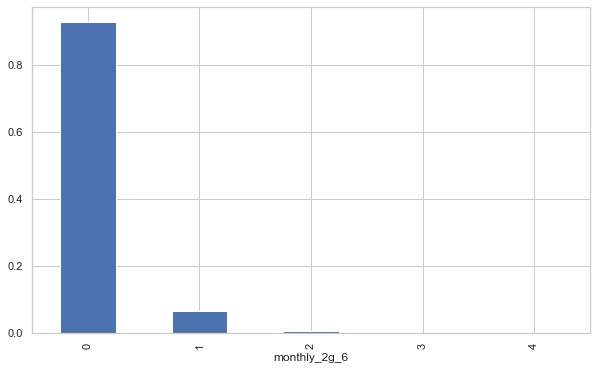

In [34]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
def letscount(df, varlist):
    for var in varlist:
        fig = plt.figure(figsize=(10,6))
        df[var].value_counts(dropna=False , normalize=True).sort_values(ascending = False ).plot.bar( xlabel = var)
        plt.show()
    return

letscount(inp_data,catVar)

In [35]:
### Seperate the categorical variables it is clear that the monthly variables can be treated as Categorical values however they are highly skewed to one value and hence dropping

In [36]:
monthlyVar =  inp_data.columns[inp_data.columns.str.contains('monthly')]
print(monthlyVar)

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9'],
      dtype='object')


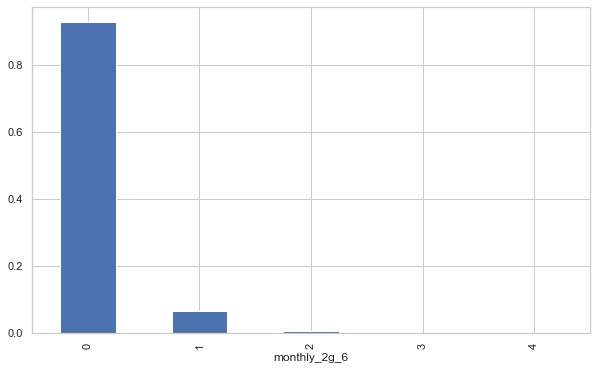

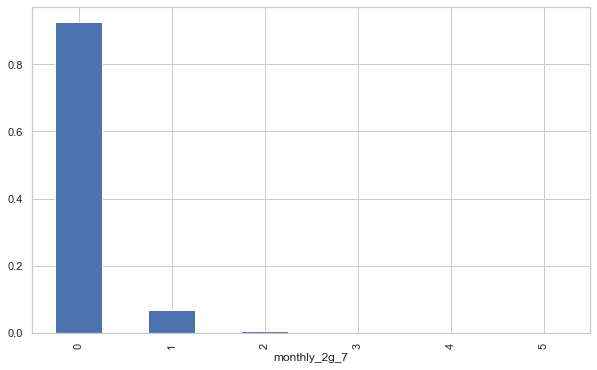

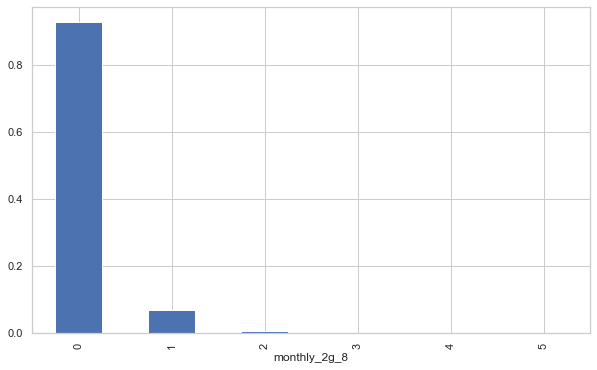

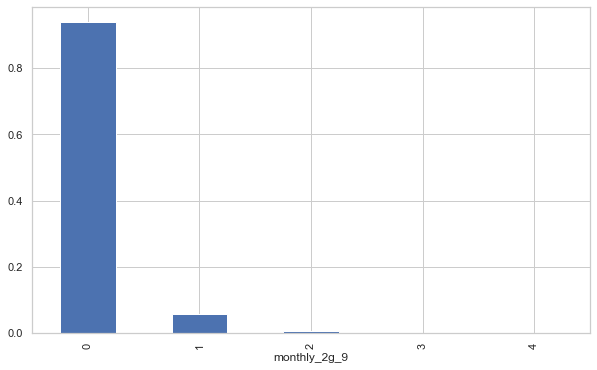

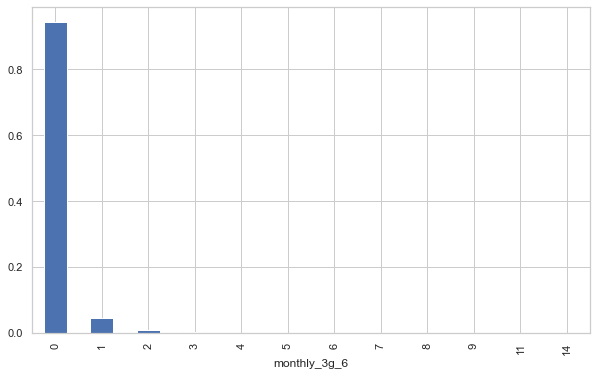

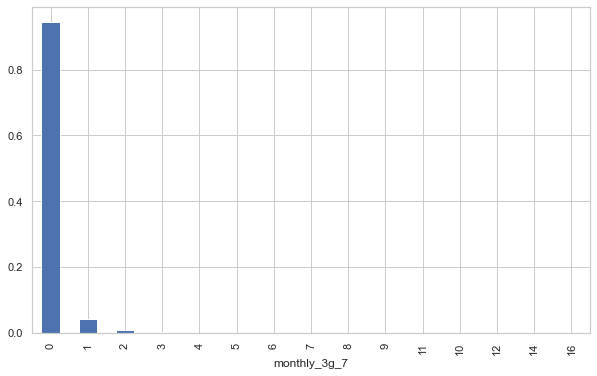

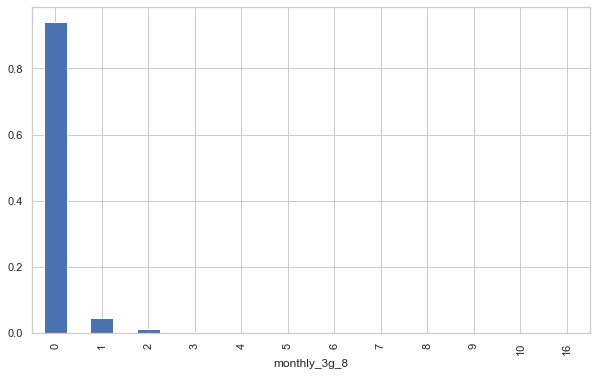

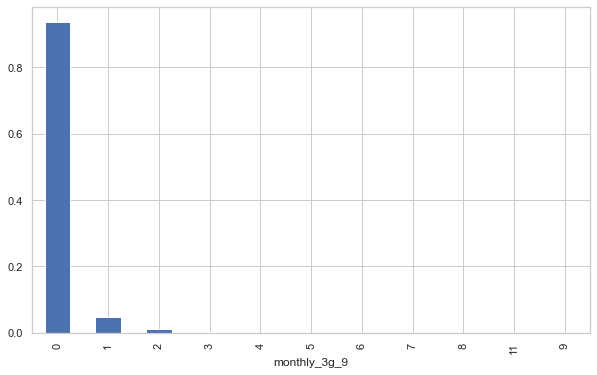

In [37]:
letscount(inp_data,monthlyVar)

In [38]:
# drop monthly variables as the values are skewed towards one variable
inp_data=dropVar(inp_data,monthlyVar)
inp_data.shape

(99999, 187)

### Duplicate Check

In [39]:
# Create a dummy dataframe (copy of original inp_data) for duplicate check
inp_dup = inp_data

# Checking for duplicates and dropping the entire duplicate row if any
inp_dup.drop_duplicates(subset=None, inplace=True)

inp_dup.shape

(99999, 187)

#### Insights: -
The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were NO DUPLICATE values in the dataset

In [40]:
# Check the summary for the numeric columns
inp_data.describe()

arpu_6               arpu_7               arpu_8  \
count            99,999.00            99,999.00            99,999.00   
mean                282.99               278.54               279.15   
std                 328.44               338.16               344.47   
min              -2,258.71            -2,014.05              -945.81   
25%                  93.41                86.98                84.13   
50%                 197.70               191.64               192.08   
75%                 371.06               365.34               369.37   
max              27,731.09            35,145.83            33,543.62   

                    arpu_9          onnet_mou_6          onnet_mou_7  \
count            99,999.00            96,062.00            96,140.00   
mean                261.65               132.40               133.67   
std                 342.00               297.21               308.79   
min              -1,899.51                 0.00                 0.00   
25%                  62.69                 7.38                 6.66   
50%                 176.85                34.31                32.33   
75%                 353.47               118.74               115.59   
max              38,805.62             7,376.71             8,157.78   

               onnet_mou_8          onnet_mou_9         offnet_mou_6  \
count            94,621.00            92,254.00            96,062.00   
mean                133.02               130.30               197.94   
std                 308.95               308.48               316.85   
min                   0.00                 0.00                 0.00   
25%                   6.46                 5.33                34.73   
50%                  32.36                29.84                96.31   
75%                 115.86               112.13               231.86   
max              10,752.56            10,427.46             8,362.36   

              offnet_mou_7         offnet_mou_8         offnet_mou_9  \
count            96,140.00            94,621.00            92,254.00   
mean                197.05               196.57               190.34   
std                 325.86               327.17               319.40   
min                   0.00                 0.00                 0.00   
25%                  32.19                31.63                27.13   
50%                  91.73                92.14                87.29   
75%                 226.82               228.26               220.50   
max               9,667.13            14,007.34            10,310.76   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
count            96,062.00            96,140.00            94,621.00   
mean                  9.95                 7.15                 7.29   
std                  72.83                73.45                68.40   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max              13,724.38            15,371.04            13,095.36   

             roam_ic_mou_9        roam_og_mou_6        roam_og_mou_7  \
count            92,254.00            96,062.00            96,140.00   
mean                  6.34                13.91                 9.82   
std                  57.14                71.44                58.46   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.00                 0.00   
75%                   0.00                 0.00                 0.00   
max               8,464.03             3,775.11             2,812.04   

             roam_og_mou_8        roam_og_mou_9     loc_og_t2t_mou_6  \
count            94,621.00            92,254.00       

In [41]:
df=prelimStats(inp_data)
catVar=list(df[df['Unique']<=2].index)
catVar

[]

In [42]:
inp_data.shape

(99999, 187)

In [43]:
# As the Categorical variables are removed , the missuing values can be imputed with mean

In [44]:
allVar = list (inp_data.columns ) 
# allVar

In [45]:
def missTreat(data,varlist):
    for var in varlist:
        mean_value=data[var].mean()
        data[var].fillna(value=mean_value, inplace=True)
    return data       

In [46]:
inp_data=missTreat(inp_data,allVar)

In [47]:
# Checking up the missing values 
inp_data.isnull().sum()
# sum(inp_data.isnull().sum())

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

In [48]:
# counts of number of variables having null values
sum(inp_data.isnull().sum())

0

### Understanding data


- The given dataset has 99999 rows and 226 columns.Quite a large dataset.
- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.
- The dataset is not clean (many missing values), so we will need to treat them accordingly.
- Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables.  
- Looks like the dataset contains several insignificant columns which have single value. 
- Independent Variable: All the variables except the 4 attribtes which is used to tag churners for the below dependent variable.
- Dependent Variable: To be derived variable name : 'churn' :('total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9')
- In churn prediction, we assume that there are three phases of customer lifecycle :
 - The ‘good’ phase [Month 6 & 7]
 - The ‘action’ phase [Month 8]
 - The ‘churn’ phase [Month 9]
- Here, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. 

## <font color = Red> Step 5: Data Preparation </font>

### <font color = Red> Step 5.1: Derive new features </font>

 We can derive more meaningful information using the above columns, such as:
 - Total Data revenue of the subscriber
 - Total Voice usage
 - Total data usage information
 - Total recharge amount
 - Maximum recharge amount
 - Last date of Recharging the data
 - Average recharge amount for data
 - Tenure derived from aon

In [49]:
# Lets derive  total_rech_amt_data
inp_data['total_rech_amt_data_6']=inp_data['av_rech_amt_data_6']*inp_data['total_rech_data_6']
inp_data['total_rech_amt_data_7']=inp_data['av_rech_amt_data_7']*inp_data['total_rech_data_7']
inp_data['total_rech_amt_data_8']=inp_data['av_rech_amt_data_8']*inp_data['total_rech_data_8']
inp_data['total_rech_amt_data_9']=inp_data['av_rech_amt_data_9']*inp_data['total_rech_data_9']

In [50]:
# correcting name of 4 columns where month is mentioned in column name instead of month number:

inp_data['vbc_3g_6']=inp_data['jun_vbc_3g']
inp_data['vbc_3g_7']=inp_data['jul_vbc_3g']
inp_data['vbc_3g_8']=inp_data['aug_vbc_3g']
inp_data['vbc_3g_9']=inp_data['sep_vbc_3g']

# drop the original column after renaming
inp_data = inp_data.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'], axis=1)


#Lets derive total Data revenue of the subscriber:
inp_data['total_rev_data_6']=inp_data['arpu_3g_6']+inp_data['arpu_2g_6']+inp_data['vbc_3g_6']
inp_data['total_rev_data_7']=inp_data['arpu_3g_7']+inp_data['arpu_2g_7']+inp_data['vbc_3g_7']
inp_data['total_rev_data_8']=inp_data['arpu_3g_8']+inp_data['arpu_2g_8']+inp_data['vbc_3g_8']
inp_data['total_rev_data_9']=inp_data['arpu_3g_9']+inp_data['arpu_2g_9']+inp_data['vbc_3g_9']

In [51]:
# total_usage_voice means total minutes of usage of voice
inp_data['total_usage_voice_6']=inp_data['total_og_mou_6']+inp_data['total_ic_mou_6']
inp_data['total_usage_voice_7']=inp_data['total_og_mou_7']+inp_data['total_ic_mou_7']
inp_data['total_usage_voice_8']=inp_data['total_og_mou_8']+inp_data['total_ic_mou_8']
inp_data['total_usage_voice_9']=inp_data['total_og_mou_9']+inp_data['total_ic_mou_9']

# total_usage_data means total volume (mb) of usage of data
inp_data['total_usage_data_6']=inp_data['vol_2g_mb_6']+inp_data['vol_3g_mb_6']
inp_data['total_usage_data_7']=inp_data['vol_2g_mb_7']+inp_data['vol_3g_mb_7']
inp_data['total_usage_data_8']=inp_data['vol_2g_mb_8']+inp_data['vol_3g_mb_8']
inp_data['total_usage_data_9']=inp_data['vol_2g_mb_9']+inp_data['vol_3g_mb_9']

In [52]:
# We have a column called 'aon' and we can derive new variables from this to explain the data w.r.t churn.
# creating a new variable 'tenure'
inp_data['tenure'] = (inp_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
inp_data.drop('aon',axis=1, inplace=True)

In [53]:
inp_data.head()

arpu_6               arpu_7               arpu_8  \
0               197.38               214.82               213.80   
1                34.05               355.07               268.32   
2               167.69               189.06               210.23   
3               221.34               251.10               508.05   
4               261.64               309.88               238.17   

                arpu_9          onnet_mou_6          onnet_mou_7  \
0                21.10               132.40               133.67   
1                86.28                24.11                78.68   
2               290.71                11.54                55.24   
3               389.50                99.91                54.39   
4               163.43                50.31               149.44   

           onnet_mou_8          onnet_mou_9         offnet_mou_6  \
0                 0.00               130.30               197.94   
1                 7.68                18.34                15.74   
2                37.26                74.81               143.33   
3               310.98               241.71               123.31   
4                83.89                58.78                76.96   

          offnet_mou_7         offnet_mou_8         offnet_mou_9  \
0               197.05                 0.00               190.34   
1                99.84               304.76                53.76   
2               220.59               208.36               118.91   
3               109.01                71.68               113.54   
4                91.88               124.26                45.81   

         roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
0                 9.95                 7.15                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                54.86                44.38   
4                 0.00                 0.00                 0.00   

         roam_ic_mou_9        roam_og_mou_6        roam_og_mou_7  \
0                 6.34                13.91                 9.82   
1                 0.00                 0.00                 0.00   
2                38.49                 0.00                 0.00   
3                 0.00                 0.00                28.09   
4                 0.00                 0.00                 0.00   

         roam_og_mou_8        roam_og_mou_9     loc_og_t2t_mou_6  \
0                 0.00                 8.56                 0.00   
1                 0.00                 0.00                23.88   
2                 0.00                70.94                 7.19   
3                39.04                 0.00                73.68   
4                 0.00                 0.00                50.31   

      loc_og_t2t_mou_7     loc_og_t2t_mou_8     loc_og_t2t_mou_9  \
0                 0.00                 0.00                44.58   
1                74.56                 7.68                18.34   
2                28.74                13.58                14.39   
3                34.81                10.61                15.49   
4               149.44                83.89                58.78   

      loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
0                 0.00                 0.00                 0.00   
1                11.51                75.94               291.86   
2                29.34                16.86                38.46   
3               107.43                83.21                22.46   
4                67.64                91.88               124.26   

      loc_og_t2m_mou_9     loc_og_t2f_mou_6     loc_og_t2f_mou_7  \
0                90.46                 0.00                 0.00   
1                53.76                 0.00                 0.00   
2                28.16                24.11                21.79   
3                65.46                 1.91                 0.6

### <font color = Red> Step 5.2: Filter high-value customers </font>

#### Identifying high-value customers:
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [54]:
# Calculating the average recharge of first 2 months (6th and 7th month)  for 'good' phase (used in computation of high value customer)
inp_data['av_rech']=(inp_data['total_rech_amt_6']+inp_data['total_rech_amt_7'])/2

# Computing percentile values for derived column: av_rech
inp_data['av_rech'].describe(percentiles=[.25,.5,.70,0.71,.90,.95,.99])

count              99,999.00
mean                  325.24
std                   370.83
min                     0.00
25%                   115.00
50%                   229.00
70%                   368.50
71%                   377.00
90%                   698.00
95%                   937.50
99%                 1,590.00
max                37,762.50
Name: av_rech, dtype: float64

In [55]:
inp_data['av_rech'].quantile(0.7)

368.5

In [56]:
# Considering 70th percentile as threshold, retaining data for only high-value customer (70%)
inp_data=inp_data[inp_data['av_rech']>= inp_data['av_rech'].quantile(0.7)]

# Computing the count of High-Value Customers
print(f'Count of High-Value Customers: {inp_data.shape[0]}')

Count of High-Value Customers: 30011


### <font color = Red> Step 5.3: Outlier treatment </font>

In [57]:
# Using 95% as cap for outliers as all the variables are numeric now
# inp_data['timeSpent']=Leads['timeSpent'].apply(lambda x: 1838.96 if x >17 else x)

def treatOut(data, varlist):
    for var in varlist:
        cap = data[var].quantile(0.95)
        data[var]=data[var].apply(lambda x: cap if x > cap else x)
    return data

In [58]:
allVar = list (inp_data.columns)
# inp_data1= treatOut(inp_data, allVar)
allVar
inp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 204 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   arpu_9                 float64
 4   onnet_mou_6            float64
 5   onnet_mou_7            float64
 6   onnet_mou_8            float64
 7   onnet_mou_9            float64
 8   offnet_mou_6           float64
 9   offnet_mou_7           float64
 10  offnet_mou_8           float64
 11  offnet_mou_9           float64
 12  roam_ic_mou_6          float64
 13  roam_ic_mou_7          float64
 14  roam_ic_mou_8          float64
 15  roam_ic_mou_9          float64
 16  roam_og_mou_6          float64
 17  roam_og_mou_7          float64
 18  roam_og_mou_8          float64
 19  roam_og_mou_9          float64
 20  loc_og_t2t_mou_6       float64
 21  loc_og_t2t_mou_7       float64
 22  loc_og_t2t_mou_8     

In [59]:
inp_data= treatOut(inp_data, allVar)

In [60]:
inp_data.head()

arpu_6               arpu_7               arpu_8  \
7              1,069.18             1,261.42             1,258.56   
8                378.72               492.22               137.36   
13               492.85               205.67               593.26   
16               430.98               299.87               187.89   
17               690.01                18.98                25.50   

                 arpu_9          onnet_mou_6          onnet_mou_7  \
7                500.00                57.84                54.68   
8                166.79               413.69               351.03   
13               322.73               501.76               108.39   
16               206.49                50.51                74.01   
17               257.58             1,153.97                 9.28   

            onnet_mou_8          onnet_mou_9         offnet_mou_6  \
7                 52.29               130.30               453.43   
8                 35.08                33.46                94.66   
13               534.24               244.81               413.31   
16                70.61                31.34               296.29   
17                 7.79               558.51                61.64   

           offnet_mou_7         offnet_mou_8         offnet_mou_9  \
7                567.16               325.91               190.34   
8                 80.63               136.48               108.71   
13               119.28               482.46               214.06   
16               229.74               162.76               224.39   
17                 0.00                 5.54                87.89   

          roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
7                 16.23                33.49                31.64   
8                  0.00                 0.00                 0.00   
13                23.53                63.34                62.80   
16                 0.00                 2.83                 0.00   
17                 0.00                 4.76                 4.81   

          roam_ic_mou_9        roam_og_mou_6        roam_og_mou_7  \
7                  6.34                23.74                12.59   
8                  0.00                 0.00                 0.00   
13                49.55                 7.98                35.26   
16                 0.00                 0.00                17.74   
17                 0.00                 0.00                 8.46   

          roam_og_mou_8        roam_og_mou_9     loc_og_t2t_mou_6  \
7                 38.06                 8.56                51.39   
8                  0.00                 0.00               297.13   
13                 1.44                12.78                49.63   
16                 0.00                 0.00                42.61   
17                13.34                17.98                38.99   

       loc_og_t2t_mou_7     loc_og_t2t_mou_8     loc_og_t2t_mou_9  \
7                 31.38                40.28                44.58   
8                217.59                12.49                26.13   
13                 6.19                36.01                 6.14   
16                65.16                67.38                26.88   
17                 0.00                 0.00                36.41   

       loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
7                308.63               447.38               162.28   
8                 80.96                70.58                50.54   
13               151.13                47.28               294.46   
16               273.29               145.99               128.28   
17                58.54                 0.00                 0.00   

       loc_og_t2m_mou_9     loc_og_t2f_mou_6     loc_og_t2f_mou_7  \
7                 90.46                33.59                34.09   
8                 34.58                 0.00                 0.00   
13               108.24                 4.54                 0.00   
16    

### <font color = Red> Step 5.4: Tag churners and remove attributes of the churn phase </font>

#### Tag the churned customers (churn=1, else 0) based on the fourth month as follows:

- Those who have not made any calls (either incoming or outgoing)

- AND have not used mobile internet even once in the churn phase.

- The attributes you need to use to tag churners are:

  - total_ic_mou_9

  - total_og_mou_9

  - vol_2g_mb_9

  - vol_3g_mb_9

In [61]:
inp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 204 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   arpu_9                 float64
 4   onnet_mou_6            float64
 5   onnet_mou_7            float64
 6   onnet_mou_8            float64
 7   onnet_mou_9            float64
 8   offnet_mou_6           float64
 9   offnet_mou_7           float64
 10  offnet_mou_8           float64
 11  offnet_mou_9           float64
 12  roam_ic_mou_6          float64
 13  roam_ic_mou_7          float64
 14  roam_ic_mou_8          float64
 15  roam_ic_mou_9          float64
 16  roam_og_mou_6          float64
 17  roam_og_mou_7          float64
 18  roam_og_mou_8          float64
 19  roam_og_mou_9          float64
 20  loc_og_t2t_mou_6       float64
 21  loc_og_t2t_mou_7       float64
 22  loc_og_t2t_mou_8     

In [62]:
# Calculating the total usage (voice & Data) and tag churners

inp_data['churn'] = inp_data.apply(lambda row: 1 if (row.total_og_mou_9 == 0 and row.total_ic_mou_9 == 0 and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0) else 0, axis=1)  

In [63]:
inp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 205 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   arpu_9                 float64
 4   onnet_mou_6            float64
 5   onnet_mou_7            float64
 6   onnet_mou_8            float64
 7   onnet_mou_9            float64
 8   offnet_mou_6           float64
 9   offnet_mou_7           float64
 10  offnet_mou_8           float64
 11  offnet_mou_9           float64
 12  roam_ic_mou_6          float64
 13  roam_ic_mou_7          float64
 14  roam_ic_mou_8          float64
 15  roam_ic_mou_9          float64
 16  roam_og_mou_6          float64
 17  roam_og_mou_7          float64
 18  roam_og_mou_8          float64
 19  roam_og_mou_9          float64
 20  loc_og_t2t_mou_6       float64
 21  loc_og_t2t_mou_7       float64
 22  loc_og_t2t_mou_8     

In [64]:
# Churn Rate or percentage of churn customere within our dataframe of High-Value customers
print(f'Churn rate within High-Value Customers: {round(len(inp_data[inp_data["churn"]>0].index)/len(inp_data.index)*100,2)}')

Churn rate within High-Value Customers: 8.64


In [65]:
inp_data['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [66]:
# Tag churners and remove attributes of the churn phase

### <font color = Red> Step 5.5:  Removing all the attributes corresponding to the churn phase </font>

In [67]:
# Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)
cols_exc_9 =  inp_data.columns[inp_data.columns.str.contains('_9')]

In [68]:
inp_data.drop(cols_exc_9,axis=1,inplace=True)

In [69]:
inp_data.shape

(30011, 153)

#### Insights:

- We have cleaned the dataframe with proper treatment of handling missing values, columns and data imbalance columns.
- After cleaning columns left:153
- Count of High-Value Customers: 30011
- Churn rate within High-Value Customers: 8.64


## <font color = Red> Step 6: Exploratory Data Analysis </font>

####  Lets Visualise all the important variables.

#### Column: churn

In [70]:
# churn is the target variable, Indicates whether a customer  has been churned (1) or not (0).
Churned = (sum(inp_data['churn'])/len(inp_data['churn'].index))*100
Churned

8.64016527273333

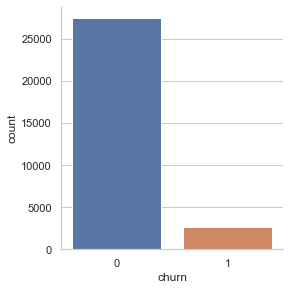

0    27418
1    2593 
Name: churn, dtype: int64

In [71]:
# Checking class imbalance
sns.catplot(x="churn", kind="count", data=inp_data, height=4, aspect=1)
plt.show()
inp_data['churn'].value_counts()

#### Insights:
- We can see the rate of churn is typically low about 8%, this is called class-imbalance.
- There are multiple ways of handling class imbalance. We will see and use one of the technique hich ill be suitable for our case in the modeling phase.

#### Lets visualise useful insights 

In [72]:
# Function for Univariate Analysis of Numerical column using box plot.
def univar_plot(c):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(y=c, data=inp_data)
    plt.show()

In [73]:
# Function for Bivariate Analysis of Numerical column using box plot.
def bivar_plot(c1,c2):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x=c1, y=c2, data=inp_data)
    plt.show()

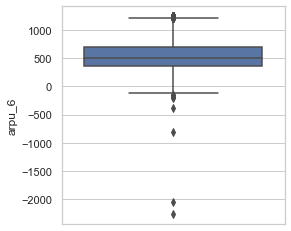

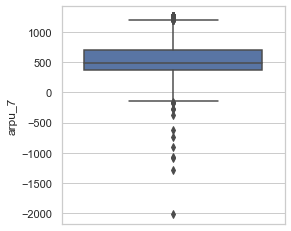

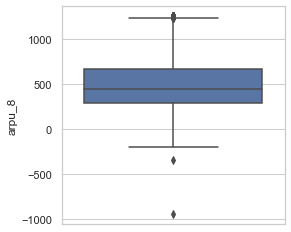

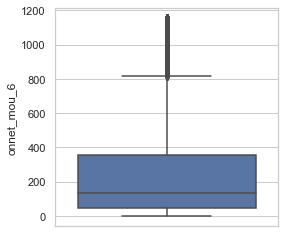

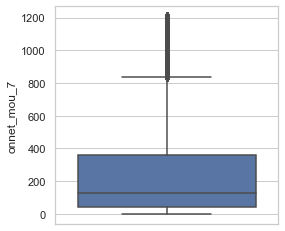

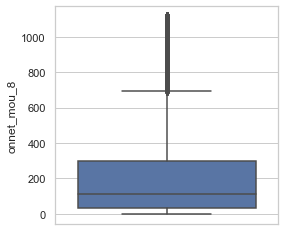

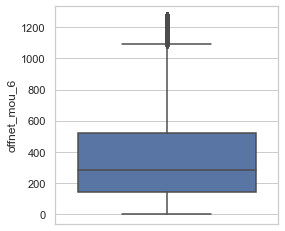

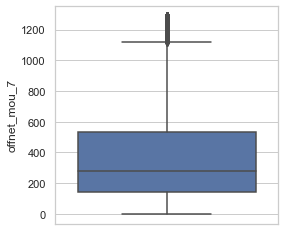

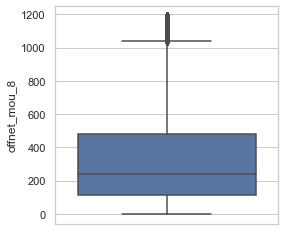

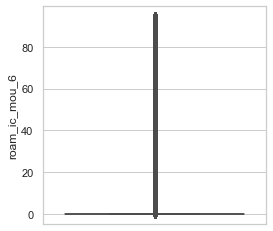

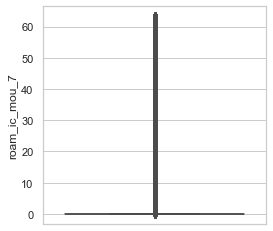

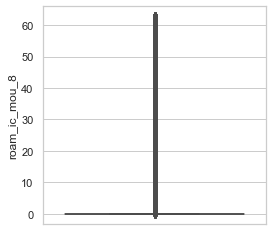

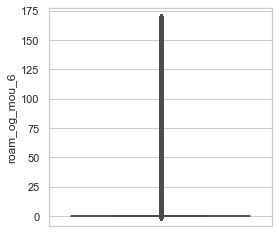

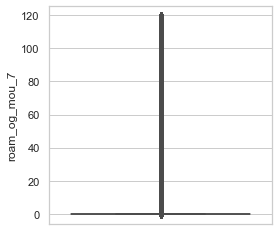

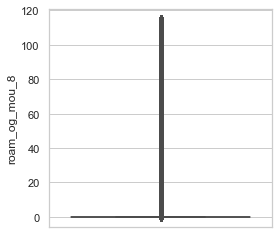

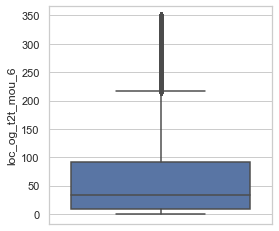

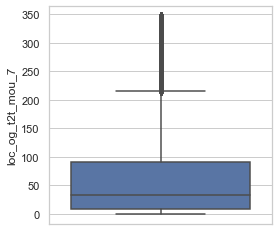

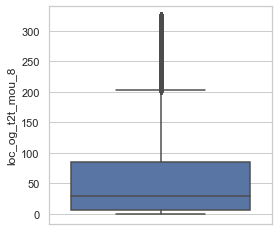

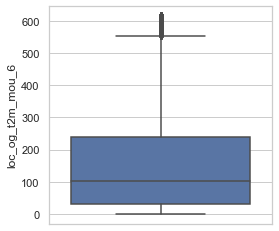

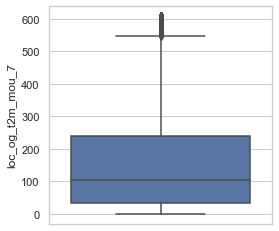

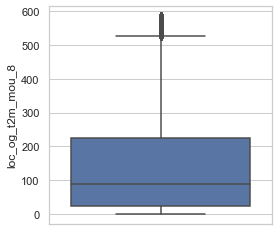

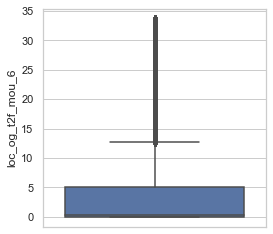

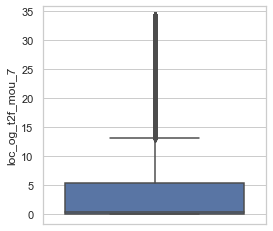

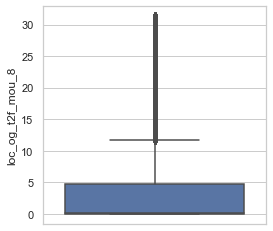

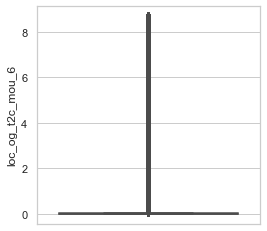

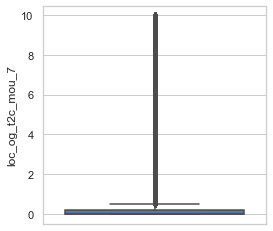

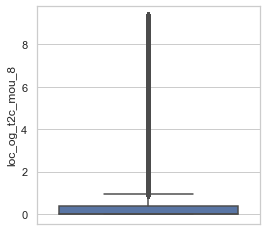

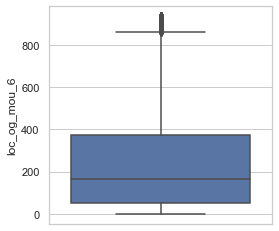

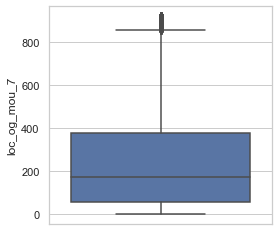

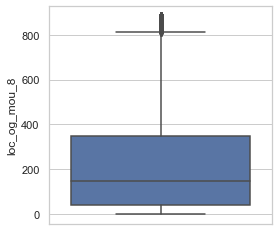

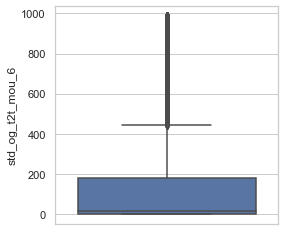

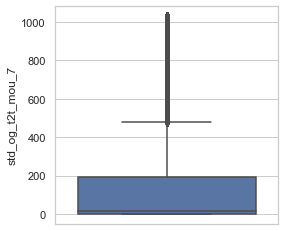

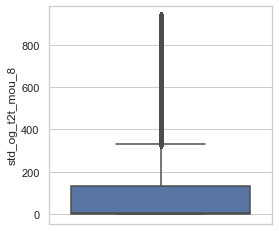

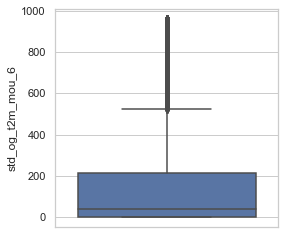

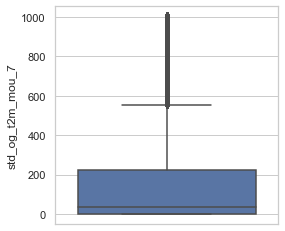

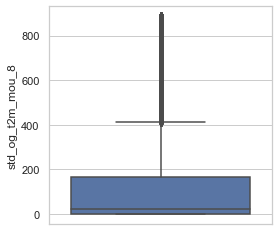

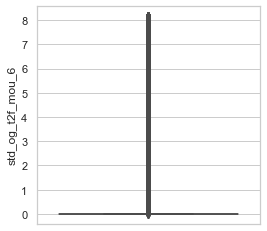

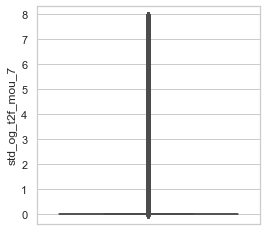

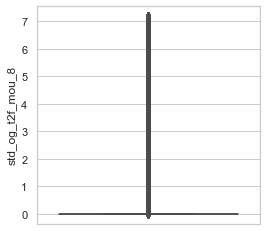

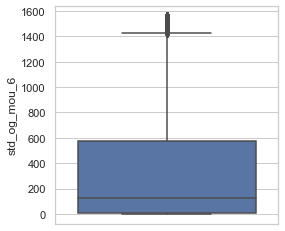

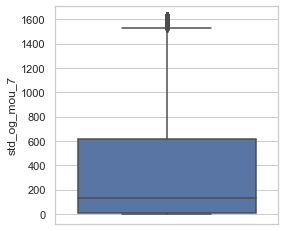

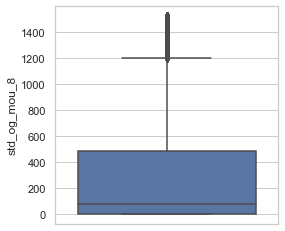

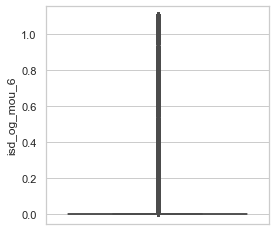

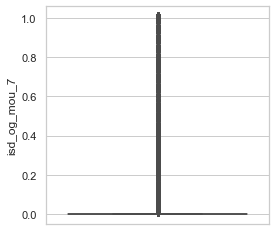

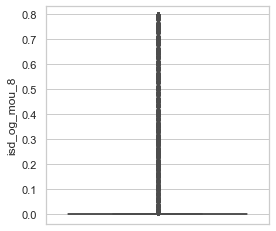

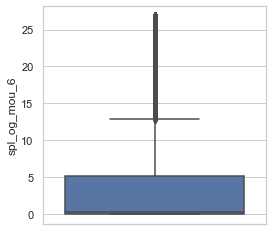

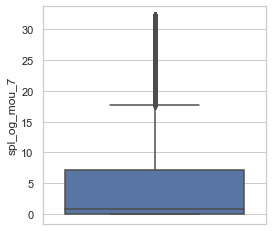

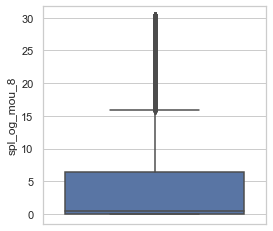

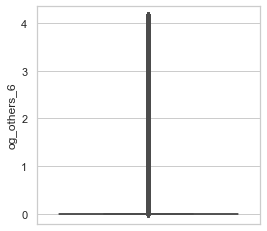

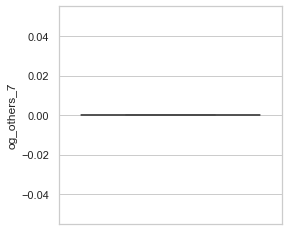

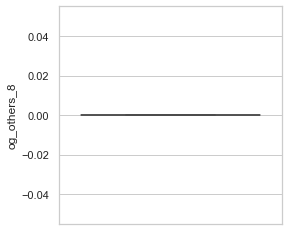

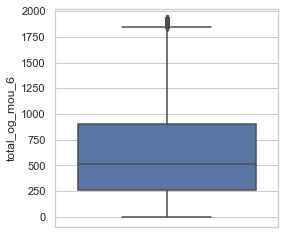

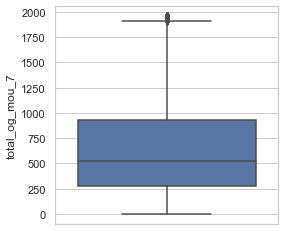

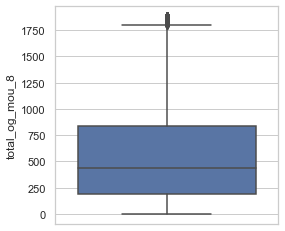

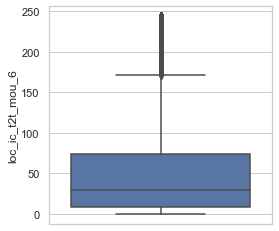

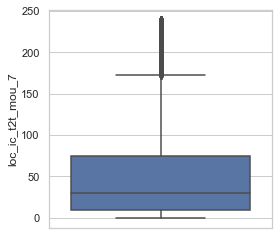

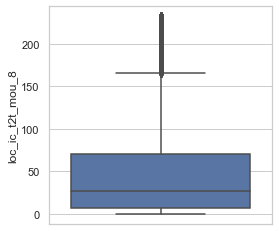

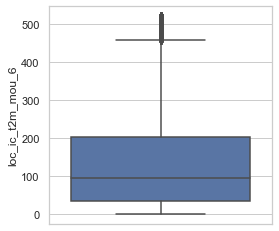

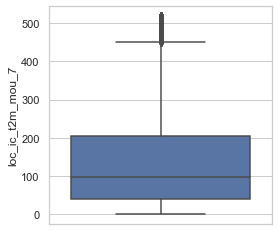

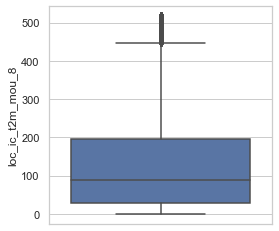

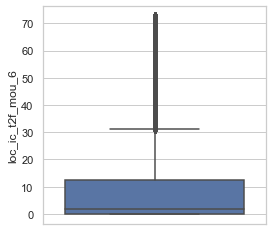

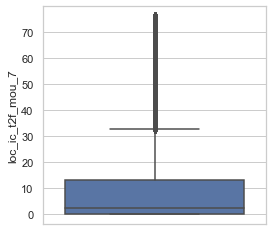

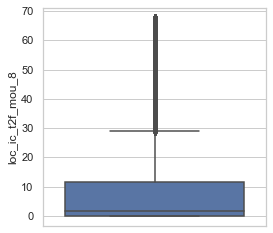

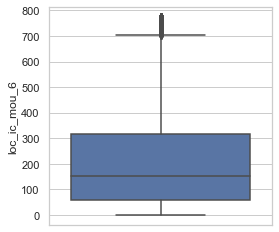

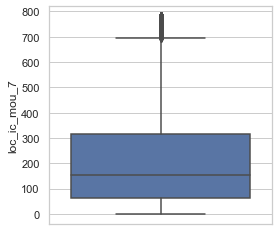

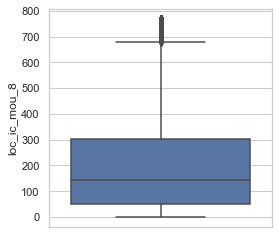

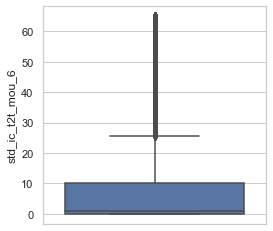

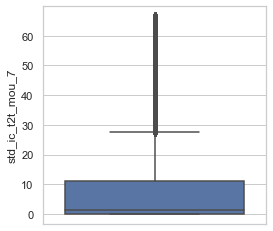

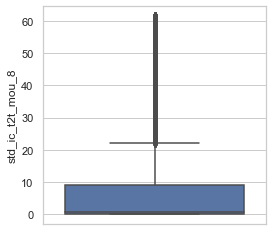

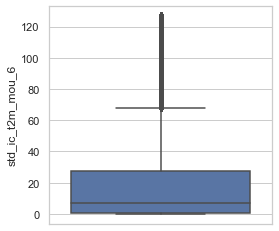

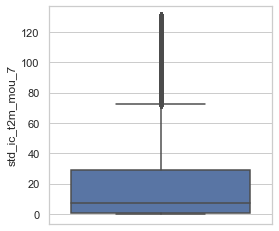

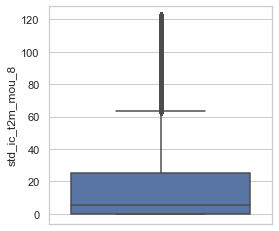

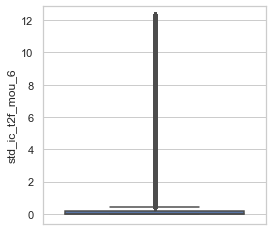

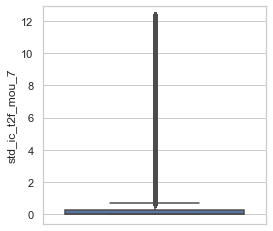

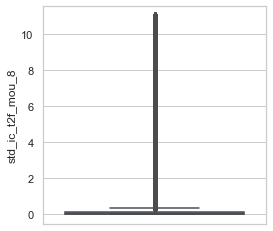

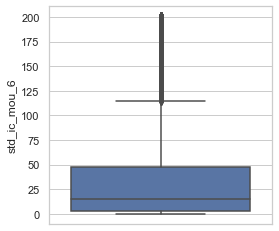

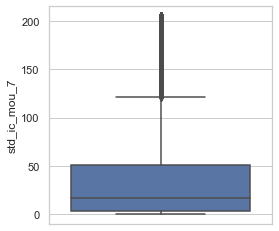

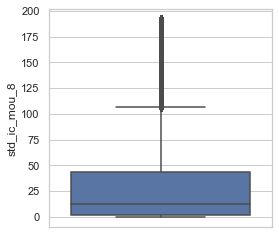

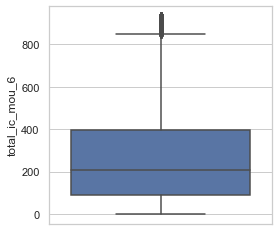

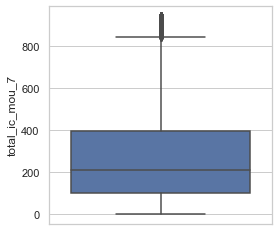

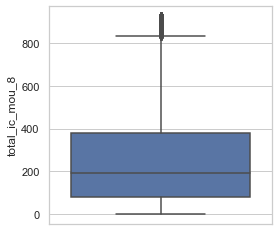

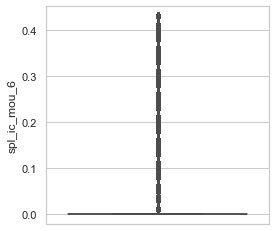

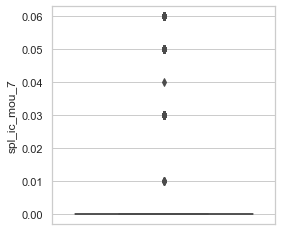

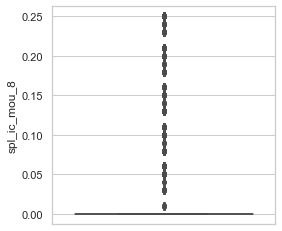

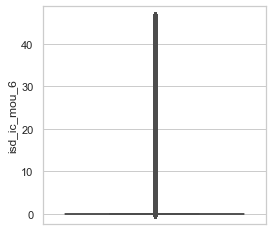

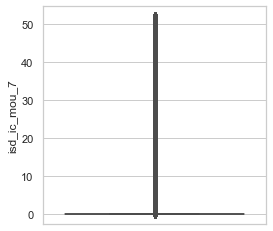

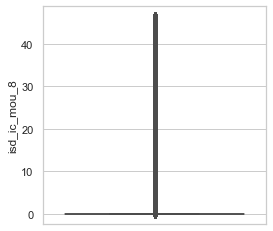

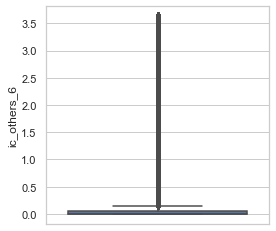

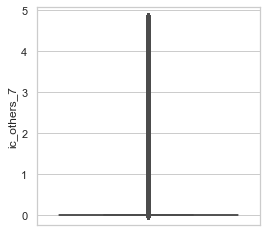

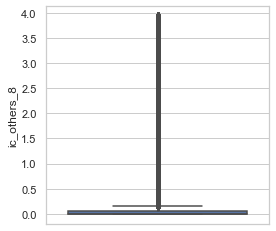

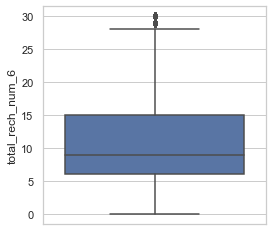

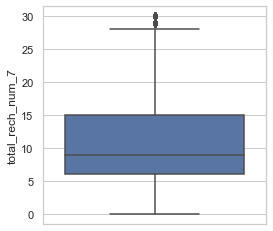

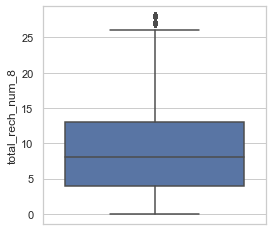

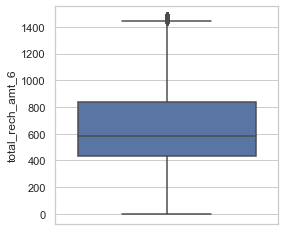

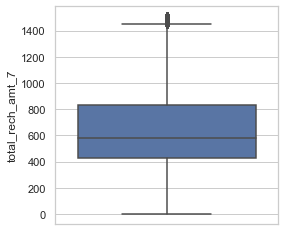

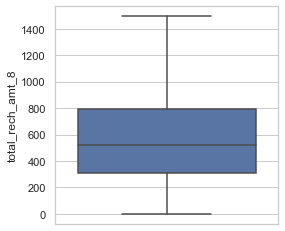

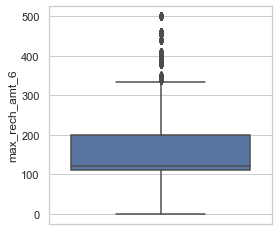

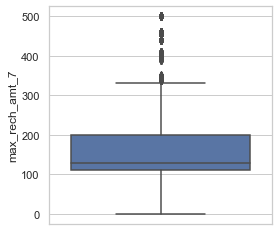

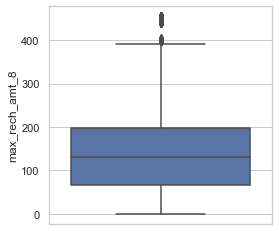

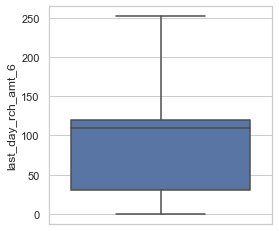

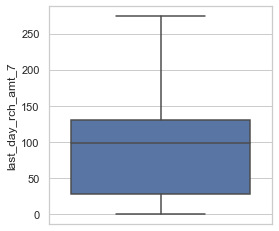

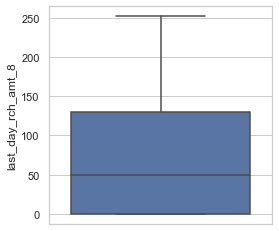

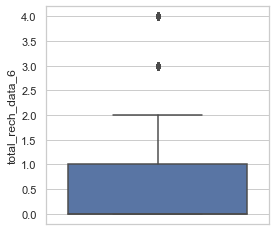

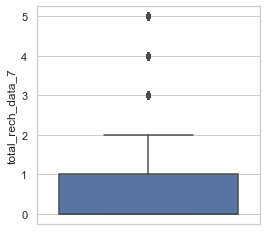

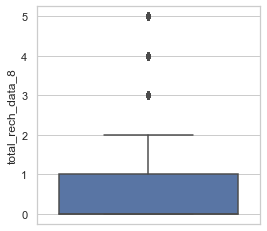

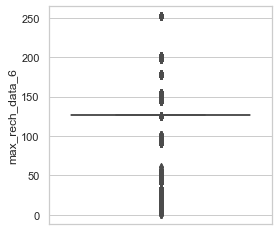

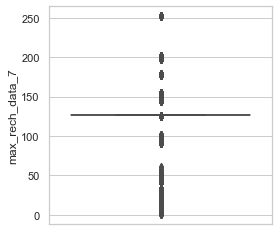

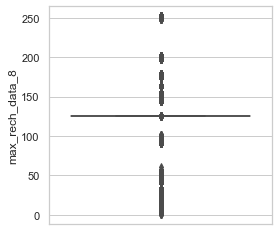

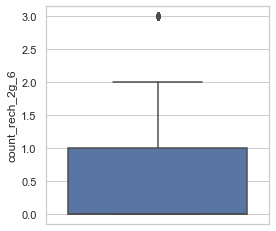

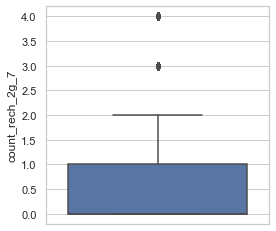

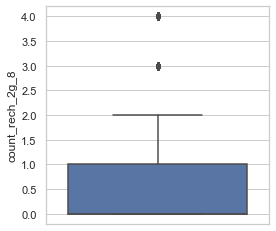

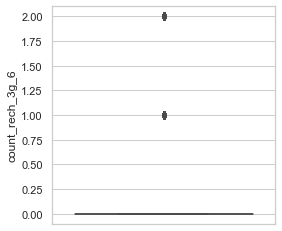

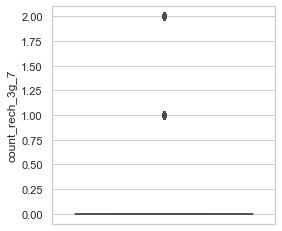

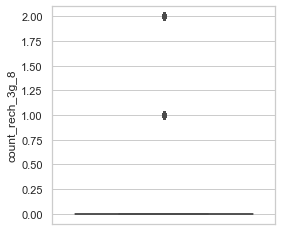

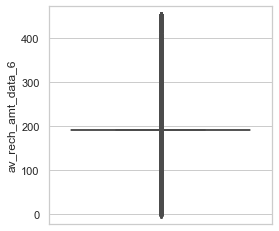

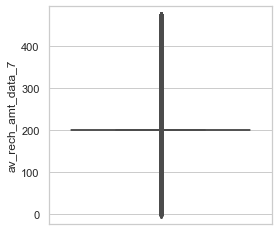

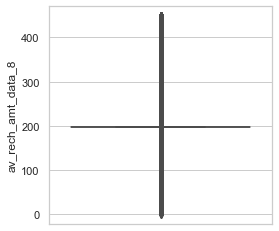

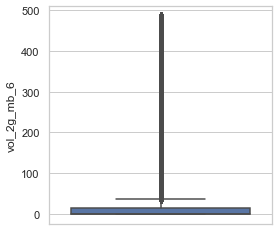

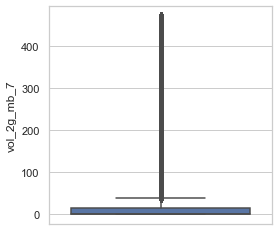

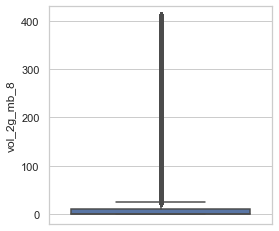

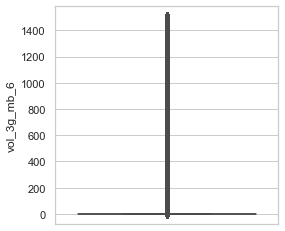

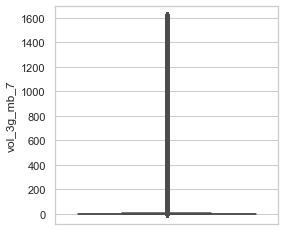

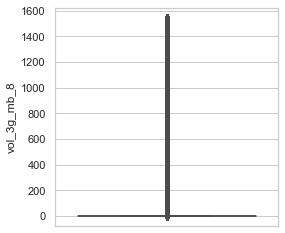

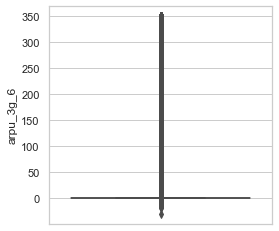

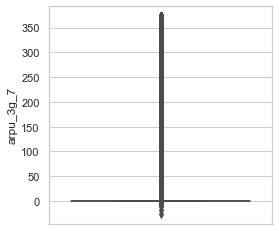

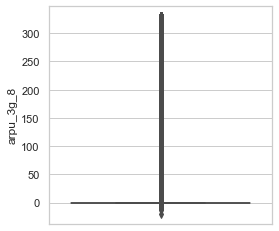

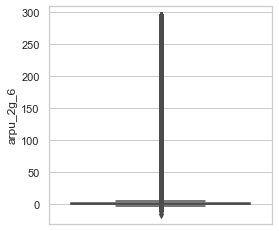

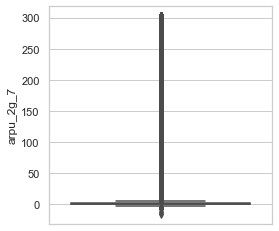

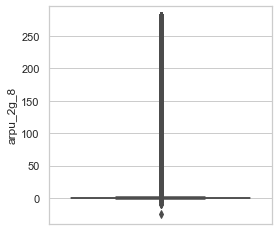

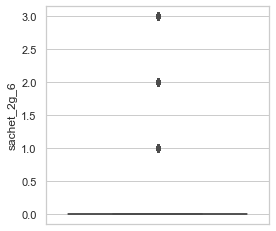

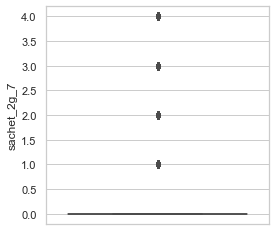

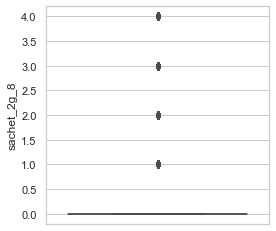

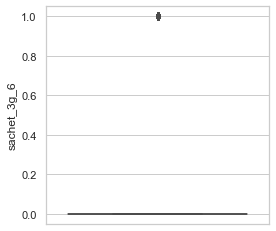

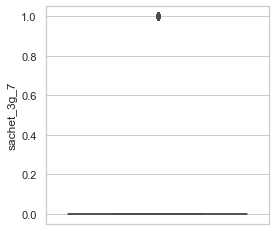

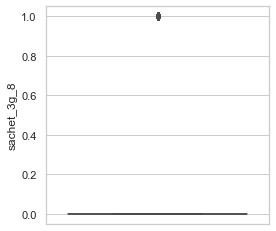

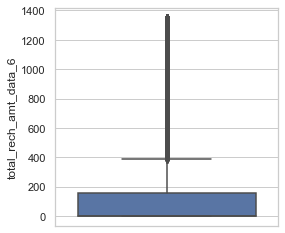

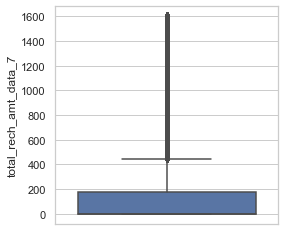

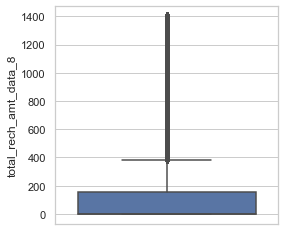

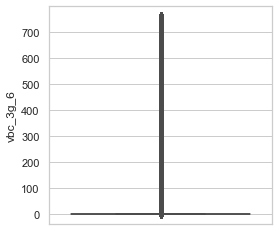

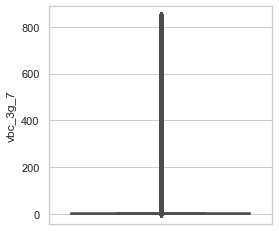

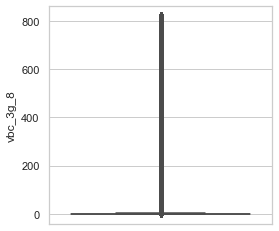

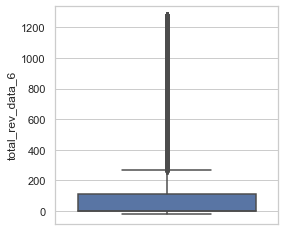

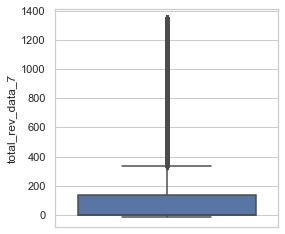

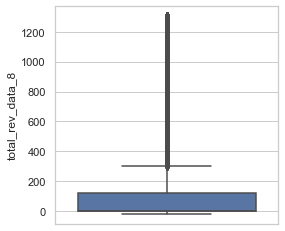

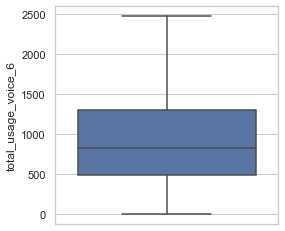

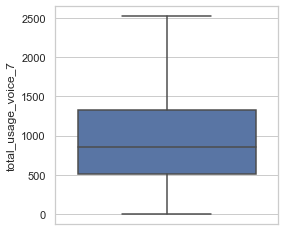

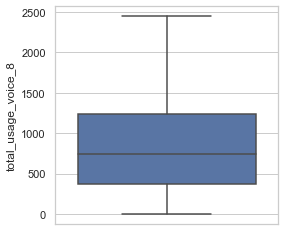

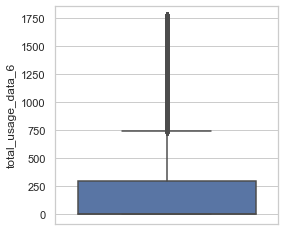

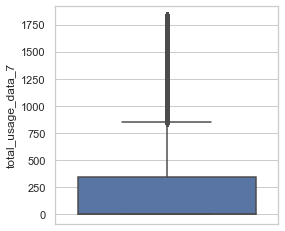

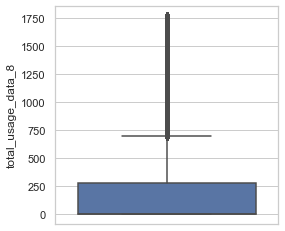

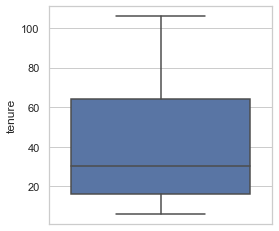

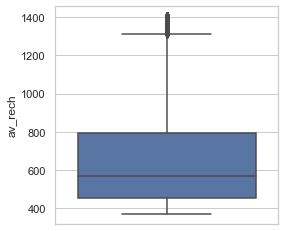

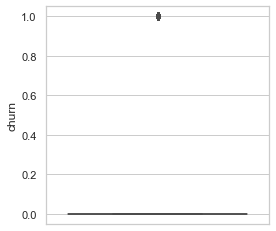

In [74]:
# Univariate Analysis of Numerical Columns
processes = []
for c in inp_data.columns:
    univar_plot(c)


#### Insights:
We can see other than the recharge related columns , rest of the columns have very low values, i.e.  they have a very narrow range of freqency.

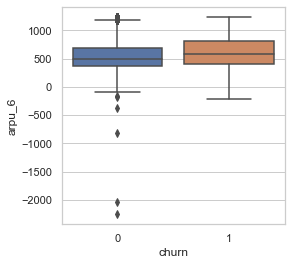

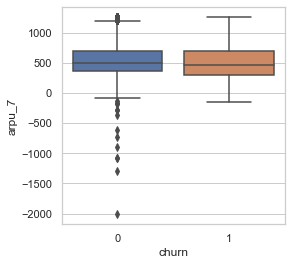

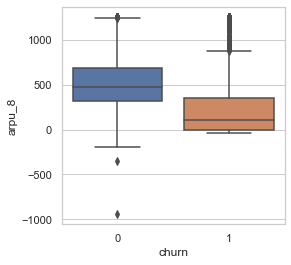

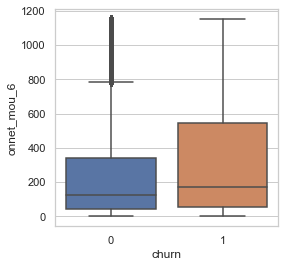

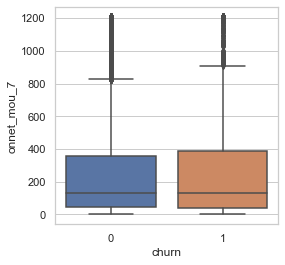

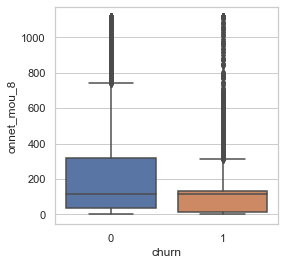

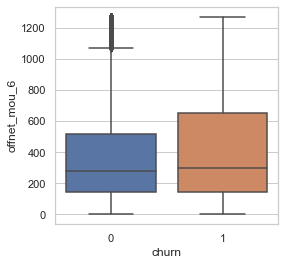

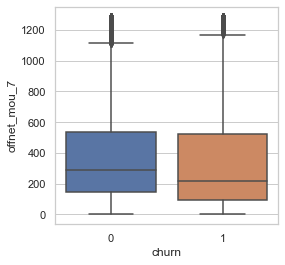

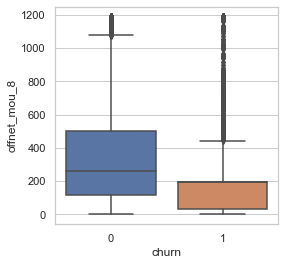

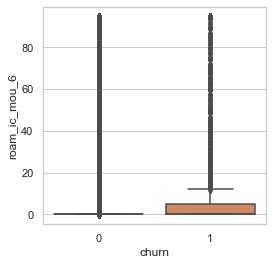

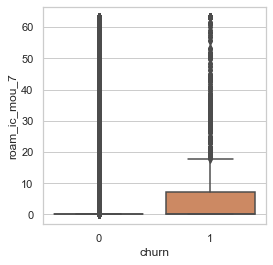

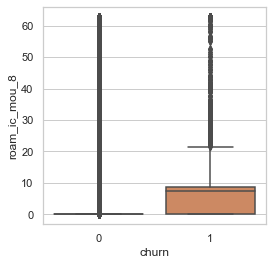

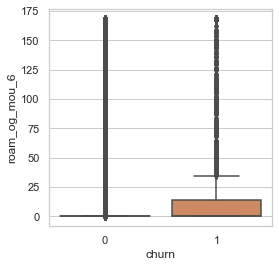

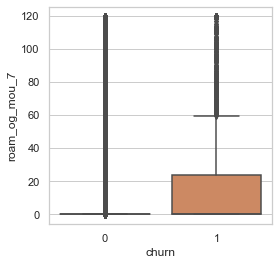

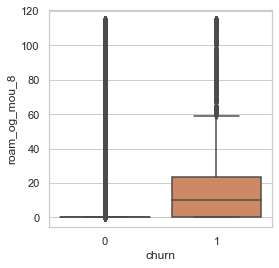

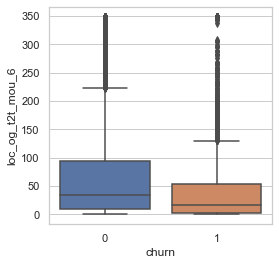

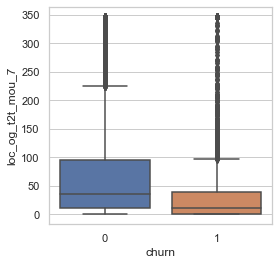

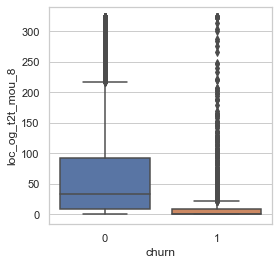

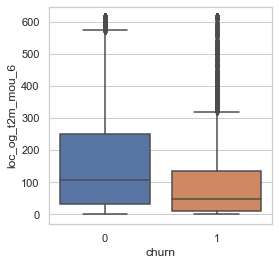

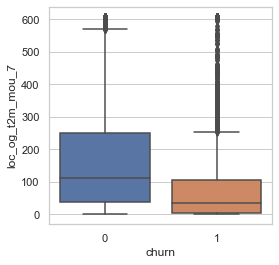

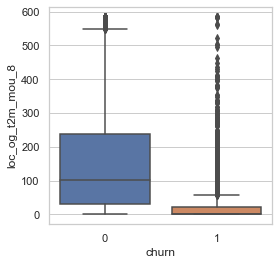

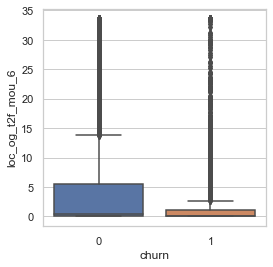

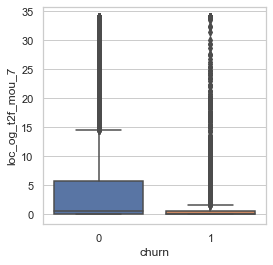

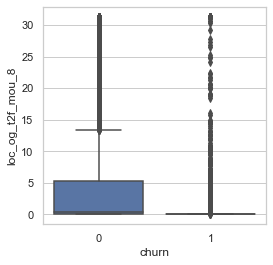

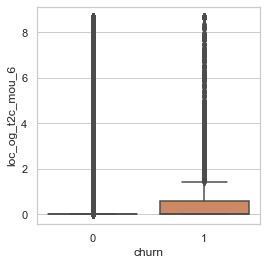

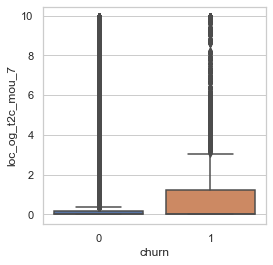

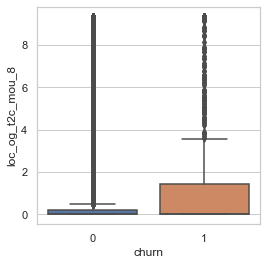

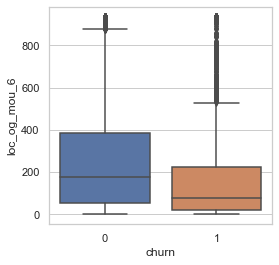

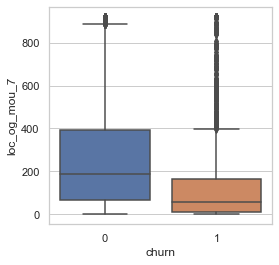

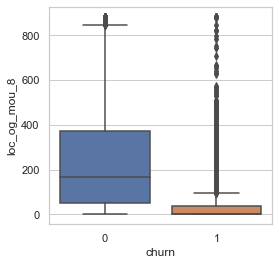

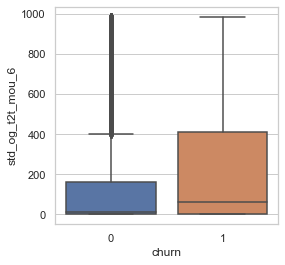

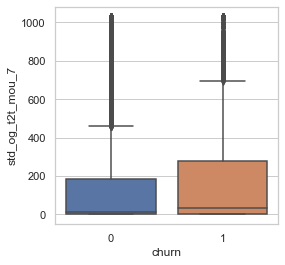

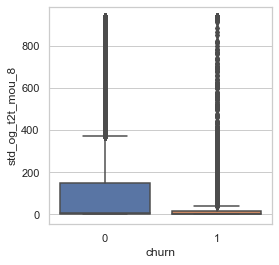

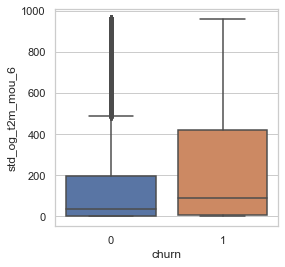

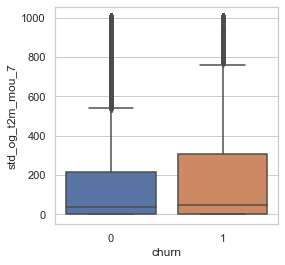

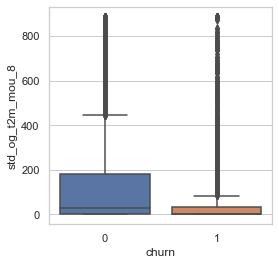

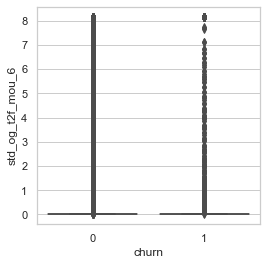

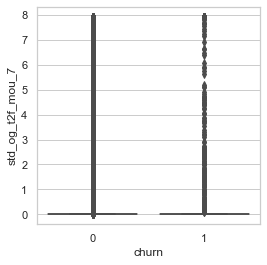

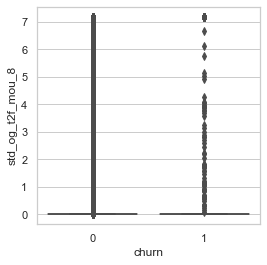

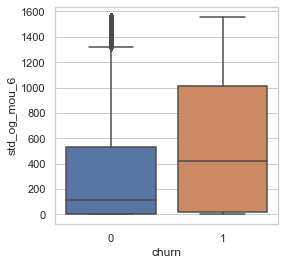

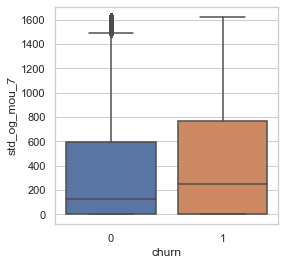

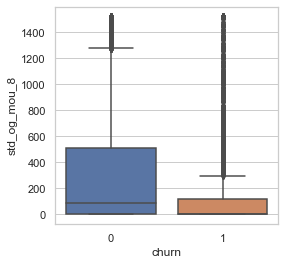

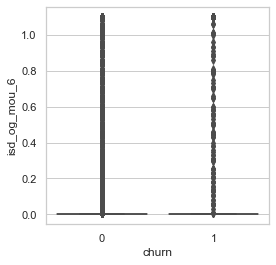

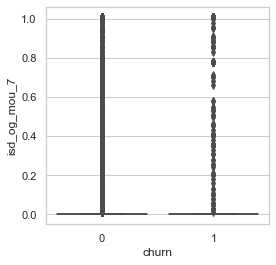

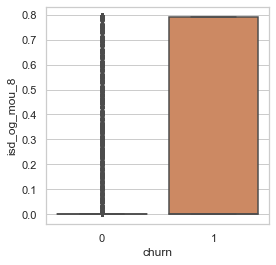

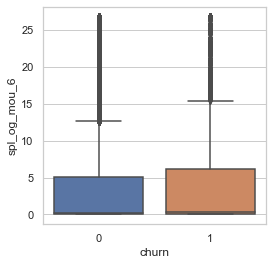

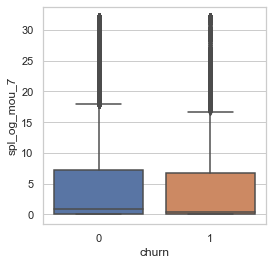

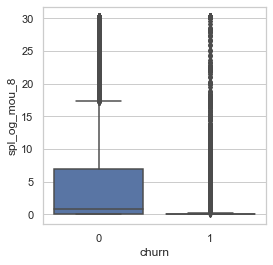

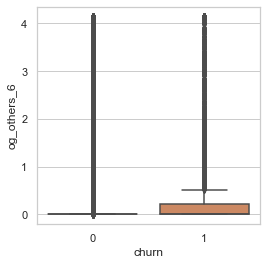

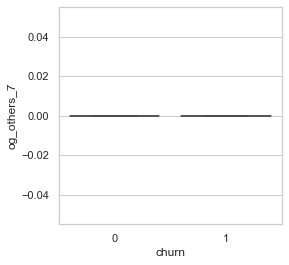

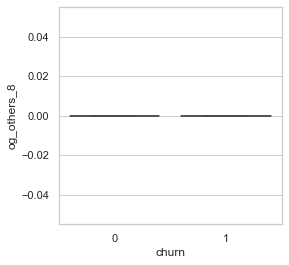

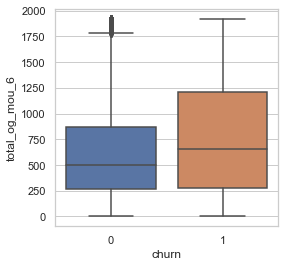

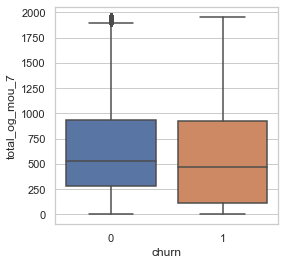

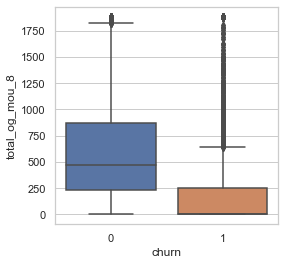

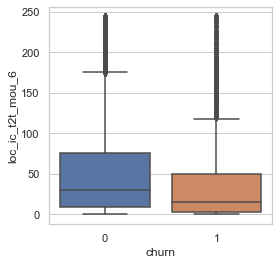

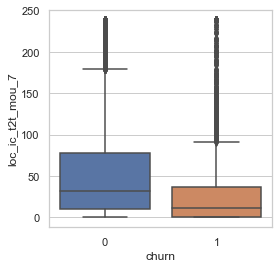

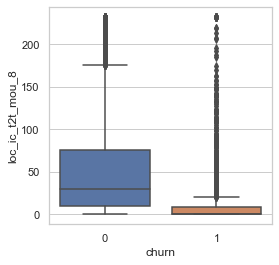

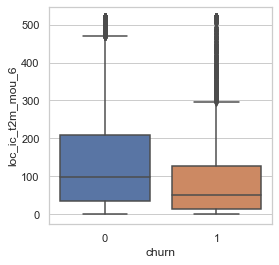

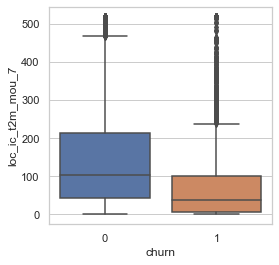

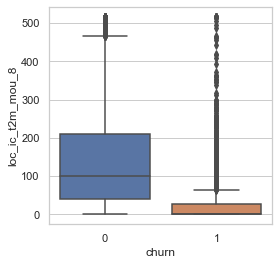

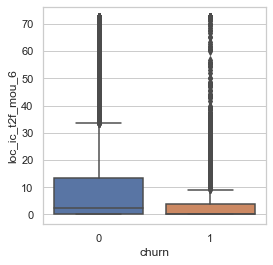

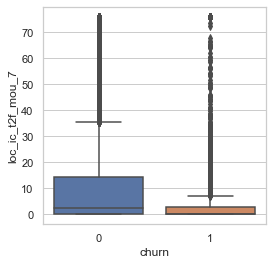

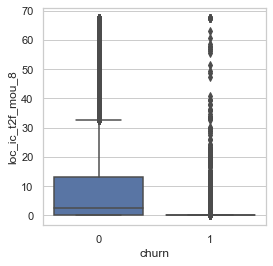

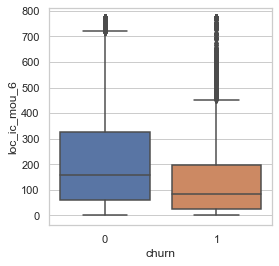

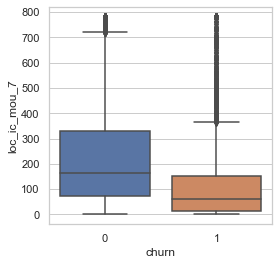

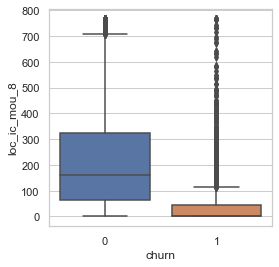

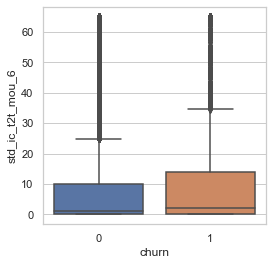

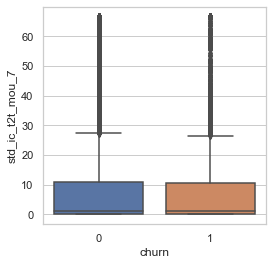

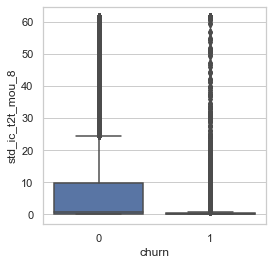

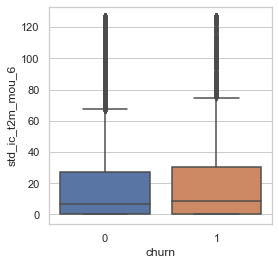

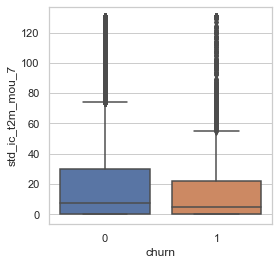

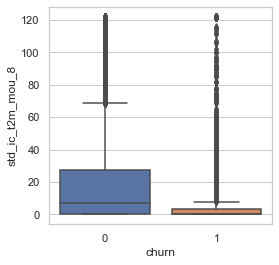

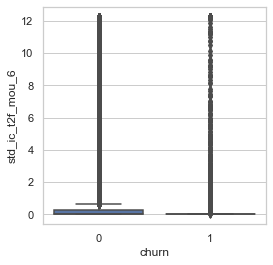

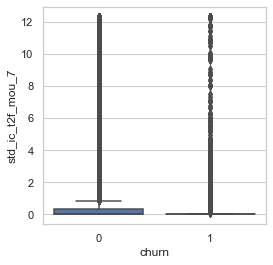

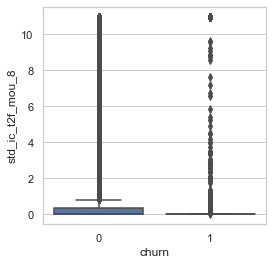

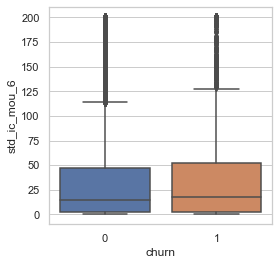

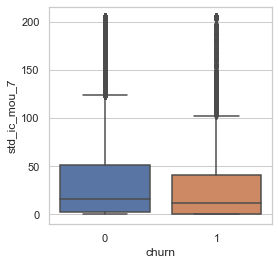

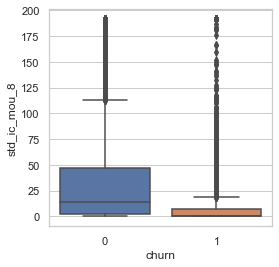

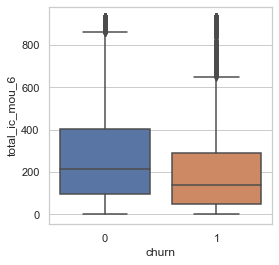

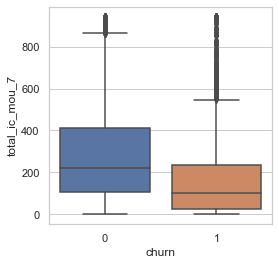

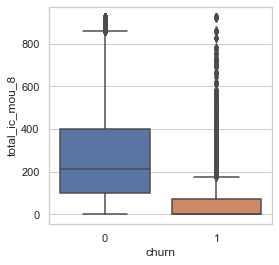

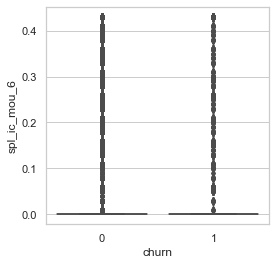

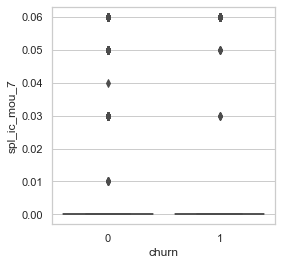

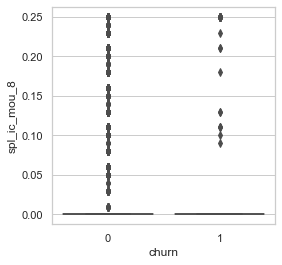

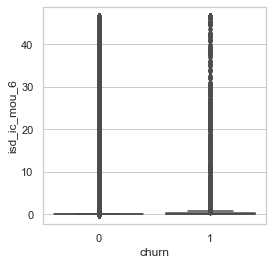

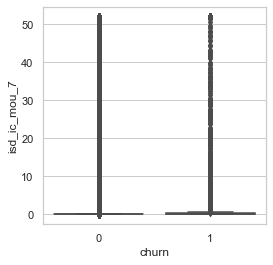

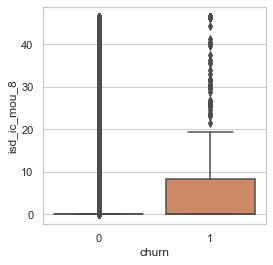

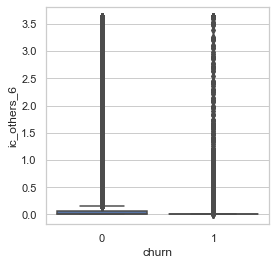

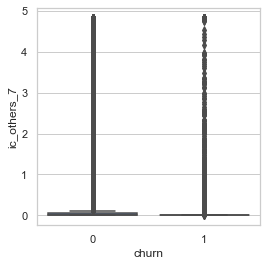

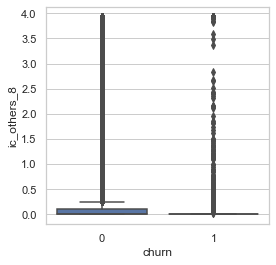

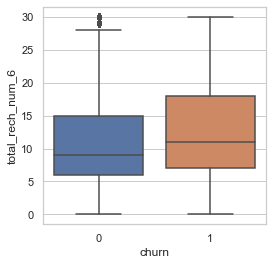

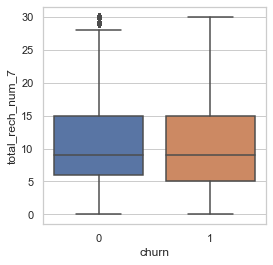

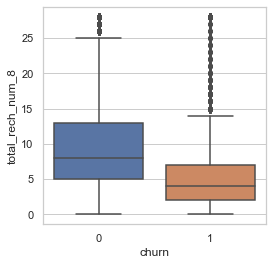

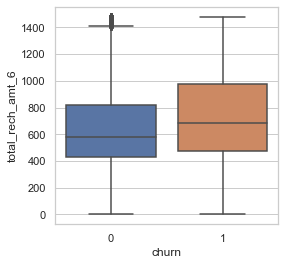

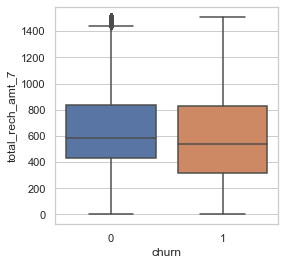

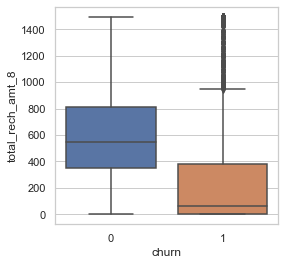

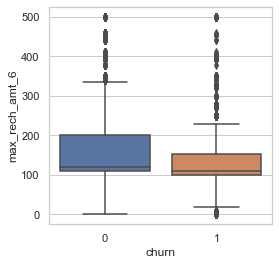

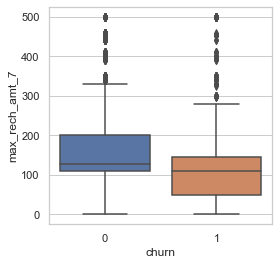

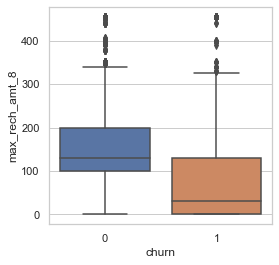

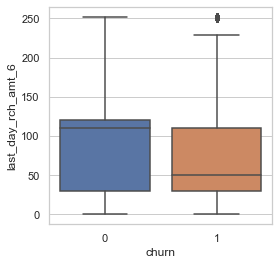

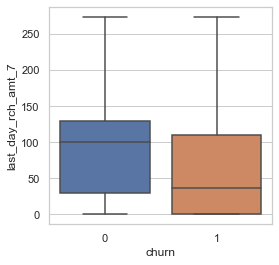

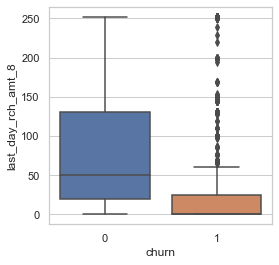

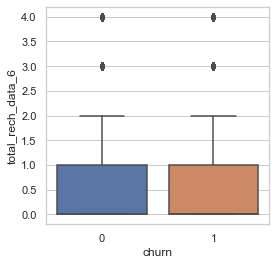

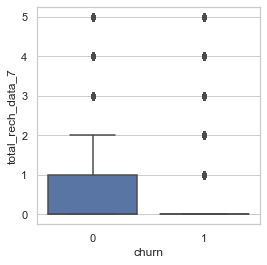

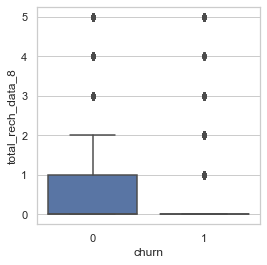

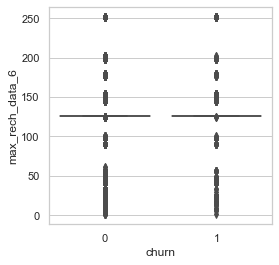

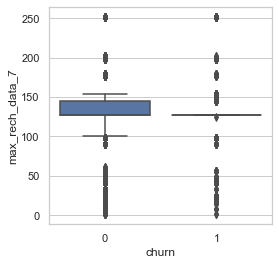

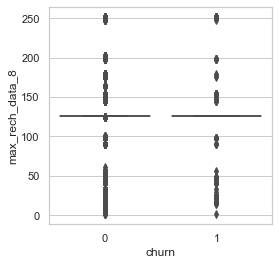

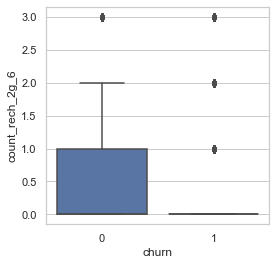

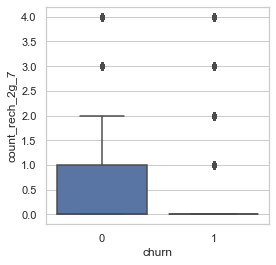

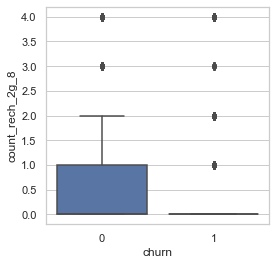

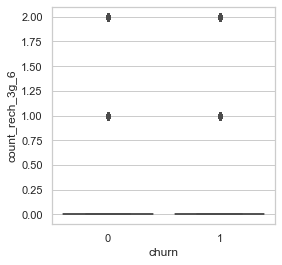

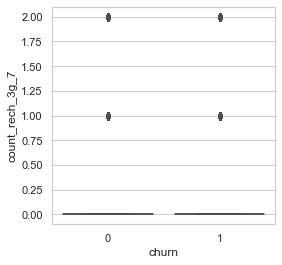

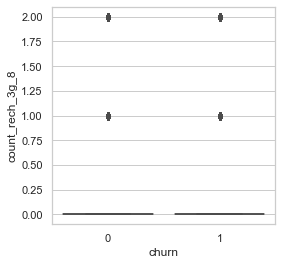

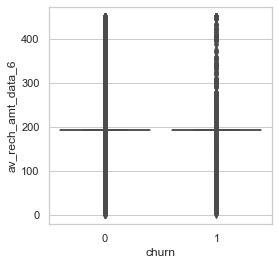

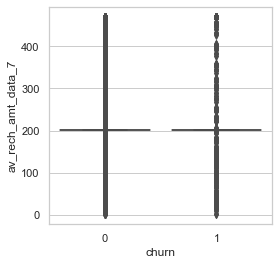

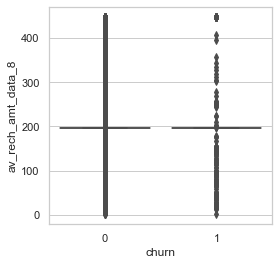

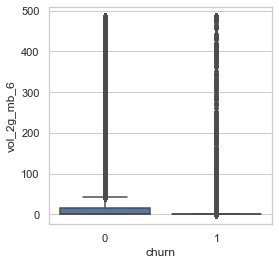

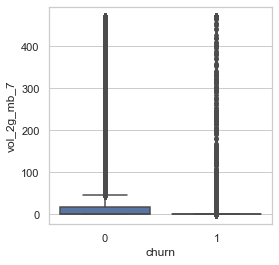

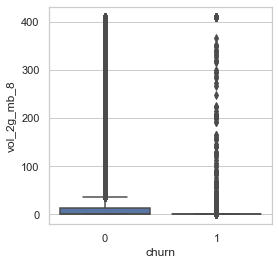

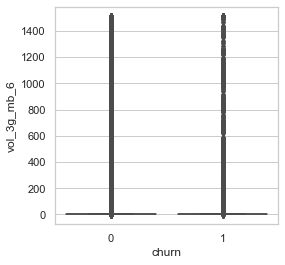

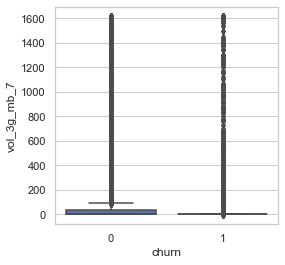

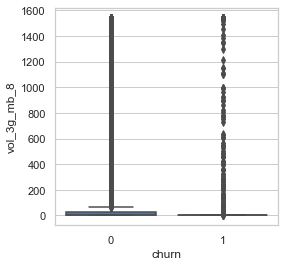

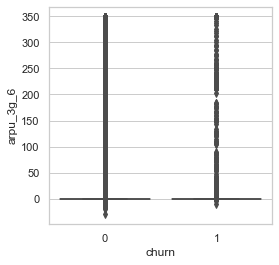

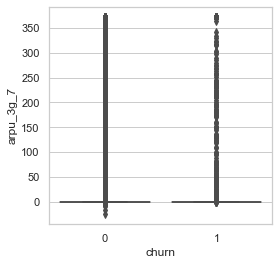

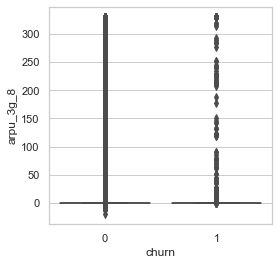

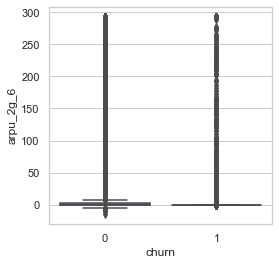

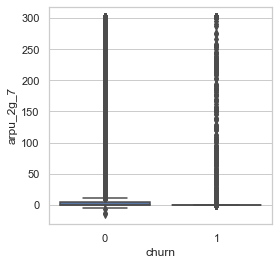

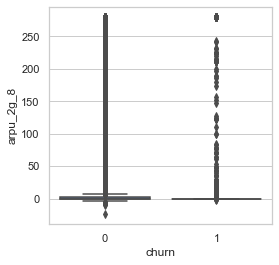

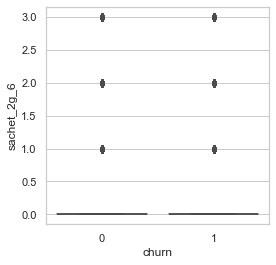

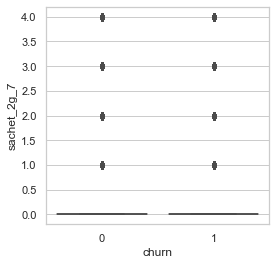

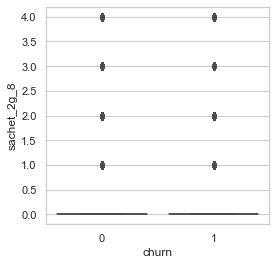

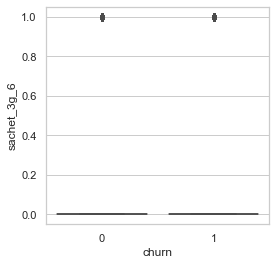

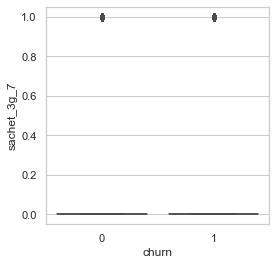

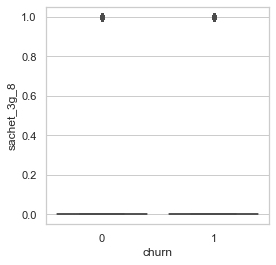

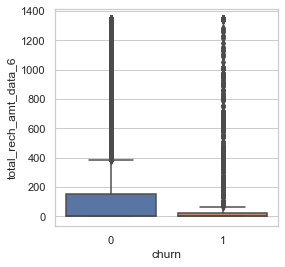

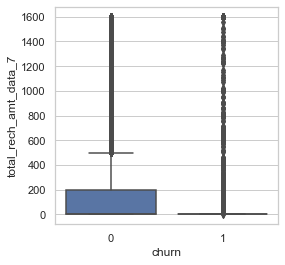

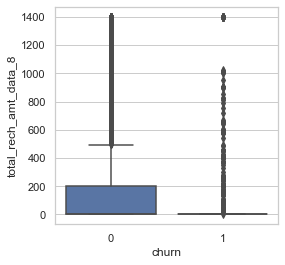

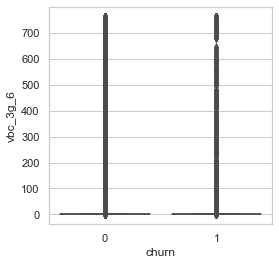

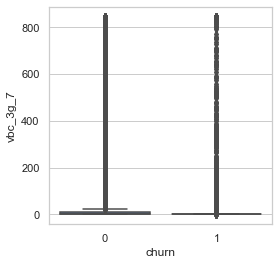

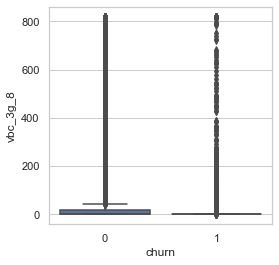

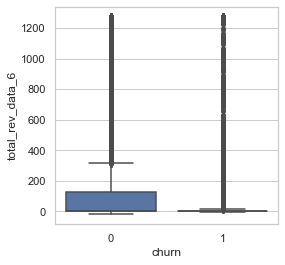

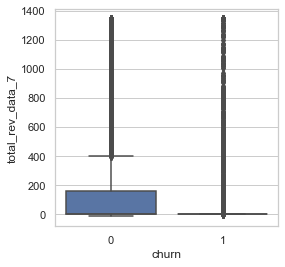

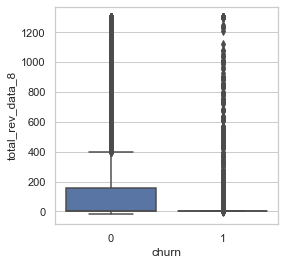

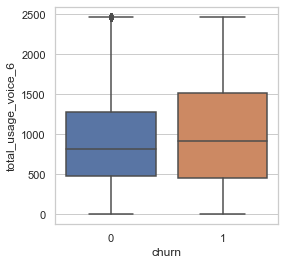

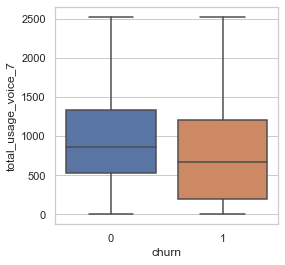

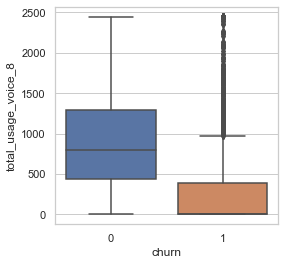

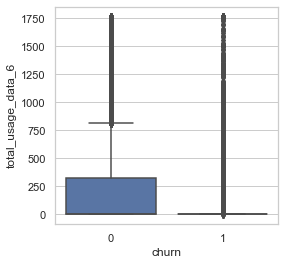

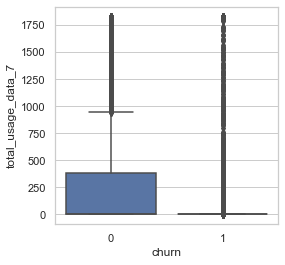

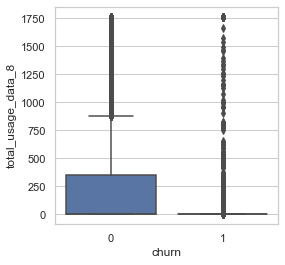

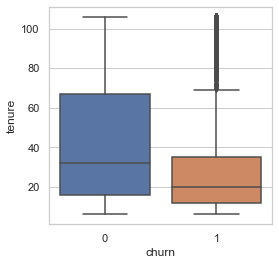

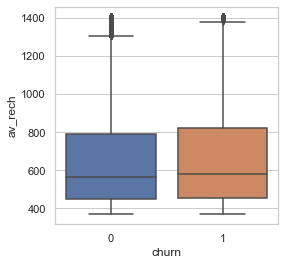

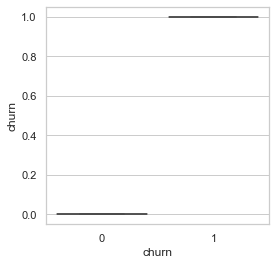

In [75]:
# Bivariate Analysis of Numerical Columns
for c in inp_data.columns:
    bivar_plot('churn',c)

#### Insights:
Bivariate Analysis clearly reveals that 
   - max_rech_data is related to churn
   - av_rech_amount is related to churn
   - aon is related to churn
   - total_usage_voice is related to churn
   - total_usage_data is realted to churn
   
But also the Value range of most of the variables are very low, i.e they have a very narrow range of frequency, therfore the plot is not showing proper justification result . So lets do analysis by checking mean value.

In [76]:
# Separating columns for analysis
mou_cols =  inp_data.columns[inp_data.columns.str.contains('total_og|total_ic')]
onnet_offnet_cols = inp_data.columns[inp_data.columns.str.contains('onnet|offnet')]
std_og_cols = inp_data.columns[inp_data.columns.str.contains('std_og')]
std_ic_cols = inp_data.columns[inp_data.columns.str.contains('std_ic')]
spl_isd_cols = inp_data.columns[inp_data.columns.str.contains('spl|isd')]
vol_cols =  inp_data.columns[inp_data.columns.str.contains('vol')]
arpu_cols = inp_data.columns[inp_data.columns.str.contains('arpu')]
vbc_cols = inp_data.columns[inp_data.columns.str.contains('vbc')]
tot_amt_recharge_cols =  inp_data.columns[inp_data.columns.str.contains('total_rech_amt')]
max_av_amt_recharge_cols =  inp_data.columns[inp_data.columns.str.contains('max_rech_amt|av_rech_amt')]
data_recharge_cols =  inp_data.columns[inp_data.columns.str.contains('total_rech_data|max_rech_data|av_rech_data')]
cnt_recharge_cols =  inp_data.columns[inp_data.columns.str.contains('count_rech')]
total_rev_data_cols =  inp_data.columns[inp_data.columns.str.contains('total_rev_data')]
total_usage_voice_cols =  inp_data.columns[inp_data.columns.str.contains('total_usage_voice')]
total_usage_data_cols =  inp_data.columns[inp_data.columns.str.contains('total_usage_data')]

In [77]:
# function for mean bar chart
def plot_mean_bar_chart(df,columns_list):
    df_0 = inp_data[inp_data.churn==0].filter(columns_list)
    df_1 = inp_data[inp_data.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)
    
    mean_bar.T.plot.bar( figsize=(20,10),rot=0)
    plt.show()
    
    return mean_bar

#### Average Revenue Per User columns

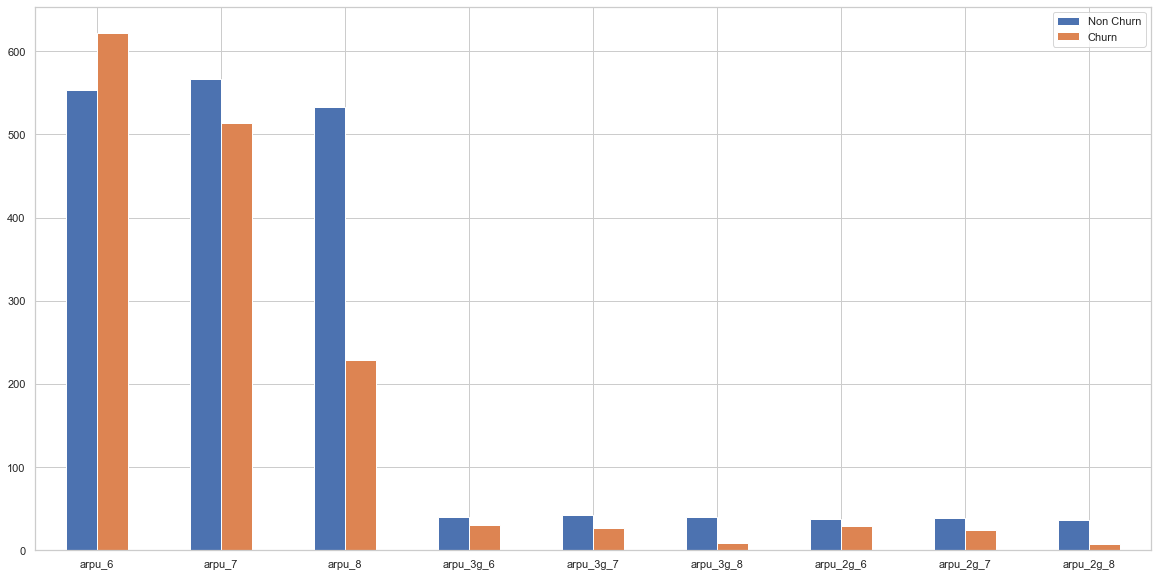

arpu_6               arpu_7               arpu_8  \
Non Churn               553.77               566.03               532.74   
Churn                   622.41               513.96               228.97   

                     arpu_3g_6            arpu_3g_7            arpu_3g_8  \
Non Churn                40.15                42.71                39.98   
Churn                    30.90                26.67                 8.81   

                     arpu_2g_6            arpu_2g_7            arpu_2g_8  
Non Churn                37.23                38.62                36.54  
Churn                    29.53                24.61                 8.12

In [78]:
plot_mean_bar_chart(inp_data, arpu_cols)

#### Insights:
We can see that huge drops for Arpu in 8th month for churned customers

#### Total Data revenue of the subscriber:

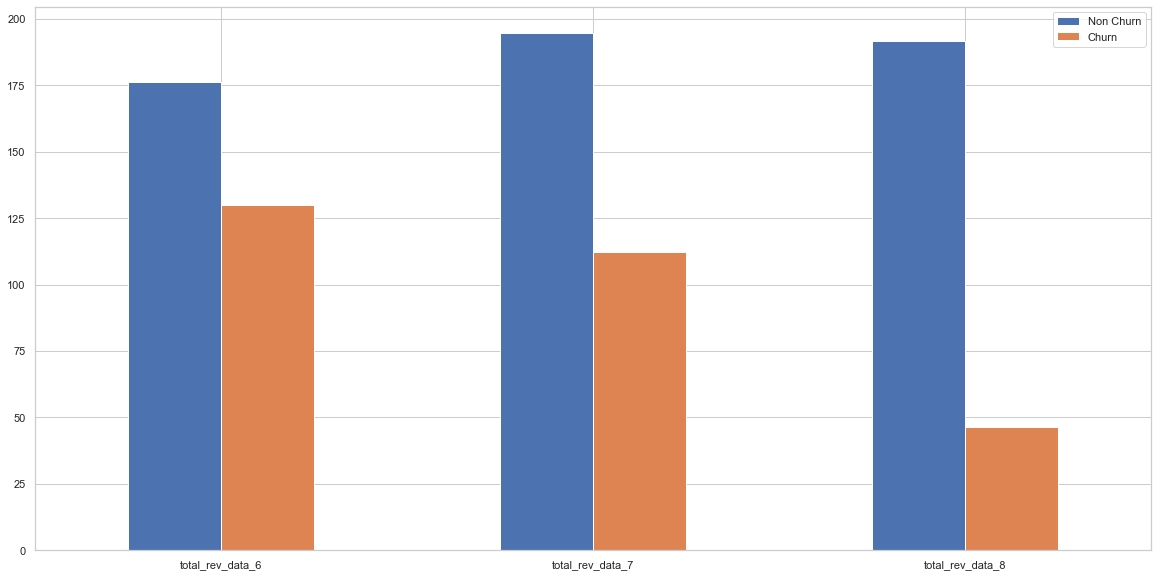

total_rev_data_6     total_rev_data_7     total_rev_data_8
Non Churn               176.25               194.80               191.65
Churn                   129.75               112.23                46.43

In [79]:
plot_mean_bar_chart(inp_data, total_rev_data_cols)

#### Insights:
We can see that huge drops for Total Data revenue of the subscriber in 8th month for churned customers

#### Total_usage_voice means total minutes of usage of voice

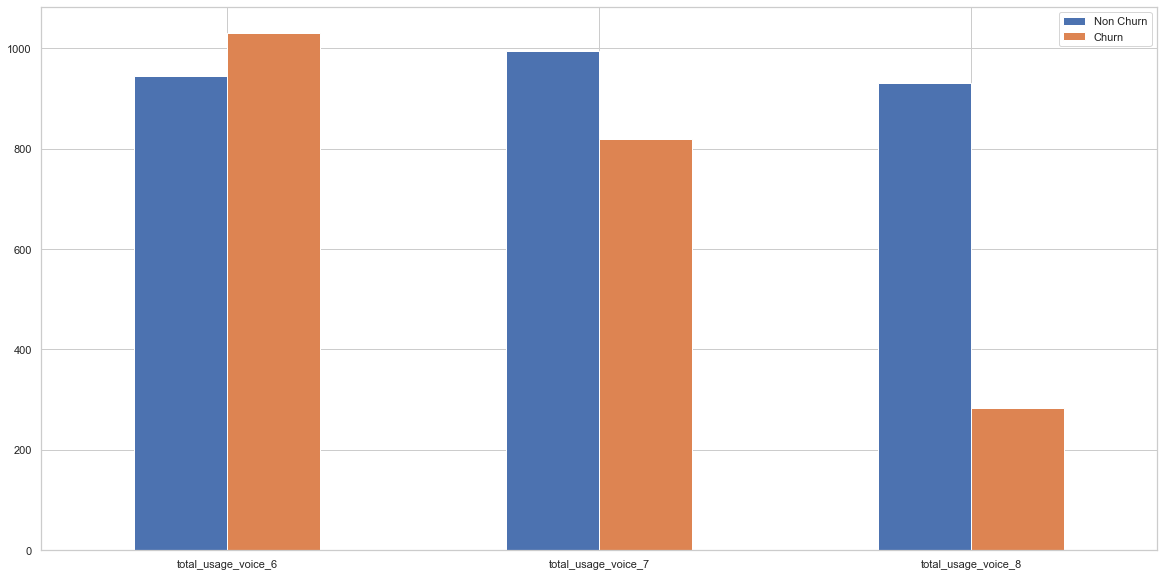

total_usage_voice_6  total_usage_voice_7  total_usage_voice_8
Non Churn               944.05               993.73               930.19
Churn                 1,031.04               819.19               283.97

In [80]:
plot_mean_bar_chart(inp_data, total_usage_voice_cols)

#### Insights:
We can see that huge drops for Total_usage_voice means total minutes of usage of voice in 8th month for churned customers

#### Total_usage_data means total volume (mb) of usage of data

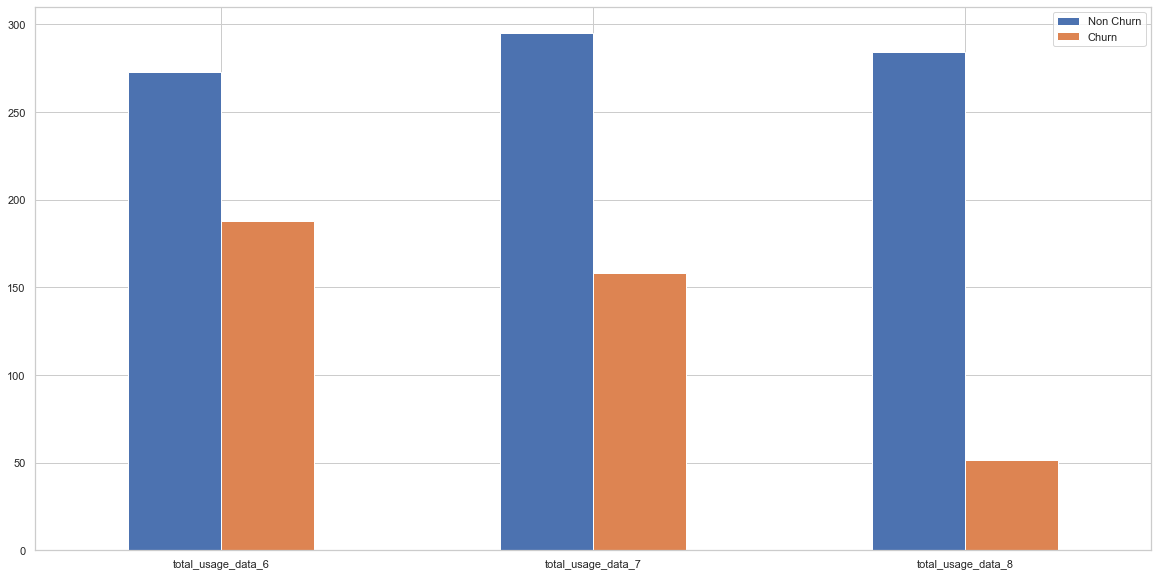

total_usage_data_6   total_usage_data_7   total_usage_data_8
Non Churn               273.05               295.38               284.43
Churn                   187.82               158.19                51.74

In [81]:
plot_mean_bar_chart(inp_data, total_usage_data_cols)

#### Insights:
We can see that huge drops for Total_usage_data means total volume (mb) of usage of data in 8th month for churned customers

#### vol_cols Voice and data usage columns

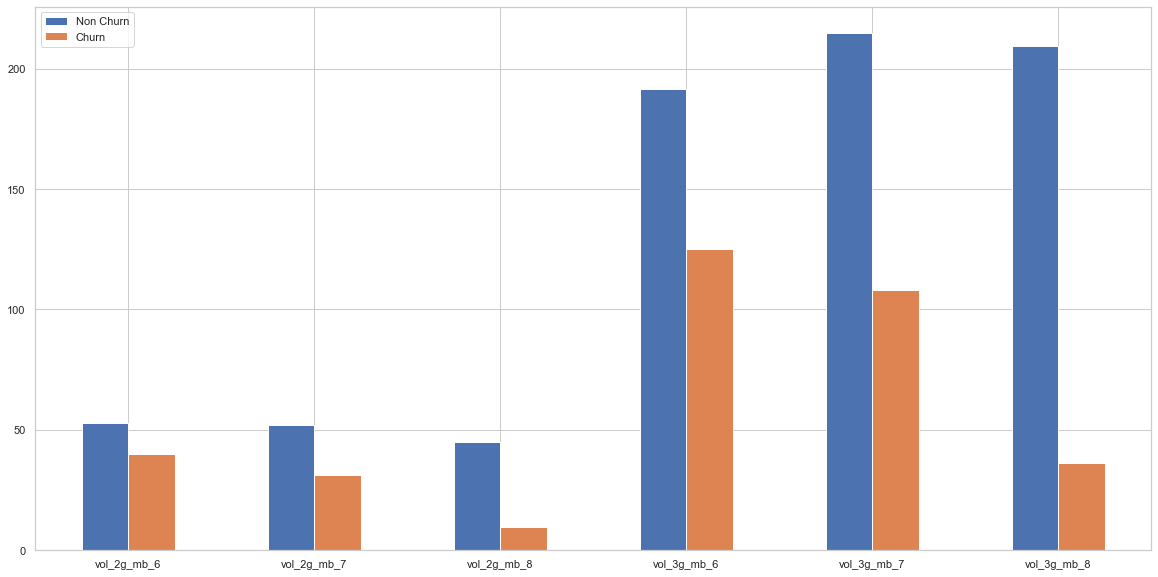

vol_2g_mb_6          vol_2g_mb_7          vol_2g_mb_8  \
Non Churn                53.03                51.85                44.90   
Churn                    40.05                31.39                 9.60   

                   vol_3g_mb_6          vol_3g_mb_7          vol_3g_mb_8  
Non Churn               191.51               214.96               209.44  
Churn                   124.97               107.89                36.38

In [82]:
plot_mean_bar_chart(inp_data, vol_cols)

#### Insights:
We can see that huge drops for vol in 8th month for churned customers

#### Volume based cost vbc_cols

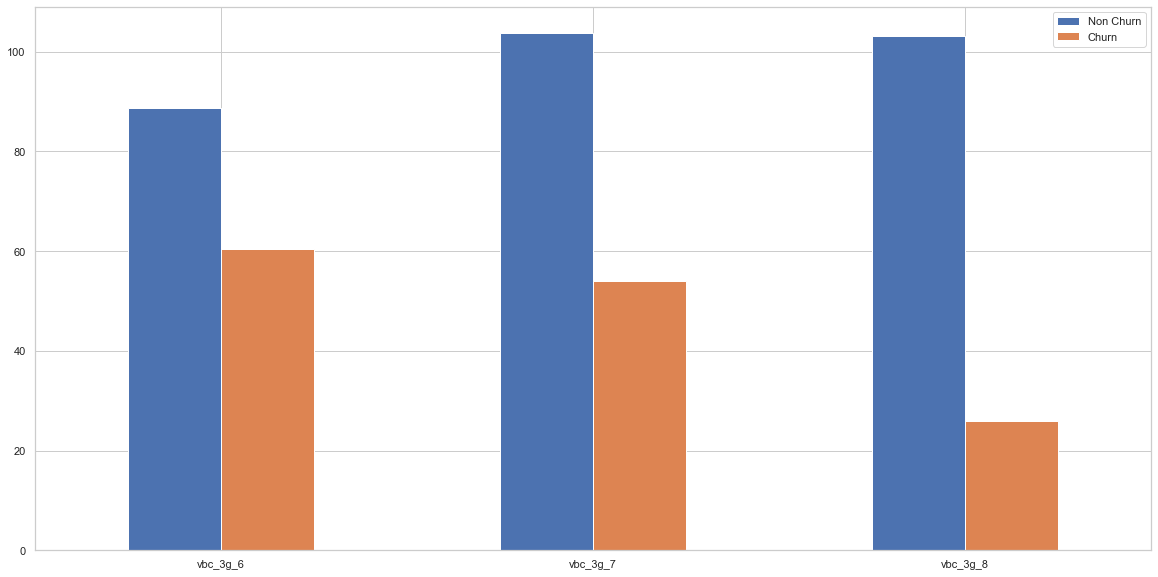

vbc_3g_6             vbc_3g_7             vbc_3g_8
Non Churn                88.65               103.84               103.19
Churn                    60.48                53.96                25.92

In [83]:
plot_mean_bar_chart(inp_data, vbc_cols)

#### Insights:
We can see that huge drops for vbc in 8th month for churned customers

####  Total Recharge amount cost

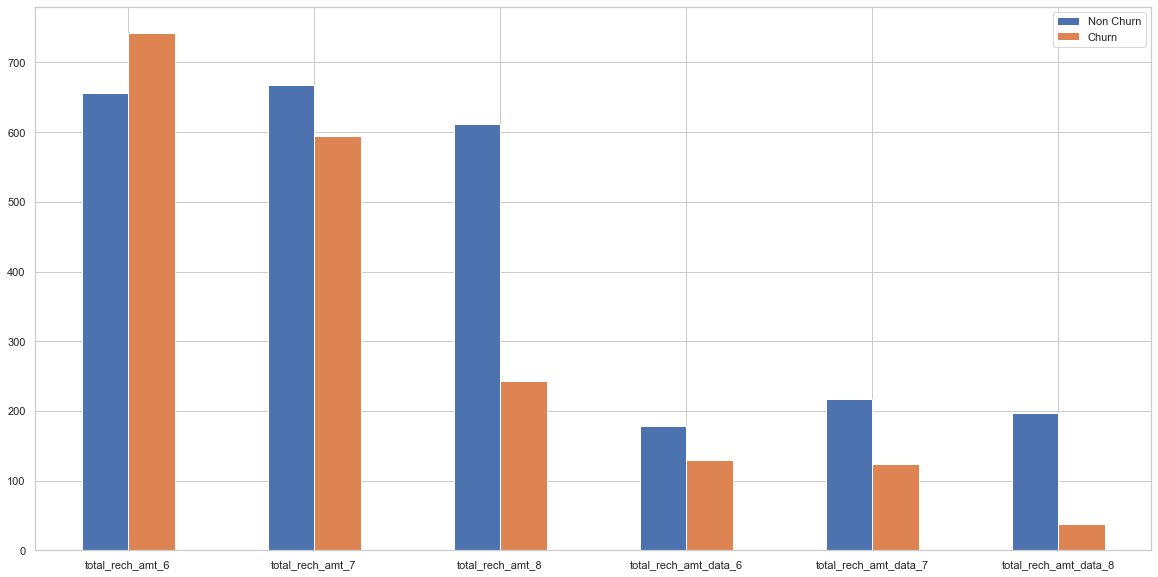

total_rech_amt_6     total_rech_amt_7     total_rech_amt_8  \
Non Churn               655.81               668.34               612.14   
Churn                   742.84               594.51               243.02   

           total_rech_amt_data_6  total_rech_amt_data_7  total_rech_amt_data_8  
Non Churn               178.83                 216.43                 196.49    
Churn                   130.04                 123.91                  37.03

In [84]:
plot_mean_bar_chart(inp_data, tot_amt_recharge_cols)

#### Max and Average Recharge amount cost

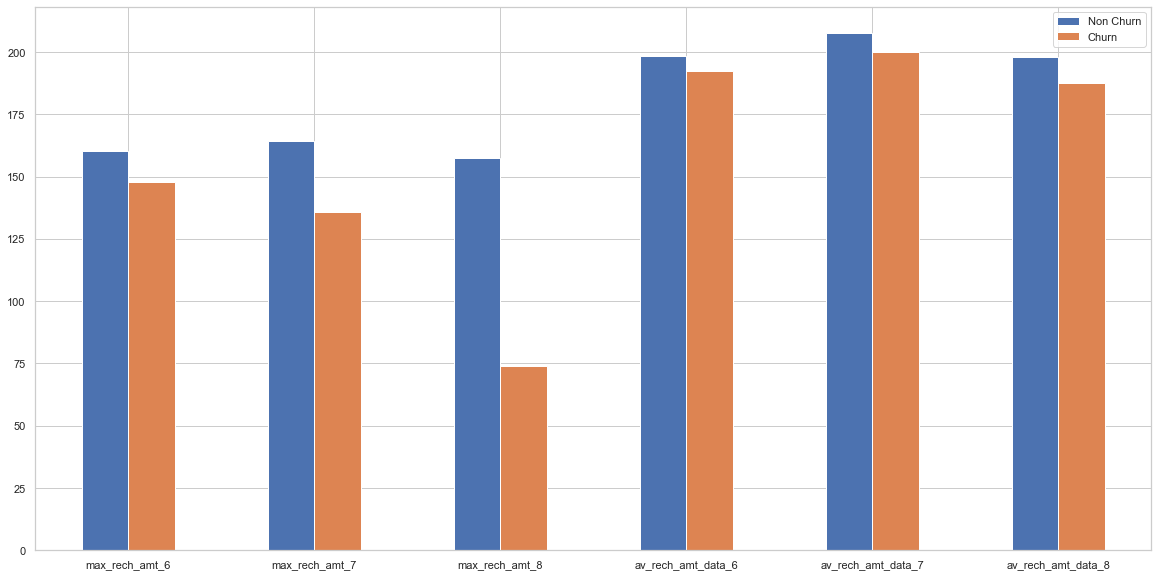

max_rech_amt_6       max_rech_amt_7       max_rech_amt_8  \
Non Churn               160.37               164.47               157.56   
Churn                   147.86               135.81                73.81   

            av_rech_amt_data_6   av_rech_amt_data_7   av_rech_amt_data_8  
Non Churn               198.54               207.81               198.21  
Churn                   192.36               200.02               187.74

In [85]:
plot_mean_bar_chart(inp_data, max_av_amt_recharge_cols)

#### Total data recharge columns tot_data_recharge_cols

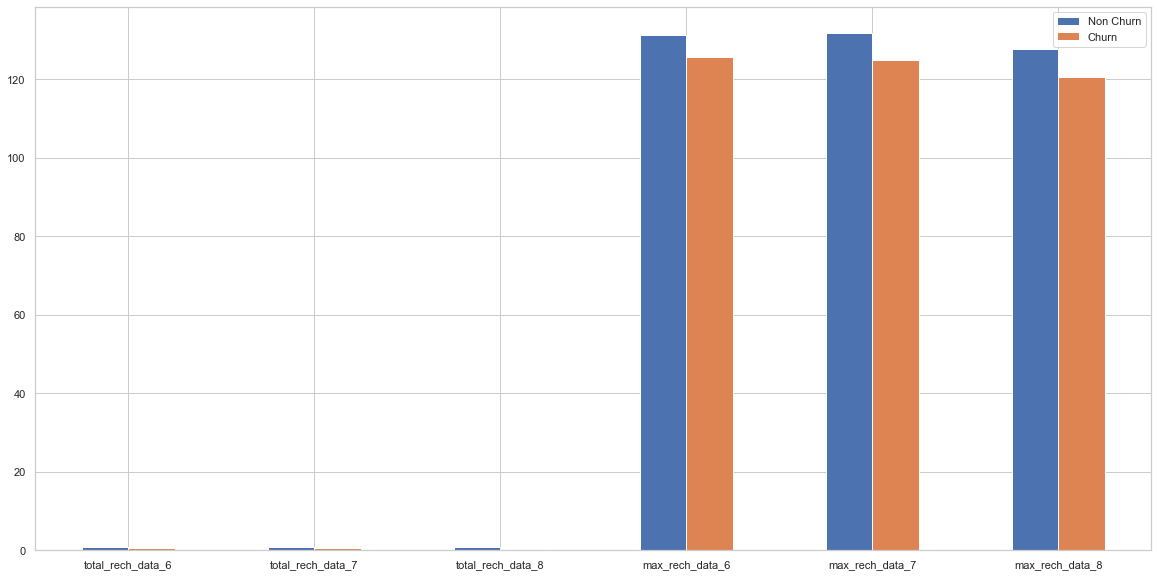

total_rech_data_6    total_rech_data_7    total_rech_data_8  \
Non Churn                 0.75                 0.88                 0.91   
Churn                     0.57                 0.55                 0.25   

               max_rech_data_6      max_rech_data_7      max_rech_data_8  
Non Churn               131.20               131.87               127.80  
Churn                   125.76               124.93               120.45

In [86]:
plot_mean_bar_chart(inp_data, data_recharge_cols)

#### Minutes of usage 

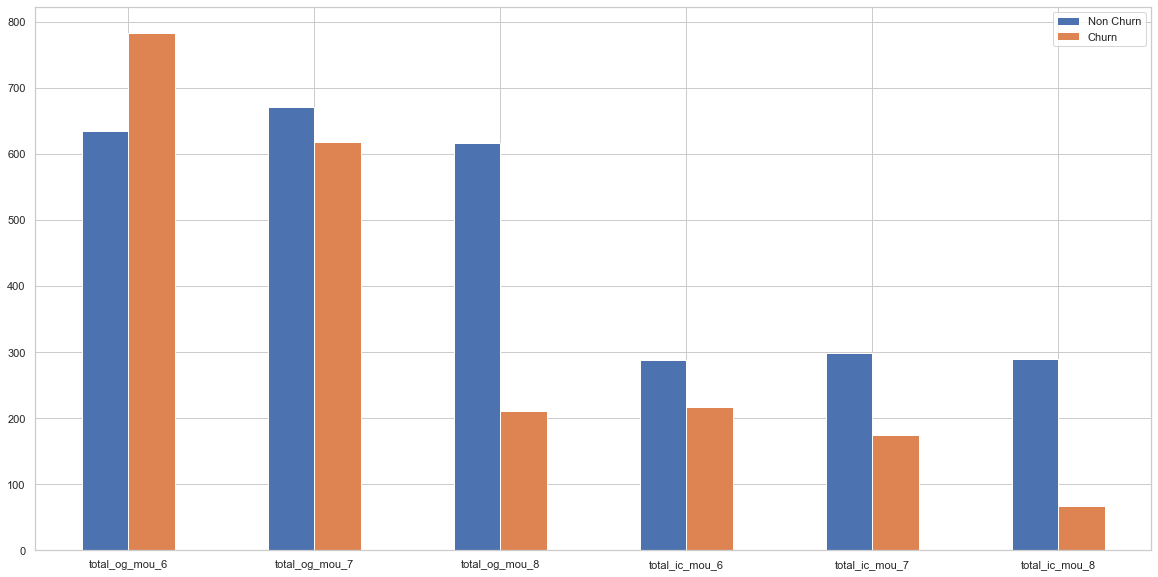

total_og_mou_6       total_og_mou_7       total_og_mou_8  \
Non Churn               633.99               670.63               616.08   
Churn                   783.37               618.31               211.36   

                total_ic_mou_6       total_ic_mou_7       total_ic_mou_8  
Non Churn               287.37               297.74               288.72  
Churn                   217.10               174.96                67.08

In [87]:
plot_mean_bar_chart(inp_data,mou_cols)

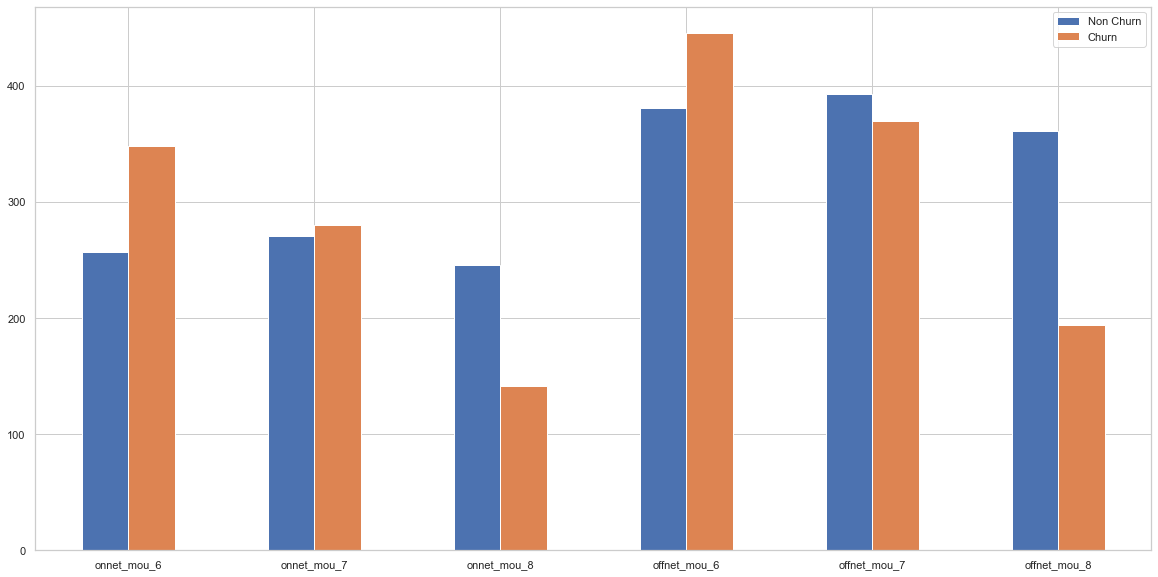

onnet_mou_6          onnet_mou_7          onnet_mou_8  \
Non Churn               256.61               270.94               245.34   
Churn                   347.82               280.16               141.84   

                  offnet_mou_6         offnet_mou_7         offnet_mou_8  
Non Churn               381.30               393.33               361.22  
Churn                   445.90               369.81               194.09

In [88]:
plot_mean_bar_chart(inp_data,onnet_offnet_cols)

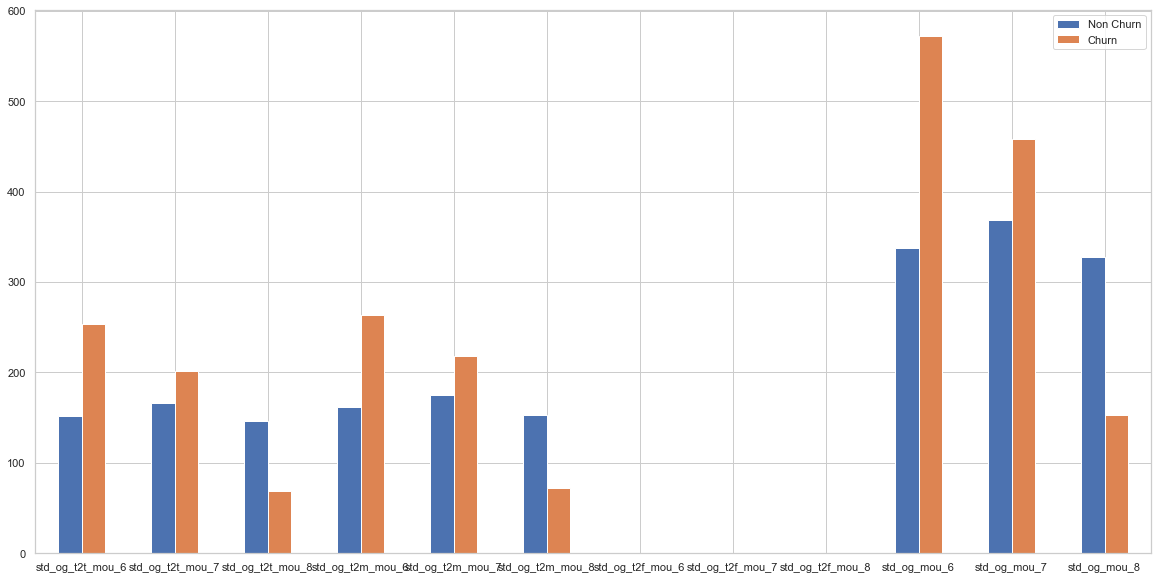

std_og_t2t_mou_6     std_og_t2t_mou_7     std_og_t2t_mou_8  \
Non Churn               151.70               166.51               146.66   
Churn                   253.30               201.62                68.42   

              std_og_t2m_mou_6     std_og_t2m_mou_7     std_og_t2m_mou_8  \
Non Churn               161.46               175.28               152.83   
Churn                   263.67               218.03                71.63   

              std_og_t2f_mou_6     std_og_t2f_mou_7     std_og_t2f_mou_8  \
Non Churn                 0.73                 0.71                 0.63   
Churn                     0.40                 0.37                 0.14   

                  std_og_mou_6         std_og_mou_7         std_og_mou_8  
Non Churn               337.07               368.02               327.82  
Churn                   572.54               457.87               152.87

In [89]:
plot_mean_bar_chart(inp_data,std_og_cols)

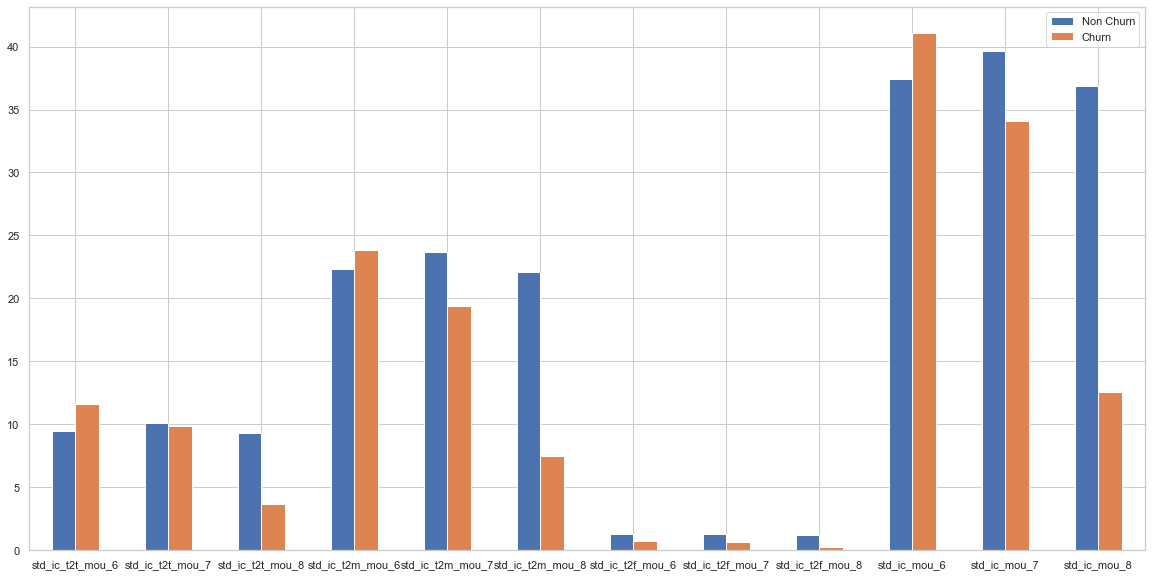

std_ic_t2t_mou_6     std_ic_t2t_mou_7     std_ic_t2t_mou_8  \
Non Churn                 9.47                10.12                 9.28   
Churn                    11.62                 9.86                 3.69   

              std_ic_t2m_mou_6     std_ic_t2m_mou_7     std_ic_t2m_mou_8  \
Non Churn                22.30                23.67                22.10   
Churn                    23.83                19.37                 7.45   

              std_ic_t2f_mou_6     std_ic_t2f_mou_7     std_ic_t2f_mou_8  \
Non Churn                 1.26                 1.31                 1.18   
Churn                     0.75                 0.69                 0.25   

                  std_ic_mou_6         std_ic_mou_7         std_ic_mou_8  
Non Churn                37.39                39.66                36.89  
Churn                    41.11                34.07                12.55

In [90]:
plot_mean_bar_chart(inp_data,std_ic_cols)

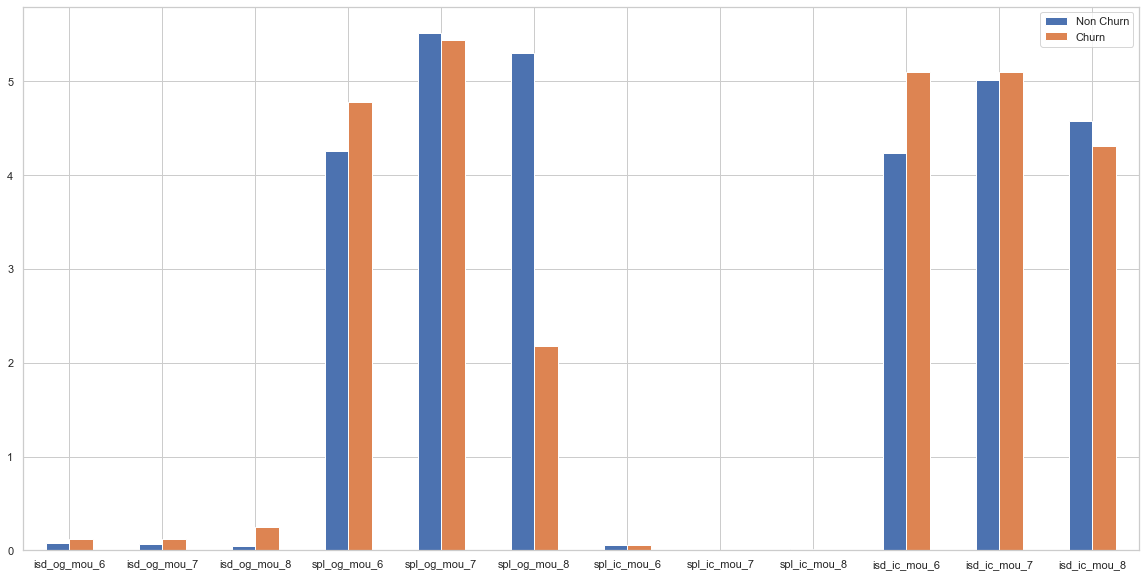

isd_og_mou_6         isd_og_mou_7         isd_og_mou_8  \
Non Churn                 0.08                 0.07                 0.05   
Churn                     0.12                 0.12                 0.25   

                  spl_og_mou_6         spl_og_mou_7         spl_og_mou_8  \
Non Churn                 4.26                 5.52                 5.31   
Churn                     4.78                 5.44                 2.18   

                  spl_ic_mou_6         spl_ic_mou_7         spl_ic_mou_8  \
Non Churn                 0.06                 0.00                 0.02   
Churn                     0.05                 0.00                 0.00   

                  isd_ic_mou_6         isd_ic_mou_7         isd_ic_mou_8  
Non Churn                 4.24                 5.02                 4.58  
Churn                     5.10                 5.10                 4.31

In [91]:
plot_mean_bar_chart(inp_data,spl_isd_cols)

#### Insights:
We can see that huge drops for all the Minute of usage columns  in 8th month for churned customers

#### Tenure ( derived from aon column)

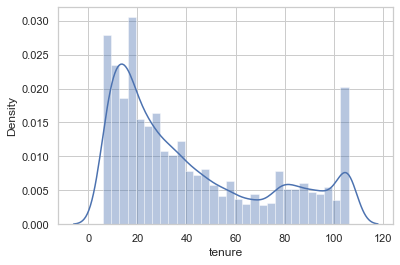

In [92]:
# Checking the distribution of he tenure variable

sns.distplot(inp_data['tenure'],bins=30)
plt.show()

In [93]:
t_range = [0, 6, 12, 24, 60, 61]
t_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churndata=pd.DataFrame(inp_data.loc[:,['churn','tenure']])
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   churn   30011 non-null  int64  
 1   tenure  30011 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [94]:
inp_data['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [95]:
churndata['tenure_range'] = pd.cut(churndata['tenure'], t_range, labels=t_label)
churndata['tenure_range'].head()

7     2-5 Yrs    
8     6-12 Months
13    NaN        
16    1-2 Yrs    
17    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

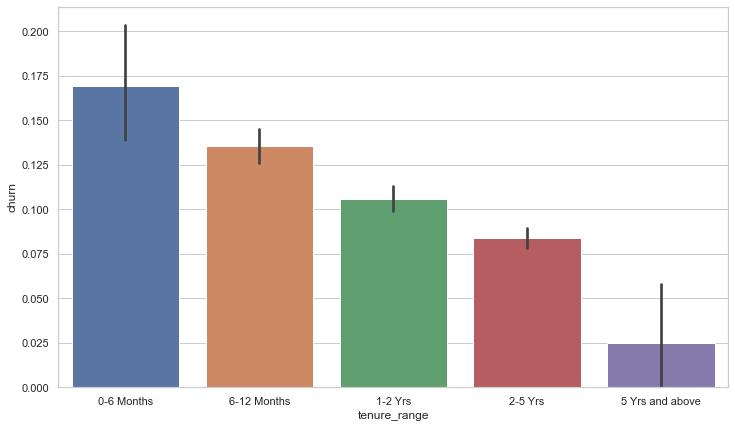

In [96]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churndata)
plt.show()

#### Insights:
- We can see from the plot that the It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

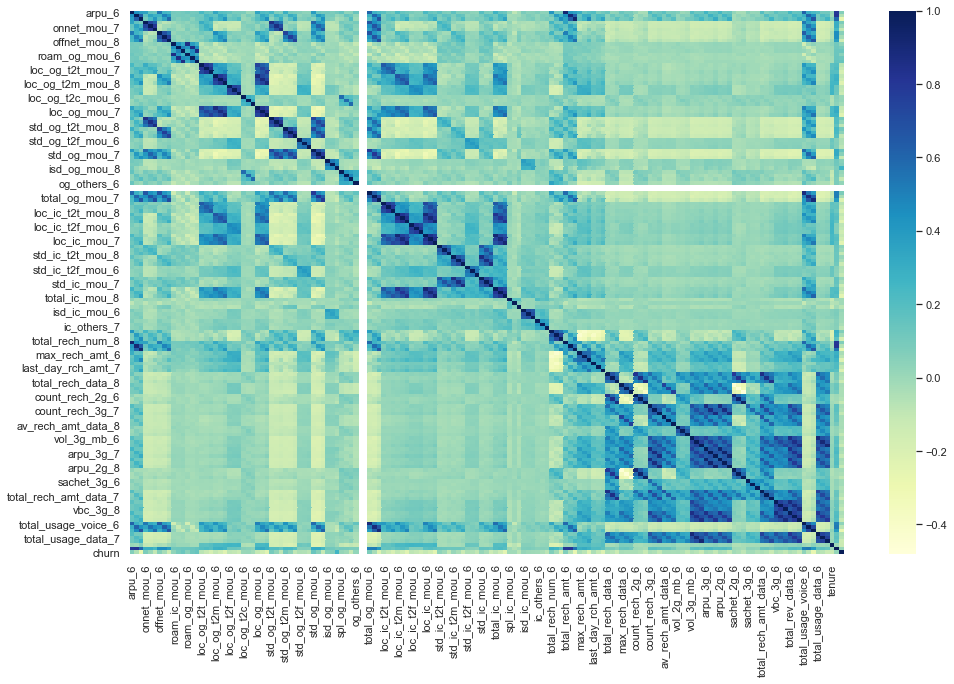

In [97]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(16, 10))
sns.heatmap(inp_data.corr(), cmap="YlGnBu",annot=False)
plt.show()

#### Insights:
- We can see the heatmap is condensed however we do have collinearity in data.
- Lets visualize the correlation beteen major columuns

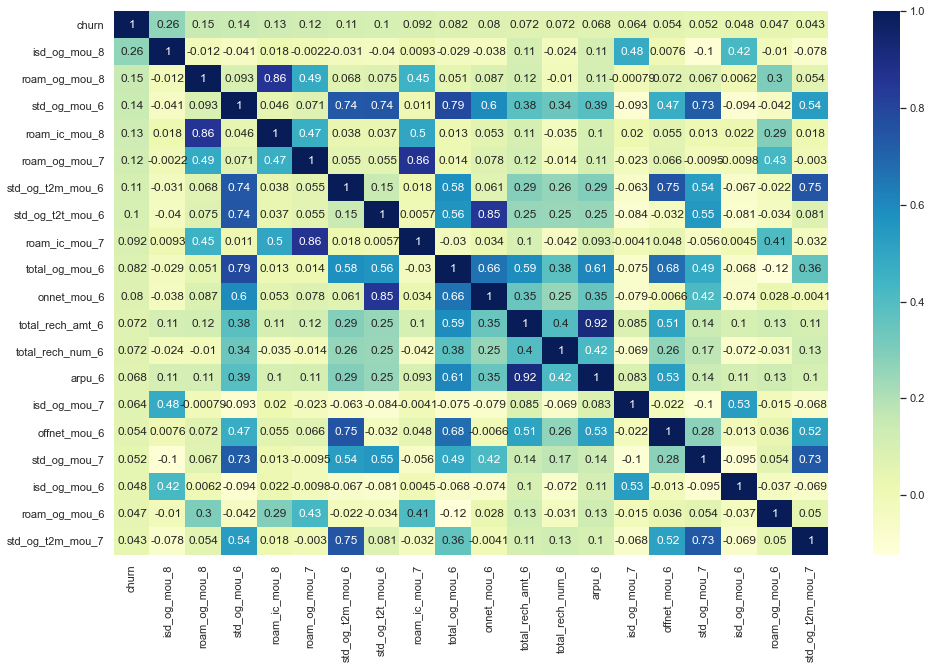

In [98]:
# Visualizing the correlation between major columns
# Let select the 20 rows having the largest values in column “churn”.
k = 20 #number of variables for heatmap
corrmat = inp_data.corr()
cols = corrmat.nlargest(k, 'churn')['churn'].index
plt.figure(figsize=(16, 10))
sns.heatmap(inp_data[cols].corr(), cmap="YlGnBu",annot=True)
plt.show()

#### Insights from the EDA:

- It is clear that there is a major class imbalance, and thus model built directly might be biased towards non-churn
- From the Univariate Analysis we can see that there are a lot of attributes which have very less variation i.e narrow band freqency.
- Bivariate Analysis clearly reveals that max_rech_data,av_rech_amount,aon,total_usage_voice and total_usage_data are realted to churn.
- From the bar chat it is clearly seen that there is a huge drops for all the recharge,MOU,total_usage_voice,total_usage_data columns in 8th month(Action Phase) for churned customers
- Also we can see from the tenure range plot that the It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.
- Heatmaps clearly reveals that A lot of columns are related (and we can see patterns in heatmap), hence multicollinearity exist



## <font color = Red> Step 7: Perform Train and Test split </font>

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# create another copy of the data for further analysis
inp_data_copy=inp_data.copy()
inp_data_copy.shape

(30011, 153)

In [101]:
df=inp_data.copy()
y = df.pop("churn")
X = df

In [102]:
inp_data['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [103]:
inp_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 153 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   arpu_6                 float64
 1   arpu_7                 float64
 2   arpu_8                 float64
 3   onnet_mou_6            float64
 4   onnet_mou_7            float64
 5   onnet_mou_8            float64
 6   offnet_mou_6           float64
 7   offnet_mou_7           float64
 8   offnet_mou_8           float64
 9   roam_ic_mou_6          float64
 10  roam_ic_mou_7          float64
 11  roam_ic_mou_8          float64
 12  roam_og_mou_6          float64
 13  roam_og_mou_7          float64
 14  roam_og_mou_8          float64
 15  loc_og_t2t_mou_6       float64
 16  loc_og_t2t_mou_7       float64
 17  loc_og_t2t_mou_8       float64
 18  loc_og_t2m_mou_6       float64
 19  loc_og_t2m_mou_7       float64
 20  loc_og_t2m_mou_8       float64
 21  loc_og_t2f_mou_6       float64
 22  loc_og_t2f_mou_7     

In [104]:
X.head()

arpu_6               arpu_7               arpu_8  \
7              1,069.18             1,261.42             1,258.56   
8                378.72               492.22               137.36   
13               492.85               205.67               593.26   
16               430.98               299.87               187.89   
17               690.01                18.98                25.50   

            onnet_mou_6          onnet_mou_7          onnet_mou_8  \
7                 57.84                54.68                52.29   
8                413.69               351.03                35.08   
13               501.76               108.39               534.24   
16                50.51                74.01                70.61   
17             1,153.97                 9.28                 7.79   

           offnet_mou_6         offnet_mou_7         offnet_mou_8  \
7                453.43               567.16               325.91   
8                 94.66                80.63               136.48   
13               413.31               119.28               482.46   
16               296.29               229.74               162.76   
17                61.64                 0.00                 5.54   

          roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
7                 16.23                33.49                31.64   
8                  0.00                 0.00                 0.00   
13                23.53                63.34                62.80   
16                 0.00                 2.83                 0.00   
17                 0.00                 4.76                 4.81   

          roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
7                 23.74                12.59                38.06   
8                  0.00                 0.00                 0.00   
13                 7.98                35.26                 1.44   
16                 0.00                17.74                 0.00   
17                 0.00                 8.46                13.34   

       loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
7                 51.39                31.38                40.28   
8                297.13               217.59                12.49   
13                49.63                 6.19                36.01   
16                42.61                65.16                67.38   
17                38.99                 0.00                 0.00   

       loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
7                308.63               447.38               162.28   
8                 80.96                70.58                50.54   
13               151.13                47.28               294.46   
16               273.29               145.99               128.28   
17                58.54                 0.00                 0.00   

       loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
7                 33.59                34.09                31.31   
8                  0.00                 0.00                 0.00   
13                 4.54                 0.00                23.51   
16                 0.00                 4.48                10.26   
17                 0.00                 0.00                 0.00   

       loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
7                  0.00                 0.00                 0.00   
8                  0.00                 0.00                 7.15   
13                 0.00                 0.00                 0.49   
16                 0.00                 0.00                 0.00   
17                 0.00                 0.00                 0.00   

           loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
7                422.16               533.91               255.79   
8                378.09               288.18                63.04   
13               205.31                53.48               353.99   
16    

In [105]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [106]:
print("X Train shape :",X_train.shape)
print("X Test shape :",X_test.shape)
print("y Train shape :",y_train.shape)
print("y Test shape :",y_test.shape)

X Train shape : (21007, 152)
X Test shape : (9004, 152)
y Train shape : (21007,)
y Test shape : (9004,)


In [107]:
y_train.head()

4715     0
15222    0
60145    0
62445    0
88349    0
Name: churn, dtype: int64

In [108]:
y_test.head()

29360    0
49979    0
90612    0
87007    0
91852    0
Name: churn, dtype: int64

In [109]:
pd.set_option('display.max_columns', None)
X_train.head()

arpu_6               arpu_7               arpu_8  \
4715                331.30               480.31               386.67   
15222               320.01               508.68               480.40   
60145               289.19               802.77               562.64   
62445               491.91               570.75               544.89   
88349               631.21               596.40               277.59   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
4715                336.33               564.78               424.11   
15222               110.08                27.54               131.03   
60145                26.19                83.34                84.73   
62445               177.03               419.24               108.21   
88349               118.18               239.38                63.86   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
4715                154.94                71.08                88.14   
15222               220.86               117.84               168.99   
60145               206.61               538.99               411.43   
62445               641.28               609.36               815.64   
88349               475.76               287.48               174.93   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
4715                  1.01                 3.26                 8.53   
15222               110.08                27.54               131.03   
60145                26.19                83.34                84.73   
62445               177.03               346.90               105.44   
88349                23.86                30.03                19.14   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
4715                  1.66                 1.93                 1.61   
15222               192.11                84.44               110.08   
60145               202.36               521.28               409.48   
62445               169.46               173.78               113.06   
88349               232.56               106.88                90.51   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                22.74                30.41                31.31   
60145                 4.25                 7.53                 1.56   
62445                 0.33                 0.00                 0.43   
88349                 0.00                 0.00                 9.73   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
4715                  8.69                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
4715                  2.68                 5.19    

In [110]:
X_test.head()

arpu_6               arpu_7               arpu_8  \
29360               856.42               335.10                -0.01   
49979               680.67               654.40               175.98   
90612               286.67               507.94               605.46   
87007               530.78               560.55               490.05   
91852               374.47               289.09               286.90   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
29360                21.64                34.04                 3.01   
49979             1,132.29             1,208.17               259.48   
90612                 4.84                 1.23                 3.96   
87007                11.54                23.94                12.09   
91852             1,153.97             1,208.17             1,115.66   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
29360             1,271.47               556.09                 5.16   
49979               449.13               336.58                71.29   
90612                20.79                21.56                35.21   
87007               271.58               385.68               207.39   
91852                17.64                 6.09                 1.55   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
29360                 0.00                 0.00                 0.00   
49979                 0.00                 0.51                 1.14   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
29360                 0.00                 0.00                 0.00   
49979                 0.00                 1.00                 4.29   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
29360                16.49                15.39                 1.76   
49979                47.94                36.04                37.31   
90612                 4.84                 1.23                 3.96   
87007                11.54                23.94                12.09   
91852               348.62               346.90               324.14   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
29360               115.44                66.66                 1.18   
49979                 5.43                24.69                 1.83   
90612                16.44                17.08                26.59   
87007               251.44               322.11               198.81   
91852                13.71                 5.76                 0.25   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
29360                 1.30                 4.03                 0.00   
49979                 0.00                 0.00                 0.00   
90612                 4.34                 4.48                 8.61   
87007                18.76                24.56                 8.19   
91852                 3.93                 0.00                 0.00   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
29360                 0.90                 0.00                 0.00   
49979                 1.86                 0.00                 0.00   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
29360               133.24                86.09    

## <font color = Red>  Step 8: Feature Scaling & Class Imbalance </font>

### <font color = Red>  Step 8.1: Feature Scaling </font>

#### Creating a dataframe with the actual Coversion flag and the predicted probabilities

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 4715 to 18628
Columns: 152 entries, arpu_6 to av_rech
dtypes: float64(152)
memory usage: 24.5 MB


In [112]:
# Faetures to be scaled stored in variable
allVar = X_train.columns
print(allVar)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rev_data_7', 'total_rev_data_8', 'total_usage_voice_6',
       'total_usage_voice_7', 'total_usage_voice_8', 'total_usage_data_6',
       'total_usage_data_7', 'total_usage_data_8', 'tenure', 'av_rech'],
      dtype='object', length=152)


In [113]:
from sklearn.preprocessing import MinMaxScaler

# We use minmax scaler
scaler = MinMaxScaler()

# Apply scaler
X_train[allVar]= scaler.fit_transform(X_train[allVar])

In [114]:
X_train.head()

arpu_6               arpu_7               arpu_8  \
4715                  0.74                 0.76                 0.60   
15222                 0.74                 0.77                 0.65   
60145                 0.73                 0.86                 0.68   
62445                 0.79                 0.79                 0.68   
88349                 0.83                 0.80                 0.55   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
4715                  0.29                 0.47                 0.38   
15222                 0.10                 0.02                 0.12   
60145                 0.02                 0.07                 0.08   
62445                 0.15                 0.35                 0.10   
88349                 0.10                 0.20                 0.06   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
4715                  0.12                 0.06                 0.07   
15222                 0.17                 0.09                 0.14   
60145                 0.16                 0.42                 0.35   
62445                 0.50                 0.47                 0.69   
88349                 0.37                 0.22                 0.15   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
4715                  0.00                 0.01                 0.03   
15222                 0.32                 0.08                 0.40   
60145                 0.08                 0.24                 0.26   
62445                 0.51                 1.00                 0.33   
88349                 0.07                 0.09                 0.06   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.31                 0.14                 0.19   
60145                 0.33                 0.86                 0.70   
62445                 0.28                 0.29                 0.19   
88349                 0.38                 0.18                 0.15   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
4715                  0.00                 0.00                 0.00   
15222                 0.68                 0.89                 1.00   
60145                 0.13                 0.22                 0.05   
62445                 0.01                 0.00                 0.01   
88349                 0.00                 0.00                 0.31   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
4715                  1.00                 0.00                 0.00   
15222                 0.00                 0.00                 0.00   
60145                 0.00                 0.00                 0.00   
62445                 0.00                 0.00                 0.00   
88349                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
4715                  0.00                 0.01    

In [115]:
# Feature scaling in Test data 
X_test[allVar]= scaler.transform(X_test[allVar])
X_test.head()

arpu_6               arpu_7               arpu_8  \
29360                 0.89                 0.72                 0.43   
49979                 0.84                 0.81                 0.51   
90612                 0.73                 0.77                 0.70   
87007                 0.80                 0.79                 0.65   
91852                 0.75                 0.70                 0.56   

               onnet_mou_6          onnet_mou_7          onnet_mou_8  \
29360                 0.02                 0.03                 0.00   
49979                 0.98                 1.00                 0.23   
90612                 0.00                 0.00                 0.00   
87007                 0.01                 0.02                 0.01   
91852                 1.00                 1.00                 1.00   

              offnet_mou_6         offnet_mou_7         offnet_mou_8  \
29360                 1.00                 0.43                 0.00   
49979                 0.35                 0.26                 0.06   
90612                 0.02                 0.02                 0.03   
87007                 0.21                 0.30                 0.17   
91852                 0.01                 0.00                 0.00   

             roam_ic_mou_6        roam_ic_mou_7        roam_ic_mou_8  \
29360                 0.00                 0.00                 0.00   
49979                 0.00                 0.01                 0.02   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

             roam_og_mou_6        roam_og_mou_7        roam_og_mou_8  \
29360                 0.00                 0.00                 0.00   
49979                 0.00                 0.01                 0.04   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

          loc_og_t2t_mou_6     loc_og_t2t_mou_7     loc_og_t2t_mou_8  \
29360                 0.05                 0.04                 0.01   
49979                 0.14                 0.10                 0.12   
90612                 0.01                 0.00                 0.01   
87007                 0.03                 0.07                 0.04   
91852                 1.00                 1.00                 1.00   

          loc_og_t2m_mou_6     loc_og_t2m_mou_7     loc_og_t2m_mou_8  \
29360                 0.19                 0.11                 0.00   
49979                 0.01                 0.04                 0.00   
90612                 0.03                 0.03                 0.05   
87007                 0.41                 0.53                 0.34   
91852                 0.02                 0.01                 0.00   

          loc_og_t2f_mou_6     loc_og_t2f_mou_7     loc_og_t2f_mou_8  \
29360                 0.04                 0.12                 0.00   
49979                 0.00                 0.00                 0.00   
90612                 0.13                 0.13                 0.27   
87007                 0.56                 0.72                 0.26   
91852                 0.12                 0.00                 0.00   

          loc_og_t2c_mou_6     loc_og_t2c_mou_7     loc_og_t2c_mou_8  \
29360                 0.10                 0.00                 0.00   
49979                 0.21                 0.00                 0.00   
90612                 0.00                 0.00                 0.00   
87007                 0.00                 0.00                 0.00   
91852                 0.00                 0.00                 0.00   

              loc_og_mou_6         loc_og_mou_7         loc_og_mou_8  \
29360                 0.14                 0.09    

In [116]:
# Copy the train and test to another data set for scenario analsysis
#X_train_copy = X_train.copy()
#X_test_copy = X_test.copy()

###  <font color = Red>  Step 8.2: Class imbalance </font>

In [117]:
# Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

# Checking class imbalance across the splitted dataframes
print(y_train.describe())
print(y_test.describe())

count              21,007.00
mean                    0.09
std                     0.28
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     1.00
Name: churn, dtype: float64
count               9,004.00
mean                    0.09
std                     0.28
min                     0.00
25%                     0.00
50%                     0.00
75%                     0.00
max                     1.00
Name: churn, dtype: float64


In [118]:
# Separate majority and minority classes
majority = inp_data[inp_data.churn==0]
minority = inp_data[inp_data.churn==1]
print('Shape of majority Class: {}'.format(majority.shape))
print('Shape of minority Class: {}'.format(minority.shape))


Shape of majority Class: (27418, 153)
Shape of minority Class: (2593, 153)


In [119]:
# for Class imbalance of Train data
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)

X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_smt.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smt.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smt==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smt==0)))


After OverSampling, the shape of train_X: (38368, 152)
After OverSampling, the shape of train_y: (38368,) 

After OverSampling, counts of label '1': 19184
After OverSampling, counts of label '0': 19184


In [120]:
X_train=X_train_smt.copy()
y_train=y_train_smt.copy()

In [121]:
X_train.shape

(38368, 152)

In [122]:
y_train.shape

(38368,)

In [123]:
X_test.shape

(9004, 152)

In [124]:
y_test.shape

(9004,)

In [125]:
# SMOTE Imbalance handling is not reqired to be perform on test data.

## <font color = Red>  Step 9: Perform PCA on the data </font>

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [126]:
from sklearn.decomposition import PCA

In [127]:
# ?PCA

In [128]:
pca = PCA(random_state=42)

In [129]:
pca.fit(X_train)

PCA(random_state=42)

In [130]:
#### Components from the PCA

In [131]:
pca.components_

array([[ 6.87641810e-03,  2.16466736e-02,  5.97926649e-02, ...,
         1.43187651e-01,  7.18006605e-02,  5.08871024e-02],
       [ 1.58300474e-02,  3.64995763e-02,  7.12352494e-02, ...,
        -5.60559412e-02,  4.65218697e-02,  9.60433110e-02],
       [ 2.43710331e-02,  4.90279711e-02,  6.02309520e-02, ...,
         9.03301083e-02, -9.50690200e-02,  1.34862210e-01],
       ...,
       [-1.19455035e-02,  1.27493111e-02,  5.44506537e-03, ...,
        -1.32594251e-03, -1.77413918e-04,  6.54519832e-03],
       [-0.00000000e+00,  2.97443072e-16, -3.97271665e-16, ...,
         3.20135247e-16, -2.89469450e-17, -3.76301783e-16],
       [ 0.00000000e+00, -6.00419415e-17,  8.76446237e-17, ...,
         9.56350850e-17,  3.45751975e-17,  1.46600595e-17]])

Looking at the explained variance ratio for each component

In [132]:
pca.explained_variance_ratio_

array([1.50096179e-01, 1.18484679e-01, 7.75354844e-02, 5.47317719e-02,
       4.46048711e-02, 3.90472956e-02, 3.68469701e-02, 3.13802081e-02,
       2.39173565e-02, 2.00206777e-02, 1.89705252e-02, 1.81397664e-02,
       1.71921816e-02, 1.40065394e-02, 1.30314168e-02, 1.23414398e-02,
       1.17912340e-02, 1.15214183e-02, 1.09064625e-02, 9.94536000e-03,
       9.60433489e-03, 9.11118076e-03, 9.06221392e-03, 8.90451494e-03,
       7.97586192e-03, 7.53623717e-03, 7.04909975e-03, 6.90665936e-03,
       6.67189000e-03, 6.31761136e-03, 6.25187407e-03, 6.05551424e-03,
       5.90477541e-03, 5.82904848e-03, 5.73514834e-03, 5.63364529e-03,
       5.46458506e-03, 5.21124734e-03, 5.03902436e-03, 4.79789272e-03,
       4.77460263e-03, 4.40799941e-03, 3.95699989e-03, 3.90153475e-03,
       3.74448876e-03, 3.72111750e-03, 3.55663017e-03, 3.44684734e-03,
       3.31080978e-03, 3.25182290e-03, 3.23184705e-03, 3.03662164e-03,
       2.89237900e-03, 2.86756610e-03, 2.83890828e-03, 2.73038604e-03,
      

### <font color = Red>  Step 9.1: Making a scree plot for the explained variance  </font>

In [133]:
# Create cumulative data for explained variance for all PCAs
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.15009618, 0.26858086, 0.34611634, 0.40084811, 0.44545298,
       0.48450028, 0.52134725, 0.55272746, 0.57664481, 0.59666549,
       0.61563602, 0.63377578, 0.65096797, 0.66497451, 0.67800592,
       0.69034736, 0.7021386 , 0.71366001, 0.72456648, 0.73451184,
       0.74411617, 0.75322735, 0.76228957, 0.77119408, 0.77916994,
       0.78670618, 0.79375528, 0.80066194, 0.80733383, 0.81365144,
       0.81990331, 0.82595883, 0.8318636 , 0.83769265, 0.8434278 ,
       0.84906145, 0.85452603, 0.85973728, 0.8647763 , 0.8695742 ,
       0.8743488 , 0.8787568 , 0.8827138 , 0.88661533, 0.89035982,
       0.89408094, 0.89763757, 0.90108442, 0.90439523, 0.90764705,
       0.9108789 , 0.91391552, 0.9168079 , 0.91967546, 0.92251437,
       0.92524476, 0.927915  , 0.93047298, 0.93300217, 0.93535579,
       0.93761272, 0.93981514, 0.94194975, 0.9440573 , 0.94607273,
       0.94805596, 0.95002015, 0.95192987, 0.9537959 , 0.95562545,
       0.95742401, 0.95914192, 0.96085427, 0.9625089 , 0.96409

### <font color = Red>  Step 9.2: Scree plot for PCAs created  </font>

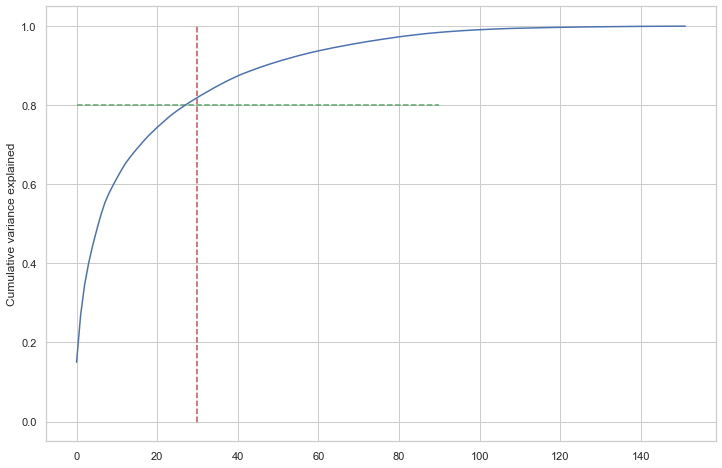

In [134]:
# Plot the Cumulative Graph
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.80, xmax=90, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### <font color = Red>  Step 9.3: Perform PCA with selected components based on Scree plot </font>

In [135]:
from sklearn.decomposition import IncrementalPCA

In [136]:
# 30 components were chosen based on Scree plot
pca_final = IncrementalPCA(n_components=30)

In [137]:
df_train_pca = pca_final.fit_transform(X_train)

In [138]:
df_train_pca.shape

(38368, 30)

In [139]:
df_train_pca.shape

(38368, 30)

In [140]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [141]:
corrmat.shape

(30, 30)

### <font color = Red>  Step 9.3: Plotting the heatmap of the corr matrix of PCAs selected </font>

<AxesSubplot:>

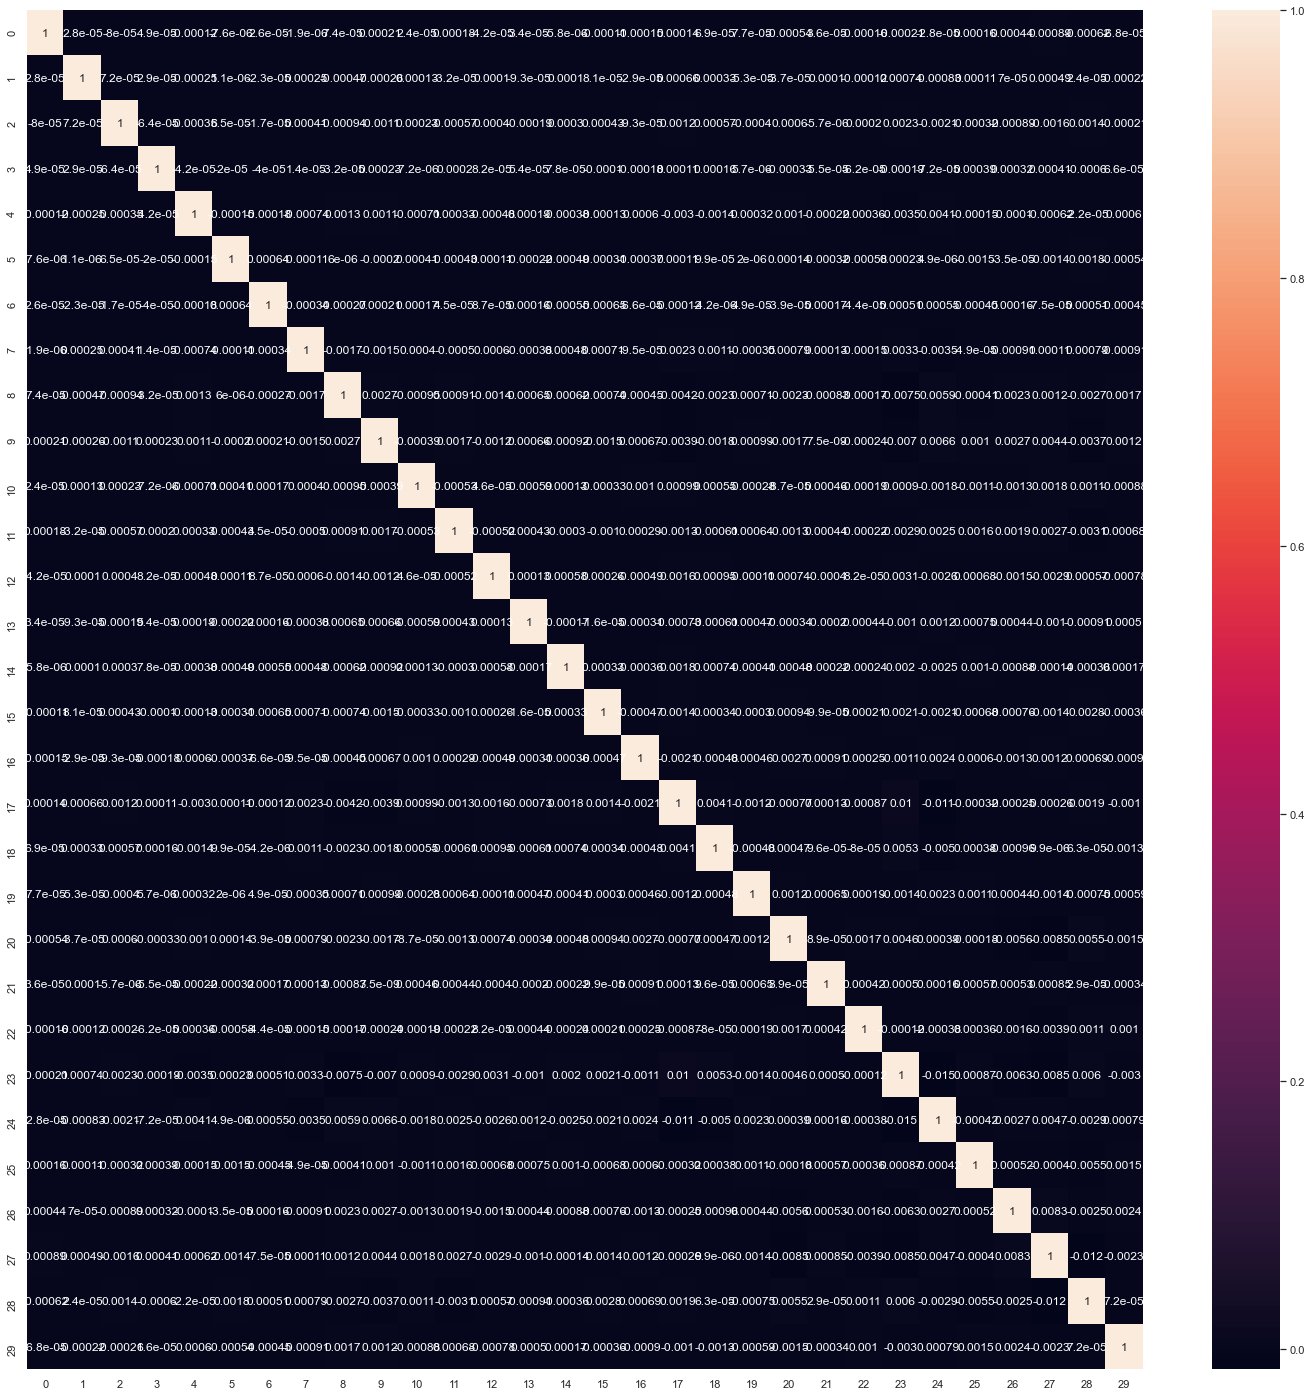

In [142]:
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

### <font color = Red>  Step 9.4: Applying the transformation on the test set </font>

In [143]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 30)

## <font color = Red>  Step 10: Applying logistic regression on the data on our Principal components </font>

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
learner_pca = LogisticRegression()

In [146]:
model_pca = learner_pca.fit(df_train_pca, y_train)

### <font color = Red>  Step 10.1: Making predictions on the test set </font>

In [147]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [148]:
pred_probs_test

array([[0.23082832, 0.76917168],
       [0.38605268, 0.61394732],
       [0.96963795, 0.03036205],
       ...,
       [0.94110149, 0.05889851],
       [0.44195918, 0.55804082],
       [0.35713112, 0.64286888]])

In [149]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.91'

### <font color = Red>  Step 10.2: Making PCA unsupervised  </font>

In [150]:
# We can provide percent of Variance to be explained by the PCAs and for each of the percent
# we can select the PCAs and run Log Reg

In [151]:
percentVar = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]
percentVar

[0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]

In [152]:
inp_data.shape[1]

153

### <font color = Red>  Step 10.3: Choosing a cut off value that provides Good accuracy and sensitivity  </font>

In [153]:
# Function to define the aucScore
def aucScore(per):
    aucScore=[]
    for i in per:
        pca_again = PCA(i)
        df_train_pca2 = pca_again.fit_transform(X_train)
        df_train_pca2.shape
        learner_pca2 = LogisticRegression()
        model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
        df_test_pca2 = pca_again.transform(X_test)
        pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
        aucScore.append("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2)))
    return aucScore

In [154]:
# Function to define the number of PCA components
def noPCA(per):
    noVar=[]
    for i in per:
        pca_again = PCA(i)
        df_train_pca2 = pca_again.fit_transform(X_train)
        df_train_pca2.shape
        learner_pca2 = LogisticRegression()
        model_pca2 = learner_pca2.fit(df_train_pca2, y_train)
        df_test_pca2 = pca_again.transform(X_test)
        noVar.append(df_test_pca2.shape[1])
    return noVar

In [155]:
ascore=aucScore(percentVar)
ascore

['0.91', '0.91', '0.91', '0.91', '0.91', '0.9', '0.9', '0.9', '0.87', '0.86']

In [156]:
numberPCA=noPCA(percentVar)
numberPCA

[67, 48, 37, 28, 22, 17, 13, 11, 8, 7]

In [157]:
pcaTrial = {'PercentVariance': percentVar, 'aucScore': ascore,'no_PCAs':numberPCA }
pcaTrial = pd.DataFrame(pcaTrial ,columns = ['PercentVariance', 'aucScore','no_PCAs' ] )
pcaTrial

PercentVariance aucScore  no_PCAs
0                 0.95  0.91     67     
1                 0.90  0.91     48     
2                 0.85  0.91     37     
3                 0.80  0.91     28     
4                 0.75  0.91     22     
5                 0.70  0.9      17     
6                 0.65  0.9      13     
7                 0.60  0.9      11     
8                 0.55  0.87     8      
9                 0.50  0.86     7

Based on the above data 90% is chosed as Cut off value for PCAs that corresponds to 48  components

In [158]:
pca_selected = PCA(0.9)
train_pca_selected = pca_selected.fit_transform(X_train)
train_pca_selected

array([[-0.86348965,  0.20872637,  0.81354381, ..., -0.16711426,
         0.07065806, -0.17371751],
       [ 0.9882288 ,  0.38427948, -1.2967907 , ..., -0.24439469,
         0.19718702,  0.13679196],
       [ 0.4044543 ,  0.66042897, -1.20444066, ...,  0.16807821,
        -0.05469483, -0.10140004],
       ...,
       [-0.94253213, -0.49332841,  0.43667926, ..., -0.10007487,
         0.07755625, -0.20396974],
       [ 0.8319428 , -0.94342179, -0.06765625, ..., -0.21043822,
         0.35089129, -0.15649691],
       [ 0.02496994, -1.72838183, -0.33183857, ...,  0.03607426,
         0.28989946, -0.2401064 ]])

In [159]:
X_train_sm = sm.add_constant(train_pca_selected)
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38319
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13834.
Date:                Sun, 05 Sep 2021   Deviance:                       27669.
Time:                        19:25:01   Pearson chi2:                 5.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1255      0.017     -7.193      0.0

In [160]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.19964681, 0.0182565 , 0.42878819, 0.14678232, 0.16294881,
       0.04186059, 0.70853383, 0.03237283, 0.07678684, 0.00906049])

In [161]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final.head()

churn           churn_Prob
0  0                     0.20
1  0                     0.02
2  0                     0.43
3  0                     0.15
4  0                     0.16

#### Finding Optimal Cutoff Point

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn           churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0                     0.20  1    1    0    0    0    0    0    0    0     
1  0                     0.02  1    0    0    0    0    0    0    0    0     
2  0                     0.43  1    1    1    1    1    0    0    0    0     
3  0                     0.15  1    1    0    0    0    0    0    0    0     
4  0                     0.16  1    1    0    0    0    0    0    0    0     

   0.9  
0  0    
1  0    
2  0    
3  0    
4  0

In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

                     prob             accuracy                sensi  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.72                 0.98   
0.20                 0.20                 0.79                 0.95   
0.30                 0.30                 0.82                 0.93   
0.40                 0.40                 0.85                 0.90   
0.50                 0.50                 0.85                 0.85   
0.60                 0.60                 0.85                 0.80   
0.70                 0.70                 0.83                 0.74   
0.80                 0.80                 0.80                 0.64   
0.90                 0.90                 0.71                 0.43   

                    speci  
0.00                 0.00  
0.10                 0.46  
0.20                 0.62  
0.30                 0.72  
0.40                 0.79  
0.50                 0.85  
0.60                 0

<Figure size 1800x1800 with 0 Axes>

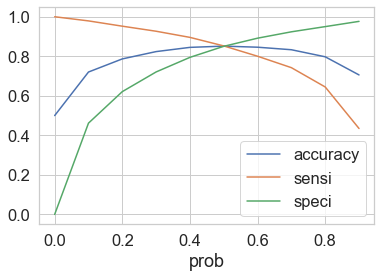

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(25,25))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5is the optimum point to take it as a cutoff probability.

In [165]:
y_train_pred_final['predicted'] = y_train_pred_final['churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

churn           churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0                     0.20  1    1    0    0    0    0    0    0    0     
1  0                     0.02  1    0    0    0    0    0    0    0    0     
2  0                     0.43  1    1    1    1    1    0    0    0    0     
3  0                     0.15  1    1    0    0    0    0    0    0    0     
4  0                     0.16  1    1    0    0    0    0    0    0    0     

   0.9  predicted  
0  0    0          
1  0    0          
2  0    0          
3  0    0          
4  0    0

In [166]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'] )
print(confusion)

[[16314  2870]
 [ 2832 16352]]


In [167]:
            # Predicted--->       not_churn         churn
# Actual  \/
# not_churn                       TN                FP
# churn                           FN               TP  

In [168]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

0.8513865721434529


In [169]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calVIF (df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [170]:
train_pca_selected=pd.DataFrame(train_pca_selected)

In [171]:
calVIF(train_pca_selected)

Features                  VIF
0   0                        1.00
1   1                        1.00
26  26                       1.00
27  27                       1.00
28  28                       1.00
29  29                       1.00
30  30                       1.00
31  31                       1.00
32  32                       1.00
33  33                       1.00
34  34                       1.00
35  35                       1.00
36  36                       1.00
37  37                       1.00
38  38                       1.00
39  39                       1.00
40  40                       1.00
41  41                       1.00
42  42                       1.00
43  43                       1.00
44  44                       1.00
45  45                       1.00
46  46                       1.00
25  25                       1.00
24  24                       1.00
23  23                       1.00
11  11                       1.00
2   2                        1.00
3   3                        1.00
4   4                        1.00
5   5                        1.00
6   6                        1.00
7   7                        1.00
8   8                        1.00
9   9                        1.00
10  10                       1.00
12  12                       1.00
22  22                       1.00
13  13                       1.00
14  14                       1.00
15  15                       1.00
16  16                       1.00
17  17                       1.00
18  18                       1.00
19  19                       1.00
20  20                       1.00
21  21                       1.00
47  47                       1.00

## Metrics beyond simply accuracy

In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8523769808173478

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8503961634695579

In [175]:
# Calculate false postive rate - predicting Lead is not converted
print(FP/ float(TN+FP))

0.14960383653044204


In [176]:
# positive predictive value 
print (TP / float(TP+FP))

0.8506919155134741


### Vaidating the Model using Test data

In [177]:
test_pca_selected = pca_selected.transform(X_test)
test_pca_selected

array([[-0.86608797,  0.35394497, -0.03695338, ..., -0.02513351,
        -0.08457336,  0.16138291],
       [-1.04554963,  0.86629985,  1.42861426, ...,  0.32472122,
         0.232371  , -0.2946563 ],
       [ 2.17498225, -1.77026476,  0.33468256, ..., -0.00837015,
         0.15666504, -0.10754501],
       ...,
       [ 0.76639374,  0.43333935,  1.39666476, ..., -0.22408733,
         0.35627661,  0.34106539],
       [-0.808047  , -0.03847817,  0.20855858, ..., -0.06466542,
        -0.14276346,  0.01895489],
       [ 0.3095635 , -1.14942741, -0.02109248, ...,  0.48774952,
         0.37596632,  0.55661892]])

In [178]:
X_test_sm = sm.add_constant(test_pca_selected)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

array([0.76993836, 0.6043566 , 0.02394837, 0.20030223, 0.15226253,
       0.05536557, 0.93639523, 0.13359743, 0.16933601, 0.96986722])

In [179]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred})
y_test_pred_final.head()

churn           churn_prob
0  0                     0.77
1  0                     0.60
2  0                     0.02
3  0                     0.20
4  0                     0.15

In [180]:
y_test_pred_final['predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

churn           churn_prob  predicted
0  0                     0.77  1        
1  0                     0.60  1        
2  0                     0.02  0        
3  0                     0.20  0        
4  0                     0.15  0

In [181]:
# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['predicted'])
accuracy

0.8497334517992003

In [182]:
confusionTest = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['predicted'])
confusionTest

array([[7004, 1230],
       [ 123,  647]], dtype=int64)

In [183]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
sen= TP / float(TP+FN)
sen

0.8402597402597403

In [185]:
# Let us calculate specificity
spec= TN / float(TN+FP)
spec

0.8506193830459072

In [186]:
# Calculate false postive rate - predicting Lead is not converted
print(FP/ float(TN+FP))

0.1493806169540928


In [187]:
# positive predictive value 
print (TP / float(TP+FP))

0.34469898774640384


In [188]:
pcalogReg = {'Method': ['LogReg with PCA'], 'Sensitivity': [sen],'Specificity': [ spec ], 'Accuracy': [accuracy]}
# pcalogReg = pd.DataFrame(pcalogReg ,columns = ['Method', 'Sensitivity','Specificity' , 'Accuracy' ])
pcalogReg

{'Method': ['LogReg with PCA'],
 'Sensitivity': [0.8402597402597403],
 'Specificity': [0.8506193830459072],
 'Accuracy': [0.8497334517992003]}

In [189]:
pcalogReg = pd.DataFrame.from_dict(pcalogReg)
pcalogReg

Method          Sensitivity          Specificity  \
0  LogReg with PCA                 0.84                 0.85   

              Accuracy  
0                 0.85

### <font color = Red>  Step 10.5: Conclusion for Log reg model using the PCA </font>

PCA with 90% variance that correspoinds to 48 varaibles was chosen for Logistic Regession
Using Sklear , logistic regression model was built on train dataset that has PCAs
The model was validated on the Test dataset with the same PCAs.
The model accuracy was around 85% in both Train and Test and hence it is not over fitting
The Sensitivity number for Train and test was found to be 85% and 84% respectively and the variation is within 5
Hence, this model has been chosen for prediction

## <font color = Red>  Step 11: Build multiple models without PCA  </font>

###  11.a Feature Selection Using RFE

In [190]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)   #      Cut off set as 15    
rfe = rfe.fit(X_train, y_train)

rfe.support_

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_8',
       'isd_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'count_rech_2g_8', 'arpu_2g_8',
       'sachet_2g_6', 'sachet_2g_8', 'total_usage_voice_7'],
      dtype='object')

In [191]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_test_rfe = X_test[col]

In [192]:
X_test_rfe.shape

(9004, 15)

In [193]:
y_test.shape

(9004,)

In [194]:
X_train_rfe.head()

arpu_7          onnet_mou_8     loc_og_t2t_mou_8  \
0                 0.76                 0.38                 0.03   
1                 0.77                 0.12                 0.40   
2                 0.86                 0.08                 0.26   
3                 0.79                 0.10                 0.33   
4                 0.80                 0.06                 0.06   

      std_og_t2t_mou_8         isd_og_mou_8       total_og_mou_8  \
0                 0.44                 0.00                 0.27   
1                 0.00                 0.00                 0.16   
2                 0.00                 1.00                 0.26   
3                 0.00                 0.00                 0.49   
4                 0.05                 0.00                 0.13   

        total_ic_mou_8         spl_ic_mou_8   last_day_rch_amt_8  \
0                 0.19                 0.00                 0.04   
1                 0.50                 0.00                 0.79   
2                 0.84                 0.00                 0.20   
3                 0.08                 0.00                 0.19   
4                 0.25                 1.00                 0.12   

       count_rech_2g_6      count_rech_2g_8            arpu_2g_8  \
0                 0.00                 0.00                 0.03   
1                 0.00                 0.25                 0.03   
2                 0.00                 0.00                 0.03   
3                 0.00                 0.00                 0.03   
4                 0.00                 0.00                 0.03   

           sachet_2g_6          sachet_2g_8  total_usage_voice_7  
0                 0.00                 0.00                 0.31  
1                 0.00                 0.00                 0.18  
2                 0.00                 0.00                 0.74  
3                 0.00                 0.00                 0.44  
4                 0.00                 0.00                 0.30

In [195]:
X_test_rfe.head()

arpu_7          onnet_mou_8     loc_og_t2t_mou_8  \
29360                 0.72                 0.00                 0.01   
49979                 0.81                 0.23                 0.12   
90612                 0.77                 0.00                 0.01   
87007                 0.79                 0.01                 0.04   
91852                 0.70                 1.00                 1.00   

          std_og_t2t_mou_8         isd_og_mou_8       total_og_mou_8  \
29360                 0.00                 0.00                 0.01   
49979                 0.23                 0.00                 0.17   
90612                 0.00                 0.00                 0.02   
87007                 0.00                 0.00                 0.12   
91852                 0.00                 0.00                 0.80   

            total_ic_mou_8         spl_ic_mou_8   last_day_rch_amt_8  \
29360                 0.25                 0.00                 0.00   
49979                 0.02                 0.00                 0.99   
90612                 0.21                 0.00                 1.00   
87007                 0.31                 0.00                 0.12   
91852                 0.18                 0.00                 0.09   

           count_rech_2g_6      count_rech_2g_8            arpu_2g_8  \
29360                 0.00                 0.00                 0.03   
49979                 0.33                 0.00                 0.03   
90612                 0.00                 0.00                 0.77   
87007                 0.00                 0.00                 0.03   
91852                 0.00                 0.00                 0.03   

               sachet_2g_6          sachet_2g_8  total_usage_voice_7  
29360                 0.00                 0.00                 0.35  
49979                 0.33                 0.00                 0.77  
90612                 0.00                 0.00                 0.06  
87007                 0.00                 0.00                 0.32  
91852                 0.00                 0.00                 0.67

### <font color = Red>  Step 11.1: Build logistic Regression with Cross Validation  </font>

In [196]:
stratefied_Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-5, 5))),
        scoring='accuracy',
        cv=stratefied_Kfold,
        random_state=100,
        solver='saga',
        n_jobs=-1
    )

# Training on Train Dataset
searchCV.fit(X_train_rfe,y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                         1000.0, 10000.0],
                     cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                     n_jobs=-1, random_state=100, scoring='accuracy',
                     solver='saga')

In [197]:
features = list(zip(abs(searchCV.coef_[0]),inp_data.drop(['churn'], axis = 1).columns))

In [198]:
# print score
Best_Train_Accuracy=searchCV.score(X_train_rfe,y_train)
Best_Train_Accuracy

0.8405442035029191

In [199]:
# Evaluation on Test Dataset
predictions = searchCV.predict(X_test_rfe)
predictions

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [200]:
# Confusion Matrix
confusion= metrics.confusion_matrix(y_test, predictions)
confusion

array([[6888, 1346],
       [ 133,  637]], dtype=int64)

In [201]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [202]:
accuracy= metrics.accuracy_score(y_test, predictions)
accuracy

0.835739671257219

In [203]:
# Let's see the sensitivity 
sen= TP / float(TP+FN)
sen


0.8272727272727273

In [204]:
# Let's see the specificity 
spec= TN / float(TN+FP)
spec

0.8365314549429196

In [205]:
logRegwopca = {'Method': ['LogReg CV without PCA'], 'Sensitivity': [sen],'Specificity': [ spec ], 'Accuracy': [accuracy]}

logRegwopca = pd.DataFrame.from_dict(logRegwopca )
logRegwopca

Method          Sensitivity          Specificity  \
0  LogReg CV without PCA                 0.83                 0.84   

              Accuracy  
0                 0.84

In [206]:
Comparision = pcalogReg.append(logRegwopca)
Comparision

Method          Sensitivity          Specificity  \
0  LogReg with PCA                       0.84                 0.85   
0  LogReg CV without PCA                 0.83                 0.84   

              Accuracy  
0                 0.85  
0                 0.84

In [207]:
X_train_rfe.shape

(38368, 15)

### <font color = Red>  Step 11.2: Build Decision Trees  </font>

In [208]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=1000, min_samples_split=1000)
dt_default.fit(X_train_rfe, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=1000,
                       min_samples_split=1000, random_state=100)

In [209]:
# Making predictions
predictions = dt_default.predict(X_test_rfe)

In [210]:
accuracy= metrics.accuracy_score(y_test, predictions)
accuracy

0.8916037316748112

In [211]:
# Confusion Matrix
confusion= metrics.confusion_matrix(y_test, predictions)
confusion

array([[7492,  742],
       [ 234,  536]], dtype=int64)

In [212]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [213]:
# Let's see the sensitivity 
sen= TP / float(TP+FN)
sen

0.6961038961038961

In [214]:
# Let's see the specificity 
spec= TN / float(TN+FP)
spec

0.9098858392033033

In [215]:
dtwopca = {'Method': ['DT without PCA'], 'Sensitivity': [sen],'Specificity': [ spec ], 'Accuracy': [accuracy]}
dtwopca = pd.DataFrame.from_dict(dtwopca  )
dtwopca 

Method          Sensitivity          Specificity  \
0  DT without PCA                 0.70                 0.91   

              Accuracy  
0                 0.89

In [216]:
Comparision = Comparision.append(dtwopca)
Comparision

Method          Sensitivity          Specificity  \
0  LogReg with PCA                       0.84                 0.85   
0  LogReg CV without PCA                 0.83                 0.84   
0  DT without PCA                        0.70                 0.91   

              Accuracy  
0                 0.85  
0                 0.84  
0                 0.89

In [217]:
df=inp_data.copy()
df.shape

(30011, 153)

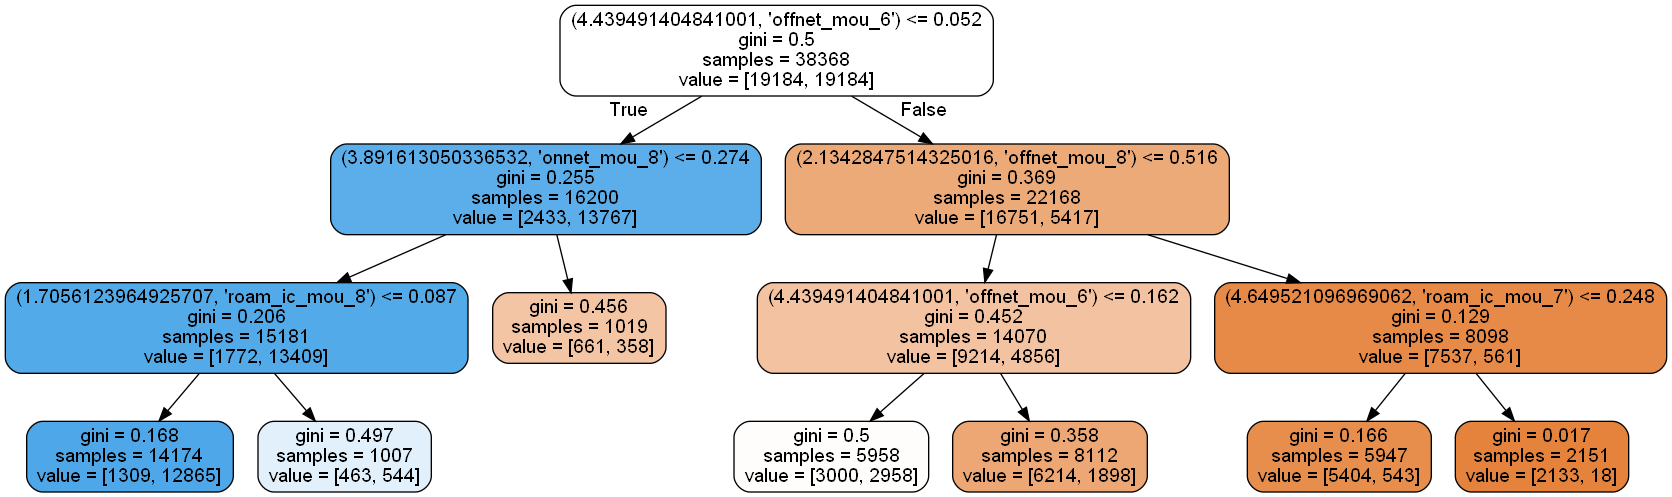

In [218]:
# Importing required packages for visualization
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz 2.44.1\bin'

dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data, feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### <font color = Red>  Step 11.3: Build Random forest </font>

In [219]:
# Use the dataset that was treated for imbalance
X_train=X_train_smt.copy()
y_train=y_train_smt.copy()

X_test=X_test.copy()
y_test=y_test.copy()

In [220]:
RFC_balanced = RandomForestClassifier(n_estimators=15, max_depth=4, max_features=5, random_state=100, oob_score=True, class_weight="balanced_subsample")

In [221]:
# Training model from Test Dataset
RFC_balanced.fit(X_train_rfe,y_train_smt)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       max_features=5, n_estimators=15, oob_score=True,
                       random_state=100)

In [222]:
RFC_balanced.oob_score_

0.8306140533778148

In [223]:
searchCV.coef_[0]

array([ 3.1605861 ,  4.54165982, -3.13686255, -3.77009763,  1.39361212,
       -3.89161305, -4.4394914 , -2.0704707 , -2.13428475, -1.61767937,
       -4.6495211 , -1.7056124 ,  1.69416445,  3.48212819,  2.14939575])

In [224]:
from sklearn.metrics import plot_roc_curve

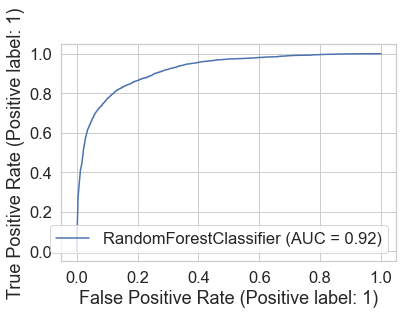

In [225]:
plot_roc_curve(RFC_balanced, X_train_rfe, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [226]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [227]:
params = {
    'max_depth': [5,7,10],
    'min_samples_leaf': [500, 750, 1000, 1250, 1500],
    'n_estimators': [10, 11, 12, 13, 14, 15]
}

In [228]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [229]:
%%time
grid_search.fit(X_train_rfe, y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
Wall time: 58.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_leaf': [500, 750, 1000, 1250, 1500],
                         'n_estimators': [10, 11, 12, 13, 14, 15]},
             scoring='accuracy', verbose=1)

In [230]:
X_train_rfe.shape

(38368, 15)

In [231]:
y_train.shape

(38368,)

In [232]:
grid_search.best_score_

0.8315523352793994

In [233]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, min_samples_leaf=500, n_estimators=12,
                       n_jobs=-1, random_state=42)

In [234]:
rf_best.feature_importances_

array([6.51460992e-03, 3.25788368e-02, 1.76794377e-01, 2.54196666e-02,
       3.90643657e-03, 1.60438337e-01, 3.66758605e-01, 0.00000000e+00,
       1.54032799e-01, 8.37377377e-03, 3.58096352e-02, 1.75648883e-02,
       7.78036544e-05, 4.60752323e-03, 7.12270780e-03])

In [235]:
# ?grid_search

In [236]:
imp_df = pd.DataFrame({
    "Varname": X_train_rfe.columns,
    "Imp": rf_best.feature_importances_
})

In [237]:
imp_df.shape

(15, 2)

In [238]:
imp_df.sort_values(by="Imp", ascending=False)

Varname                  Imp
6   total_ic_mou_8                      0.37
2   loc_og_t2t_mou_8                    0.18
5   total_og_mou_8                      0.16
8   last_day_rch_amt_8                  0.15
10  count_rech_2g_8                     0.04
1   onnet_mou_8                         0.03
3   std_og_t2t_mou_8                    0.03
11  arpu_2g_8                           0.02
9   count_rech_2g_6                     0.01
14  total_usage_voice_7                 0.01
0   arpu_7                              0.01
13  sachet_2g_8                         0.00
4   isd_og_mou_8                        0.00
12  sachet_2g_6                         0.00
7   spl_ic_mou_8                        0.00

In [239]:
# Making predictions on Test Dataset
predictions=grid_search.predict(X_test_rfe)

In [240]:
X_test_rfe.shape

(9004, 15)

In [241]:
y_test.shape

(9004,)

In [242]:
accuracy= metrics.accuracy_score(y_test, predictions)
accuracy

0.8814971123944914

In [243]:
# Confusion Matrix
confusion= metrics.confusion_matrix(y_test, predictions)
confusion

array([[7355,  879],
       [ 188,  582]], dtype=int64)

In [244]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [245]:
# Let's see the sensitivity 
sen= TP / float(TP+FN)
sen

0.7558441558441559

In [246]:
# Let us calculate specificity
spec= TN / float(TN+FP)
spec


0.8932475103230507

In [247]:
rfwopca = {'Method': ['Random Forest without PCA'], 'Sensitivity': [sen],'Specificity': [ spec ], 'Accuracy': [accuracy]}
rfwopca = pd.DataFrame.from_dict(rfwopca)
rfwopca 

Method          Sensitivity          Specificity  \
0  Random Forest without PCA                 0.76                 0.89   

              Accuracy  
0                 0.88

In [248]:
Comparision = Comparision.append(rfwopca)
Comparision

Method          Sensitivity          Specificity  \
0  LogReg with PCA                           0.84                 0.85   
0  LogReg CV without PCA                     0.83                 0.84   
0  DT without PCA                            0.70                 0.91   
0  Random Forest without PCA                 0.76                 0.89   

              Accuracy  
0                 0.85  
0                 0.84  
0                 0.89  
0                 0.88

### <font color = Red>  Step 11.4: Build logistic regression </font>

In [249]:
X_train_sm = sm.add_constant(X_train_rfe)
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38352
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14522.
Date:                Sun, 05 Sep 2021   Deviance:                       29044.
Time:                        19:28:33   Pearson chi2:                 5.74e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9604    

In [250]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calVIF (df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [251]:
X_train_rfe=pd.DataFrame(X_train_rfe)

In [252]:
calVIF(X_train_rfe)

Features                  VIF
10  count_rech_2g_8                    19.17
13  sachet_2g_8                        18.03
1   onnet_mou_8                        17.50
3   std_og_t2t_mou_8                   13.08
9   count_rech_2g_6                    12.18
12  sachet_2g_6                        11.17
0   arpu_7                              5.86
5   total_og_mou_8                      5.78
14  total_usage_voice_7                 5.71
2   loc_og_t2t_mou_8                    4.62
6   total_ic_mou_8                      3.03
8   last_day_rch_amt_8                  2.22
4   isd_og_mou_8                        1.64
11  arpu_2g_8                           1.45
7   spl_ic_mou_8                        1.08

In [253]:
# occupation_Unemployed has VIF >4 and hence remove this variable and run the model    
dropVar=['count_rech_2g_8']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [254]:
def buildModel(df_y_train,df_X_train):
    X_train_sm = sm.add_constant(df_X_train)
    logmodel = sm.GLM(df_y_train,X_train_sm, family = sm.families.Binomial())
    res = logmodel.fit()
    print(res.summary())
    return



In [255]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38353
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14631.
Date:                Sun, 05 Sep 2021   Deviance:                       29263.
Time:                        19:28:34   Pearson chi2:                 5.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7902    

In [256]:
calVIF(X_train_rfe)

Features                  VIF
1   onnet_mou_8                        17.49
3   std_og_t2t_mou_8                   13.07
9   count_rech_2g_6                     9.41
11  sachet_2g_6                         9.07
0   arpu_7                              5.85
5   total_og_mou_8                      5.78
13  total_usage_voice_7                 5.70
2   loc_og_t2t_mou_8                    4.62
6   total_ic_mou_8                      3.01
8   last_day_rch_amt_8                  2.20
4   isd_og_mou_8                        1.64
12  sachet_2g_8                         1.53
10  arpu_2g_8                           1.45
7   spl_ic_mou_8                        1.08

In [257]:
dropVar=['onnet_mou_8']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [258]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14826.
Date:                Sun, 05 Sep 2021   Deviance:                       29653.
Time:                        19:28:35   Pearson chi2:                 5.37e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0100    

In [259]:
dropVar=['std_og_t2t_mou_8']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [260]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38355
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14829.
Date:                Sun, 05 Sep 2021   Deviance:                       29658.
Time:                        19:28:36   Pearson chi2:                 5.36e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9745    

In [261]:
calVIF(X_train_rfe)

Features                  VIF
7   count_rech_2g_6                     9.41
9   sachet_2g_6                         9.06
0   arpu_7                              5.78
11  total_usage_voice_7                 5.70
3   total_og_mou_8                      3.36
4   total_ic_mou_8                      2.79
6   last_day_rch_amt_8                  2.19
1   loc_og_t2t_mou_8                    2.11
10  sachet_2g_8                         1.53
8   arpu_2g_8                           1.45
2   isd_og_mou_8                        1.40
5   spl_ic_mou_8                        1.08

In [262]:
dropVar=['count_rech_2g_6']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [263]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38356
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14982.
Date:                Sun, 05 Sep 2021   Deviance:                       29965.
Time:                        19:28:37   Pearson chi2:                 5.46e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9319    

In [264]:
dropVar=['sachet_2g_6']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [265]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14983.
Date:                Sun, 05 Sep 2021   Deviance:                       29966.
Time:                        19:28:37   Pearson chi2:                 5.46e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9287    

In [266]:
calVIF(X_train_rfe)

Features                  VIF
9  total_usage_voice_7                 5.66
0  arpu_7                              5.49
3  total_og_mou_8                      3.35
4  total_ic_mou_8                      2.76
6  last_day_rch_amt_8                  2.18
1  loc_og_t2t_mou_8                    2.11
7  arpu_2g_8                           1.45
2  isd_og_mou_8                        1.40
8  sachet_2g_8                         1.20
5  spl_ic_mou_8                        1.08

In [267]:
dropVar=['total_usage_voice_7']
X_train_rfe = X_train_rfe.drop(dropVar, axis = 1)

In [268]:
buildModel(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15246.
Date:                Sun, 05 Sep 2021   Deviance:                       30491.
Time:                        19:28:38   Pearson chi2:                 5.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.7292      0

In [269]:
calVIF(X_train_rfe)

Features                  VIF
0  arpu_7                             3.22
4  total_ic_mou_8                     2.59
3  total_og_mou_8                     2.56
1  loc_og_t2t_mou_8                   2.11
6  last_day_rch_amt_8                 2.11
7  arpu_2g_8                          1.42
2  isd_og_mou_8                       1.37
8  sachet_2g_8                        1.19
5  spl_ic_mou_8                       1.07

The p value is less than 0.05 and the VIF is less than 4 and hence we can stop iterating and choose the model

In [270]:
cols=X_train_rfe.columns
cols

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'arpu_2g_8',
       'sachet_2g_8'],
      dtype='object')

In [271]:
X_test_rfe = X_test_rfe[cols]

In [272]:
X_test_rfe.head()

arpu_7     loc_og_t2t_mou_8         isd_og_mou_8  \
29360                 0.72                 0.01                 0.00   
49979                 0.81                 0.12                 0.00   
90612                 0.77                 0.01                 0.00   
87007                 0.79                 0.04                 0.00   
91852                 0.70                 1.00                 0.00   

            total_og_mou_8       total_ic_mou_8         spl_ic_mou_8  \
29360                 0.01                 0.25                 0.00   
49979                 0.17                 0.02                 0.00   
90612                 0.02                 0.21                 0.00   
87007                 0.12                 0.31                 0.00   
91852                 0.80                 0.18                 0.00   

        last_day_rch_amt_8            arpu_2g_8          sachet_2g_8  
29360                 0.00                 0.03                 0.00  
49979                 0.99                 0.03                 0.00  
90612                 1.00                 0.77                 0.00  
87007                 0.12                 0.03                 0.00  
91852                 0.09                 0.03                 0.00

In [273]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train_rfe)
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15246.
Date:                Sun, 05 Sep 2021   Deviance:                       30491.
Time:                        19:28:39   Pearson chi2:                 5.34e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.7292      0

In [274]:
## Coefficient of the Final Model features
Final_Features = pd.DataFrame(res.params)
Final_Features

0
const                             -2.73
arpu_7                             6.18
loc_og_t2t_mou_8                  -1.43
isd_og_mou_8                       1.59
total_og_mou_8                    -2.60
total_ic_mou_8                    -4.78
spl_ic_mou_8                      -2.22
last_day_rch_amt_8                -2.41
arpu_2g_8                         -2.15
sachet_2g_8                       -1.20

In [275]:
Final_Features.rename(columns={0:'Coefficient'}, inplace=True)
Final_Features.index.rename('Variable', inplace=True)
Final_Features

Coefficient
Variable                               
const                             -2.73
arpu_7                             6.18
loc_og_t2t_mou_8                  -1.43
isd_og_mou_8                       1.59
total_og_mou_8                    -2.60
total_ic_mou_8                    -4.78
spl_ic_mou_8                      -2.22
last_day_rch_amt_8                -2.41
arpu_2g_8                         -2.15
sachet_2g_8                       -1.20

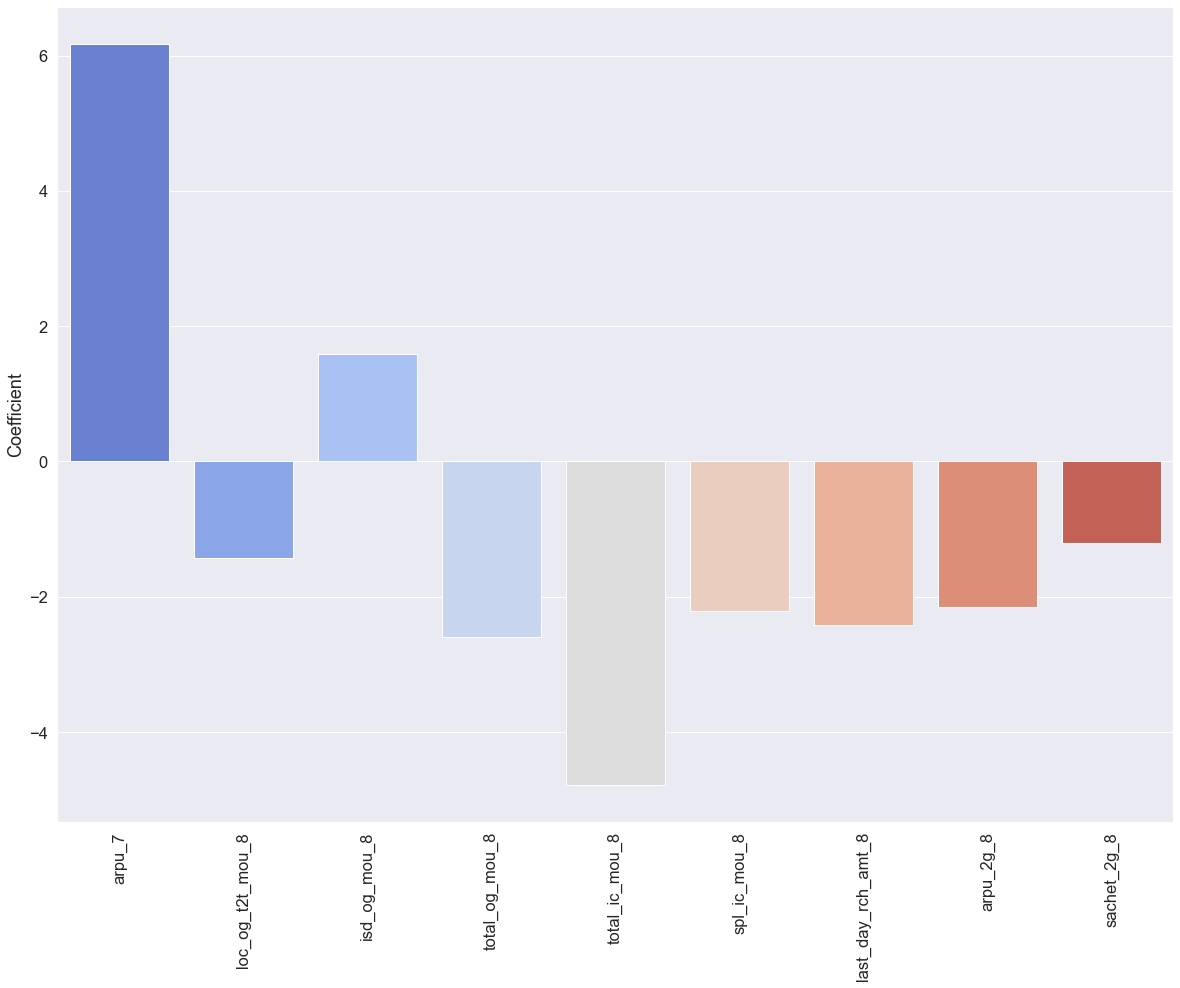

In [276]:
# Lets plot the model  that we created above with coefficient of the predictor variables 

plt.figure(figsize = (20,15))
sns.set(font_scale = 1.5)
coeff = pd.DataFrame(res.params, index = X_train_rfe.columns, columns = ['Coefficient'])
sns.barplot(x = coeff.index, y = 'Coefficient', data = coeff, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [277]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0                   0.54
1                   0.03
2                   0.19
3                   0.37
4                   0.12
5                   0.15
6                   0.62
7                   0.09
8                   0.11
9                   0.02
dtype: float64

In [278]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final.head()

churn           churn_Prob
0  0                     0.54
1  0                     0.03
2  0                     0.19
3  0                     0.37
4  0                     0.12

#### Finding Optimal Cutoff Point

In [279]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn           churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0                     0.54  1    1    1    1    1    1    0    0    0     
1  0                     0.03  1    0    0    0    0    0    0    0    0     
2  0                     0.19  1    1    0    0    0    0    0    0    0     
3  0                     0.37  1    1    1    1    0    0    0    0    0     
4  0                     0.12  1    1    0    0    0    0    0    0    0     

   0.9  
0  0    
1  0    
2  0    
3  0    
4  0

In [280]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


                     prob             accuracy                sensi  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.69                 0.97   
0.20                 0.20                 0.75                 0.95   
0.30                 0.30                 0.79                 0.92   
0.40                 0.40                 0.81                 0.88   
0.50                 0.50                 0.83                 0.85   
0.60                 0.60                 0.83                 0.80   
0.70                 0.70                 0.82                 0.72   
0.80                 0.80                 0.76                 0.57   
0.90                 0.90                 0.66                 0.34   

                    speci  
0.00                 0.00  
0.10                 0.40  
0.20                 0.56  
0.30                 0.67  
0.40                 0.75  
0.50                 0.81  
0.60                 0

<Figure size 1800x1800 with 0 Axes>

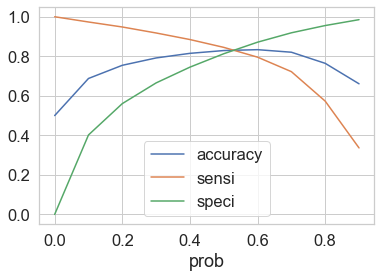

In [281]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(25,25))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [282]:
#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

y_train_pred_final['predicted'] = y_train_pred_final['churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

churn           churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0  0                     0.54  1    1    1    1    1    1    0    0    0     
1  0                     0.03  1    0    0    0    0    0    0    0    0     
2  0                     0.19  1    1    0    0    0    0    0    0    0     
3  0                     0.37  1    1    1    1    0    0    0    0    0     
4  0                     0.12  1    1    0    0    0    0    0    0    0     

   0.9  predicted  
0  0    1          
1  0    0          
2  0    0          
3  0    0          
4  0    0

In [283]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'] )
print(confusion)


[[15594  3590]
 [ 2972 16212]]


In [284]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

0.8289720600500416


In [285]:
# Prepare the Test dataframe
colTest=X_train_rfe.columns
X_test = X_test[colTest]
X_test.head()

arpu_7     loc_og_t2t_mou_8         isd_og_mou_8  \
29360                 0.72                 0.01                 0.00   
49979                 0.81                 0.12                 0.00   
90612                 0.77                 0.01                 0.00   
87007                 0.79                 0.04                 0.00   
91852                 0.70                 1.00                 0.00   

            total_og_mou_8       total_ic_mou_8         spl_ic_mou_8  \
29360                 0.01                 0.25                 0.00   
49979                 0.17                 0.02                 0.00   
90612                 0.02                 0.21                 0.00   
87007                 0.12                 0.31                 0.00   
91852                 0.80                 0.18                 0.00   

        last_day_rch_amt_8            arpu_2g_8          sachet_2g_8  
29360                 0.00                 0.03                 0.00  
49979                 0.99                 0.03                 0.00  
90612                 1.00                 0.77                 0.00  
87007                 0.12                 0.03                 0.00  
91852                 0.09                 0.03                 0.00

In [286]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

29360                   0.60
49979                   0.30
90612                   0.04
87007                   0.48
91852                   0.04
28100                   0.08
69301                   0.88
50905                   0.03
31097                   0.04
83157                   0.86
dtype: float64

In [287]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [288]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


churn
29360  0    
49979  0    
90612  0    
87007  0    
91852  0

In [289]:
# Appending y_test_df and y_pred_1
y_pred_finalTest = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_finalTest

churn                    0
29360  0                     0.60
49979  0                     0.30
90612  0                     0.04
87007  0                     0.48
91852  0                     0.04
...   ..                      ...
21794  0                     0.02
75969  0                     0.63
97344  0                     0.07
40248  0                     0.65
18680  0                     0.25

[9004 rows x 2 columns]

In [290]:
# Renaming the column 
y_pred_finalTest= y_pred_finalTest.rename(columns={ 0 : 'predictedChurn'})

In [291]:
y_pred_finalTest['final_predicted'] = y_pred_finalTest['predictedChurn'].map(lambda x: 1 if x > 0.5 else 0)
y_pred_finalTest.head()

churn       predictedChurn  final_predicted
29360  0                     0.60  1              
49979  0                     0.30  0              
90612  0                     0.04  0              
87007  0                     0.48  0              
91852  0                     0.04  0

In [292]:
# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_pred_finalTest['churn'], y_pred_finalTest['final_predicted'])
accuracy


0.8151932474455797

In [293]:
confusionTest = metrics.confusion_matrix(y_pred_finalTest['churn'], y_pred_finalTest['final_predicted'])
confusionTest

array([[6707, 1527],
       [ 137,  633]], dtype=int64)

In [294]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives


In [295]:
# Let's see the sensitivity of our logistic regression model
sen= TP / float(TP+FN)
sen

0.8220779220779221

In [296]:
# Let us calculate specificity
spec= TN / float(TN+FP)
spec


0.8145494291960165

In [297]:
logRegwoPCA = {'Method': ['LogReg without PCA'], 'Sensitivity': [sen],'Specificity': [ spec ], 'Accuracy': [accuracy]}
logRegwoPCA = pd.DataFrame(logRegwoPCA ,columns = ['Method', 'Sensitivity','Specificity' , 'Accuracy' ])
logRegwoPCA 

Method          Sensitivity          Specificity  \
0  LogReg without PCA                 0.82                 0.81   

              Accuracy  
0                 0.82

In [298]:
Comparision = Comparision.append(logRegwoPCA)
Comparision

Method          Sensitivity          Specificity  \
0  LogReg with PCA                           0.84                 0.85   
0  LogReg CV without PCA                     0.83                 0.84   
0  DT without PCA                            0.70                 0.91   
0  Random Forest without PCA                 0.76                 0.89   
0  LogReg without PCA                        0.82                 0.81   

              Accuracy  
0                 0.85  
0                 0.84  
0                 0.89  
0                 0.88  
0                 0.82

## <font color = Red>  Step 12: Conclusion </font>

#### Approach:

1. For model accuracy we have run the logistic regression model with the PCA. 
2. The sensitivity and accuracy score of the model are 0.84 and 0.85 respectively.
3. In order to interpret the model , we have build belo 4 models without PCA.
 - LogReg CV without PCA	
 - DT without PCA
 - Random Forest without PCA
 - LogReg without PCA
4. We considered the Logistic Regression model as our final model for interpretation, because we are able to interpret this model better than the rest of the models and also this model has given good sensitivity. The sensitivity and accuracy score of the model are 0.82 and 0.82 respectively.

5. Model Equation: 
                   log Odds (churn) =  -2.73 + 
                                        6.18 x arpu_7 + 
                                       -1.43 x loc_og_t2t_mou_8 + 
                                        1.59 x isd_og_mou_8 + 
                                       -2.6  x total_og_mou_8 + 
                                       -4.78 x total_ic_mou_8 + 
                                       -2.22 x spl_ic_mou_8 + 
                                       -2.41 x last_day_rch_amt_8 + 
                                       -2.15 x arpu_2g_8 + 
                                       -1.2  x sachet_2g_8 

6. The top 3 indicator of churn are mentioned below:
   - arpu_7 : Every unit increase in the average revenue per user in the 7th month (Aug), increase the log Odds churn by 6.18 units. 
   - total_ic_mou_8 : Every unit increase in the total incoming call in action month, there is decrease in the log Odds churn by 4.78 units. 
   - total_og_mou_8 : Every unit increase in the total outgoing call in action month, there is decrease in the log Odds churn by 2.6 units. 
  




###  <font color = Red>  Step 12.a: Recommendation of strategies to manage customer churn </font>

The following are recommendations based on analysis for the Telecom firm to avoid the customer churn:

1. We can see that there is drop for Arpu in 7th month and a huge drops in 8th month for churned customers.(From EDA, Logistic Regression Model).So our aim will be to how to increase your ARPU?
- The firm can do that by tweaking the pricing to attract higher-paying, long-term customers. 
- Ideally, the firm should be able to point customers to a variety of subscription plans so you’re not freezing out leads with lower budgets. Adding in a “recommended” or “popular” pricing tier creates a sort of bandwagon effect for customers to get the most bang for their buck. 

2. Customers reducing/nullifying their calls (mou: incoming + outgoing) during the 'action' phase are likely to churn.(From EDA, Logistic Regression Model, Decision Tree Model, Random Forest Model)
- The firm can give them offer of free calling to retain them
- The firm can give them offer to recharge at lesser cost to avoid churn

3. Customers reducing/nullifying the last day recharge amount during 'action' phase are likely to churn. (From EDA, - Logistic Regression Model)
- The firm can give them offer to recharge at lesser cost to avoid churn

4. Customers who have lesser AON (Lesser Days on our operator's network) are likely to churn. (From EDA)
- The firm can provide incremental benifits to customers, e.g. providing more data per day at same price for high AON customers
- The firm can promise a reward for successful completion of certain days/months/years on the Network

5. Customers who are into Service schemes with validity smaller than a month data 2g in the 'action' phase are likely to churn. 
- The firm can provide them validity subscription that involve the user to use more days.    